# Step 1: Loading the data

In [1]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

I have scraped the oral histories from the respective website for each repository and created a CSV file for each repository. I'm loading these CSV files into panda dataframes and finally combine them into one panda dataframe that I will call OralHistories. 

In [2]:
DetroitWorker = pandas.read_csv('000 DetroitWorker dataset 20.txt', sep=';')

DetroitWorker

In [3]:
Immigrants = pandas.read_csv('000 Immigrants 99.txt', sep=';')

In [4]:
Ironworkers = pandas.read_csv('000 Ironworkers 24 (HW7).txt', sep=';')

In [5]:
MadisonCounty = pandas.read_csv('000 MadisonCounty Dataset 53.txt', sep=';')

In [6]:
MarinCounty = pandas.read_csv('000 MarinCounty 76 (HW7).txt', sep=';')

In [7]:
MarinCountyAll = pandas.read_csv('000 MarinCounty All 104.txt', sep=';')

I want to get an idea of the distribution of dates of birth and dates of interviews for the Marin County repository.

In [305]:
print (MarinCountyAll['datebirth'].describe())

count     100.000000
mean     1908.620000
std        17.503697
min      1880.000000
25%      1898.000000
50%      1905.000000
75%      1915.000000
max      1955.000000
Name: datebirth, dtype: float64


In [306]:
print (MarinCountyAll['dateinterview'].describe())

count     104.000000
mean     1967.423077
std       175.641387
min       198.000000
25%      1976.000000
50%      1979.500000
75%      1983.000000
max      2013.000000
Name: dateinterview, dtype: float64


In [8]:
MonmouthCounty = pandas.read_csv('000 MonmouthCounty dataset 86.txt', sep=';')

In [9]:
PortHouston = pandas.read_csv('000 PortHouston 46.txt', sep=';')

In [10]:
TakingCare = pandas.read_csv('000 TakingCare Dataset 34.txt', sep=';')

In [11]:
TeaneckTownship = pandas.read_csv('000 TeaneckTownship Dataset 56.txt', sep=';')

In [386]:
OralHistories = DetroitWorker 

In [387]:
OralHistories = OralHistories.append(Immigrants)

In [388]:
OralHistories = OralHistories.append(Ironworkers)

In [389]:
OralHistories = OralHistories.append(MadisonCounty)

In [390]:
OralHistories = OralHistories.append(MarinCounty)

In [391]:
OralHistories = OralHistories.append(MonmouthCounty)

In [392]:
OralHistories = OralHistories.append(PortHouston)

In [393]:
OralHistories = OralHistories.append(TakingCare)

In [394]:
OralHistories = OralHistories.append(TeaneckTownship)

In [96]:
OralHistories

country datebirth dateinterview  \
0                     NaN      1957          2016   
1                     NaN      1946          2016   
2                     NaN      1948          2016   
3                     NaN      1944          2016   
4                     NaN      1936          2016   
5                     NaN      1932          2016   
6                     NaN      1931          2016   
7                     NaN      xxxx          2016   
8                     NaN      1948          2016   
9                     NaN      1930          2016   
10                    NaN      1941          2016   
11                    NaN      1937          2016   
12                    NaN      1938          2016   
13                    NaN      1936          2015   
14                    NaN      1945          2016   
15                    NaN      1938          2015   
16                    NaN      1942          2016   
17                    NaN      1929          2016   
18                    NaN      xxxx          2016   
19                    NaN      1942          2015   
0                 ALBANIA      1899          1991   
1         AUSTRIA-HUNGARY      1898          1991   
2                 AUSTRIA      1901          1992   
3                 AUSTRIA      1896          1991   
4                 AUSTRIA      1905          1874   
5   BRAZIL (BORN UKRAINE)      1907          1975   
6                   CHINA      1910          2001   
7                 CROATIA      1915          1999   
8          CZECHOSLOVAKIA      1928          1991   
9          CZECHOSLOVAKIA      1912          1994   
..                    ...       ...           ...   
26                    NaN      1906          1976   
27                    NaN      1889          1975   
28                    NaN      1896          1975   
29                    NaN      1900          1975   
30                    NaN      1910          1976   
31                    NaN      1908          1975   
32                    NaN      xxxx          1975   
33                    NaN      1916          1975   
34                    NaN      1911          1976   
35                    NaN      1915          1976   
36                    NaN      1923          1970   
37                    NaN      1910          1970   
38                    NaN      1985          1975   
39                    NaN      1907          1976   
40                    NaN      1892          1975   
41                    NaN      1892          1976   
42                    NaN      1900          1976   
43                    NaN      1882          1975   
44                    NaN      1903          1970   
45                    NaN      1912          1975   
46                    NaN      1896          1970   
47                    NaN      1885          1975   
48                    NaN      1896          1970   
49                    NaN      1920          1970   
50                    NaN      1919          1970   
51                    NaN      xxxx          1975   
52                    NaN      xxxx          1973   
53                    NaN      1908          1976   
54                    NaN      1900          1975   
55                    NaN      1892          1976   

                                          interviewee       repository  \
0                                         Tom Shipley    DetroitWorker   
1                                       Tamara Perrin    DetroitWorker   
2                                      Sharon Schafer    DetroitWorker   
3                                        Sandra Smith    DetroitWorker   
4                                     Ronald Navickas    DetroitWorker   
5                                        Marvin Myers    DetroitWorker   
6                                        Kenneth Volk    DetroitWorker   
7                              Joseph S. Ajlouny, Jr.    DetroitWorker   
8                                    JoAnne Werbrouck    DetroitW

In [395]:
OralHistories['datebirth'] = OralHistories['datebirth'].replace(to_replace ='xxxx', value = 'NaN', regex = True) 

In [396]:
OralHistories['dateinterview'] = OralHistories['dateinterview'].replace(to_replace ='xxxx', value = 'NaN', regex = True) 

In [399]:
OralHistories['dateinterview'] = OralHistories['dateinterview'].replace(to_replace ='xxx', value = 'NaN', regex = True) 

In [24]:
OralHistories

country datebirth dateinterview  \
0                     NaN      1957          2016   
1                     NaN      1946          2016   
2                     NaN      1948          2016   
3                     NaN      1944          2016   
4                     NaN      1936          2016   
5                     NaN      1932          2016   
6                     NaN      1931          2016   
7                     NaN       NaN          2016   
8                     NaN      1948          2016   
9                     NaN      1930          2016   
10                    NaN      1941          2016   
11                    NaN      1937          2016   
12                    NaN      1938          2016   
13                    NaN      1936          2015   
14                    NaN      1945          2016   
15                    NaN      1938          2015   
16                    NaN      1942          2016   
17                    NaN      1929          2016   
18                    NaN       NaN          2016   
19                    NaN      1942          2015   
0                 ALBANIA      1899          1991   
1         AUSTRIA-HUNGARY      1898          1991   
2                 AUSTRIA      1901          1992   
3                 AUSTRIA      1896          1991   
4                 AUSTRIA      1905          1874   
5   BRAZIL (BORN UKRAINE)      1907          1975   
6                   CHINA      1910          2001   
7                 CROATIA      1915          1999   
8          CZECHOSLOVAKIA      1928          1991   
9          CZECHOSLOVAKIA      1912          1994   
..                    ...       ...           ...   
26                    NaN      1906          1976   
27                    NaN      1889          1975   
28                    NaN      1896          1975   
29                    NaN      1900          1975   
30                    NaN      1910          1976   
31                    NaN      1908          1975   
32                    NaN       NaN          1975   
33                    NaN      1916          1975   
34                    NaN      1911          1976   
35                    NaN      1915          1976   
36                    NaN      1923          1970   
37                    NaN      1910          1970   
38                    NaN      1985          1975   
39                    NaN      1907          1976   
40                    NaN      1892          1975   
41                    NaN      1892          1976   
42                    NaN      1900          1976   
43                    NaN      1882          1975   
44                    NaN      1903          1970   
45                    NaN      1912          1975   
46                    NaN      1896          1970   
47                    NaN      1885          1975   
48                    NaN      1896          1970   
49                    NaN      1920          1970   
50                    NaN      1919          1970   
51                    NaN       NaN          1975   
52                    NaN       NaN          1973   
53                    NaN      1908          1976   
54                    NaN      1900          1975   
55                    NaN      1892          1976   

                                          interviewee       repository  \
0                                         Tom Shipley    DetroitWorker   
1                                       Tamara Perrin    DetroitWorker   
2                                      Sharon Schafer    DetroitWorker   
3                                        Sandra Smith    DetroitWorker   
4                                     Ronald Navickas    DetroitWorker   
5                                        Marvin Myers    DetroitWorker   
6                                        Kenneth Volk    DetroitWorker   
7                              Joseph S. Ajlouny, Jr.    DetroitWorker   
8                                    JoAnne Werbrouck    DetroitW

The "country" column gives the country of origin for each interviewee in the Immigrants repository. For the other repositories, this column does not apply. I don't know if I will use this information for this project, but I will almost certainly use it in the future, so I don't discard it.

To get an idea of the distribution of dates of birth across the repositories, I create a boxplot.

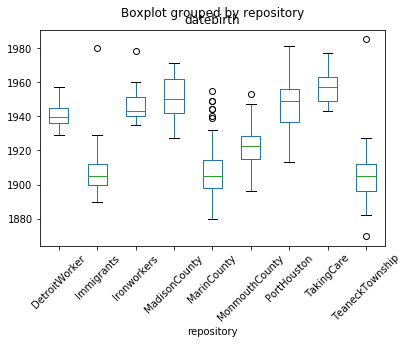

In [372]:
boxplot = OralHistories.boxplot(column=['datebirth'], by='repository', return_type='axes', grid=False, rot=45, fontsize=10)

As the last operation in this preparatory step of loading, cleaning and describing the data, I do a piece of housekeeping: I reset the index count.

In [22]:
OralHistories = OralHistories.reset_index(drop=True)

# Step 2: Counting Words and Phrases

I start by counting the number of words for each oral history.

In [27]:
OralHistories['totalwords'] = OralHistories['text'].str.count(' ') + 1

In [28]:
OralHistories

country datebirth dateinterview  \
0                      NaN      1957          2016   
1                      NaN      1946          2016   
2                      NaN      1948          2016   
3                      NaN      1944          2016   
4                      NaN      1936          2016   
5                      NaN      1932          2016   
6                      NaN      1931          2016   
7                      NaN       NaN          2016   
8                      NaN      1948          2016   
9                      NaN      1930          2016   
10                     NaN      1941          2016   
11                     NaN      1937          2016   
12                     NaN      1938          2016   
13                     NaN      1936          2015   
14                     NaN      1945          2016   
15                     NaN      1938          2015   
16                     NaN      1942          2016   
17                     NaN      1929          2016   
18                     NaN       NaN          2016   
19                     NaN      1942          2015   
20                 ALBANIA      1899          1991   
21         AUSTRIA-HUNGARY      1898          1991   
22                 AUSTRIA      1901          1992   
23                 AUSTRIA      1896          1991   
24                 AUSTRIA      1905          1874   
25   BRAZIL (BORN UKRAINE)      1907          1975   
26                   CHINA      1910          2001   
27                 CROATIA      1915          1999   
28          CZECHOSLOVAKIA      1928          1991   
29          CZECHOSLOVAKIA      1912          1994   
..                     ...       ...           ...   
464                    NaN      1906          1976   
465                    NaN      1889          1975   
466                    NaN      1896          1975   
467                    NaN      1900          1975   
468                    NaN      1910          1976   
469                    NaN      1908          1975   
470                    NaN       NaN          1975   
471                    NaN      1916          1975   
472                    NaN      1911          1976   
473                    NaN      1915          1976   
474                    NaN      1923          1970   
475                    NaN      1910          1970   
476                    NaN      1985          1975   
477                    NaN      1907          1976   
478                    NaN      1892          1975   
479                    NaN      1892          1976   
480                    NaN      1900          1976   
481                    NaN      1882          1975   
482                    NaN      1903          1970   
483                    NaN      1912          1975   
484                    NaN      1896          1970   
485                    NaN      1885          1975   
486                    NaN      1896          1970   
487                    NaN      1920          1970   
488                    NaN      1919          1970   
489                    NaN       NaN          1975   
490                    NaN       NaN          1973   
491                    NaN      1908          1976   
492                    NaN      1900          1975   
493                    NaN      1892          1976   

                                           interviewee       repository  \
0                                          Tom Shipley    DetroitWorker   
1                                        Tamara Perrin    DetroitWorker   
2                                       Sharon Schafer    DetroitWorker   
3                                         Sandra Smith    DetroitWorker   
4                                      Ronald Navickas    DetroitWorker   
5                                         Marvin Myers    DetroitWorker   
6                                         Kenneth Volk    DetroitWorker   
7                               Joseph S. Ajlouny, Jr.    DetroitWorke

In [29]:
Total = OralHistories['totalwords'].sum()
print (Total)

3467712.0


All in all my dataset contains 3.5 million words. Let's see what the average lenth of an oral history in the dataset is. 

In [30]:
print (Total/494)

7019.6599190283405


The average oral history is about 7000 words in lenght. 

Let's tidy the house: I drop the total words column.

In [31]:
del OralHistories['totalwords']

In [32]:
OralHistories

country datebirth dateinterview  \
0                      NaN      1957          2016   
1                      NaN      1946          2016   
2                      NaN      1948          2016   
3                      NaN      1944          2016   
4                      NaN      1936          2016   
5                      NaN      1932          2016   
6                      NaN      1931          2016   
7                      NaN       NaN          2016   
8                      NaN      1948          2016   
9                      NaN      1930          2016   
10                     NaN      1941          2016   
11                     NaN      1937          2016   
12                     NaN      1938          2016   
13                     NaN      1936          2015   
14                     NaN      1945          2016   
15                     NaN      1938          2015   
16                     NaN      1942          2016   
17                     NaN      1929          2016   
18                     NaN       NaN          2016   
19                     NaN      1942          2015   
20                 ALBANIA      1899          1991   
21         AUSTRIA-HUNGARY      1898          1991   
22                 AUSTRIA      1901          1992   
23                 AUSTRIA      1896          1991   
24                 AUSTRIA      1905          1874   
25   BRAZIL (BORN UKRAINE)      1907          1975   
26                   CHINA      1910          2001   
27                 CROATIA      1915          1999   
28          CZECHOSLOVAKIA      1928          1991   
29          CZECHOSLOVAKIA      1912          1994   
..                     ...       ...           ...   
464                    NaN      1906          1976   
465                    NaN      1889          1975   
466                    NaN      1896          1975   
467                    NaN      1900          1975   
468                    NaN      1910          1976   
469                    NaN      1908          1975   
470                    NaN       NaN          1975   
471                    NaN      1916          1975   
472                    NaN      1911          1976   
473                    NaN      1915          1976   
474                    NaN      1923          1970   
475                    NaN      1910          1970   
476                    NaN      1985          1975   
477                    NaN      1907          1976   
478                    NaN      1892          1975   
479                    NaN      1892          1976   
480                    NaN      1900          1976   
481                    NaN      1882          1975   
482                    NaN      1903          1970   
483                    NaN      1912          1975   
484                    NaN      1896          1970   
485                    NaN      1885          1975   
486                    NaN      1896          1970   
487                    NaN      1920          1970   
488                    NaN      1919          1970   
489                    NaN       NaN          1975   
490                    NaN       NaN          1973   
491                    NaN      1908          1976   
492                    NaN      1900          1975   
493                    NaN      1892          1976   

                                           interviewee       repository  \
0                                          Tom Shipley    DetroitWorker   
1                                        Tamara Perrin    DetroitWorker   
2                                       Sharon Schafer    DetroitWorker   
3                                         Sandra Smith    DetroitWorker   
4                                      Ronald Navickas    DetroitWorker   
5                                         Marvin Myers    DetroitWorker   
6                                         Kenneth Volk    DetroitWorker   
7                               Joseph S. Ajlouny, Jr.    DetroitWorke

To get started with content analysis, I import spacy and tokenize the text.

In [ ]:
import spacy

In [27]:
nlp = spacy.load("en")

In [353]:
OralHistories['tokenized_text'] = OralHistories['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [37]:
OralHistories

country datebirth dateinterview  \
0                      NaN      1957          2016   
1                      NaN      1946          2016   
2                      NaN      1948          2016   
3                      NaN      1944          2016   
4                      NaN      1936          2016   
5                      NaN      1932          2016   
6                      NaN      1931          2016   
7                      NaN       NaN          2016   
8                      NaN      1948          2016   
9                      NaN      1930          2016   
10                     NaN      1941          2016   
11                     NaN      1937          2016   
12                     NaN      1938          2016   
13                     NaN      1936          2015   
14                     NaN      1945          2016   
15                     NaN      1938          2015   
16                     NaN      1942          2016   
17                     NaN      1929          2016   
18                     NaN       NaN          2016   
19                     NaN      1942          2015   
20                 ALBANIA      1899          1991   
21         AUSTRIA-HUNGARY      1898          1991   
22                 AUSTRIA      1901          1992   
23                 AUSTRIA      1896          1991   
24                 AUSTRIA      1905          1874   
25   BRAZIL (BORN UKRAINE)      1907          1975   
26                   CHINA      1910          2001   
27                 CROATIA      1915          1999   
28          CZECHOSLOVAKIA      1928          1991   
29          CZECHOSLOVAKIA      1912          1994   
..                     ...       ...           ...   
464                    NaN      1906          1976   
465                    NaN      1889          1975   
466                    NaN      1896          1975   
467                    NaN      1900          1975   
468                    NaN      1910          1976   
469                    NaN      1908          1975   
470                    NaN       NaN          1975   
471                    NaN      1916          1975   
472                    NaN      1911          1976   
473                    NaN      1915          1976   
474                    NaN      1923          1970   
475                    NaN      1910          1970   
476                    NaN      1985          1975   
477                    NaN      1907          1976   
478                    NaN      1892          1975   
479                    NaN      1892          1976   
480                    NaN      1900          1976   
481                    NaN      1882          1975   
482                    NaN      1903          1970   
483                    NaN      1912          1975   
484                    NaN      1896          1970   
485                    NaN      1885          1975   
486                    NaN      1896          1970   
487                    NaN      1920          1970   
488                    NaN      1919          1970   
489                    NaN       NaN          1975   
490                    NaN       NaN          1973   
491                    NaN      1908          1976   
492                    NaN      1900          1975   
493                    NaN      1892          1976   

                                           interviewee       repository  \
0                                          Tom Shipley    DetroitWorker   
1                                        Tamara Perrin    DetroitWorker   
2                                       Sharon Schafer    DetroitWorker   
3                                         Sandra Smith    DetroitWorker   
4                                      Ronald Navickas    DetroitWorker   
5                                         Marvin Myers    DetroitWorker   
6                                         Kenneth Volk    DetroitWorker   
7                               Joseph S. Ajlouny, Jr.    DetroitWorke

I also tokenize the individual repositories.

In [28]:
DetroitWorker['tokenized_text'] = DetroitWorker['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [29]:
DetroitWorker

repository             interviewee datebirth  dateinterview  \
0   DetroitWorker             Tom Shipley      1957           2016   
1   DetroitWorker           Tamara Perrin      1946           2016   
2   DetroitWorker          Sharon Schafer      1948           2016   
3   DetroitWorker            Sandra Smith      1944           2016   
4   DetroitWorker         Ronald Navickas      1936           2016   
5   DetroitWorker            Marvin Myers      1932           2016   
6   DetroitWorker            Kenneth Volk      1931           2016   
7   DetroitWorker  Joseph S. Ajlouny, Jr.      xxxx           2016   
8   DetroitWorker        JoAnne Werbrouck      1948           2016   
9   DetroitWorker         James VanVlerah      1930           2016   
10  DetroitWorker           James Boucher      1941           2016   
11  DetroitWorker           Henry Heatley      1937           2016   
12  DetroitWorker            Harvey Greig      1938           2016   
13  DetroitWorker            Harold Stone      1936           2015   
14  DetroitWorker         Greg Smigielski      1945           2016   
15  DetroitWorker           George Ramsey      1938           2015   
16  DetroitWorker           Frank DiMaria      1942           2016   
17  DetroitWorker         Frank Boscarino      1929           2016   
18  DetroitWorker       Esther Middlewood      xxxx           2016   
19  DetroitWorker            Donna Palmer      1942           2015   

                                                 text  \
0   Tom Shipley, 1957, 2016 Title Tom Shipley Desc...   
1   Tamara Perrin, 1946, 2016  Title Tamara Perrin...   
2   Sharon Schafer, 1948, 2016 Title Sharon Schafe...   
3   Sandra Smith, 1944, 2016 Title Sandra Smith, M...   
4   Ronald Navickas, 1936, 2016 Title Ronald Navic...   
5   Marvin Myers, 1932, 2016 Title Marvin Myers, J...   
6   Kenneth Volk, 1931, 2016 Title Kenneth Volk, J...   
7   Joseph S. Ajlouny, Jr. xxxx, 2016 Title Joseph...   
8   JoAnne Werbrouck, 1948, 2016 Title JoAnne Werb...   
9   James VanVlerah, 1930, 2016 Title James VanVle...   
10  James Boucher, 1941, 2016 Title James Boucher,...   
11  Henry Heatley, 1937, 2016 Title Henry Heatley,...   
12  Harvey Greig, 1938, 2016 Title Harvey Greig, J...   
13  Harold Stone, 1936, 2015 Title Harold Stone, J...   
14  Greg Smigielski, 1945, 2016 Title Greg Smigiel...   
15  George Ramsey, 1938,  2015 Title George Ramsey...   
16  Frank DiMaria, 1942, 2016 Title Frank DiMaria,...   
17  Frank Boscarino, 1929, 2016 Title Frank Boscar...   
18  Esther Middlewood, xxxx, 2016 Title Esther Mid...   
19  Donna Palmer, 1942, 2015  Title  Donna Palmer,...   

                                       tokenized_text  
0   [Tom, Shipley, 1957, 2016, Title, Tom, Shipley...  
1   [Tamara, Perrin, 1946, 2016, Title, Tamara, Pe...  
2   [Sharon, Schafer, 1948, 2016, Title, Sharon, S...  
3   [Sandra, Smith, 1944, 2016, Title, Sandra, Smi...  
4   [Ronald, Navickas, 1936, 2016, Title, Ronald, ...  
5   [Marvin, Myers, 1932, 2016, Title, Marvin, Mye...  
6   [Kenneth, Volk, 1931, 2016, Title, Kenneth, Vo...  
7   [Joseph, S., Ajlouny, Jr., xxxx, 2016, Title, ...  
8   [JoAnne, Werbrouck, 1948, 2016, Title, JoAnne,...  
9   [James, VanVlerah, 1930, 2016, Title, James, V...  
10  [James, Boucher, 1941, 2016, Title, James, Bou...  
11  [Henry, Heatley, 1937, 2016, Title, Henry, Hea...  
12  [Harvey, Greig, 1938, 2016, Title, Harvey, Gre...  
13  [Harold, Stone, 1936, 2015, Title, Harold, Sto...  
14  [Greg, Smigielski, 1945, 2016, Title, Greg, Sm...  
15  [George, Ramsey, 1938, 2015, Title, George, Ra...  
16  [Frank, DiMaria, 1942, 2016, Title, Frank, DiM...  
17  [Frank, Boscarino, 1929, 2016, Title, Frank, B...  
18  [Esther, Middlewood, xxxx, 2016, Title, Esther...  
19  [Donna, Palmer, 1942, 2015, Title, Donna, Palm...

In [30]:
Immigrants['tokenized_text'] = Immigrants['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [31]:
Immigrants

repository                country                      interviewee  \
0   Immigrants                ALBANIA                   Philip Sulides   
1   Immigrants        AUSTRIA-HUNGARY                   Emanuel Kirwin   
2   Immigrants                AUSTRIA           Bertha Zeichner Renner   
3   Immigrants                AUSTRIA                 Dora Heller Rich   
4   Immigrants                AUSTRIA      Isak Brenig and John Waters   
5   Immigrants  BRAZIL (BORN UKRAINE)               Morris U. Schappes   
6   Immigrants                  CHINA                 Joseph Eng Young   
7   Immigrants                CROATIA               Mary Anne Vidovich   
8   Immigrants         CZECHOSLOVAKIA                   Lillian Kaplan   
9   Immigrants         CZECHOSLOVAKIA           Rose Yusavitz Schoener   
10  Immigrants                ENGLAND               Florence E. Norris   
11  Immigrants                ENGLAND                    Harry Norbury   
12  Immigrants                ENGLAND            Kathleen Eason Harlow   
13  Immigrants                ENGLAND             Thomas Reece Sargent   
14  Immigrants                ENGLAND           Vera Rose Lewis Tanner   
15  Immigrants                FINLAND                      Aili Howard   
16  Immigrants                GERMANY                  Erich Meyerhoff   
17  Immigrants                GERMANY               Agnes Sprick Grimm   
18  Immigrants                GERMANY       Clara Louise Storz Schmidt   
19  Immigrants                GERMANY                   David Froelich   
20  Immigrants                GERMANY                   Henry Haussler   
21  Immigrants                GERMANY                John George Peter   
22  Immigrants                GERMANY                    Louis Daiberl   
23  Immigrants                 GREECE             Anna Spanos Sofranos   
24  Immigrants                 GREECE         Constantine Mina Moschos   
25  Immigrants                 GREECE              Julia Barlas Groulx   
26  Immigrants                 GREECE                   Mary Apanomith   
27  Immigrants                HUNGARY           Amelia Hoffman Fishner   
28  Immigrants                Hungary                       Julia Blau   
29  Immigrants                HUNGARY               Mary Boczany Chaty   
..         ...                    ...                              ...   
69  Immigrants                 POLAND                     Seymore Zryb   
70  Immigrants               PORTUGAL         Manuel and Matilda Costa   
71  Immigrants                RUMANIA                  Albert Preizler   
72  Immigrants                 RUSSIA                     Jennie Groer   
73  Immigrants                 RUSSIA       Betty Yudelevitch Tischler   
74  Immigrants                 RUSSIA                Frank Shelibovsky   
75  Immigrants                 RUSSIA             Mary Goldbert Siegel   
76  Immigrants                 RUSSIA  Reba Schamlowitz Reckler Milano   
77  Immigrants                 RUSSIA                     Rebecca Gold   
78  Immigrants                 Sicily               Angelina Rio-Reale   
79  Immigrants                 SICILY                 Charles J. Crimi   
80  Immigrants                 SICILY                    Frances Testa   
81  Immigrants                 SICILY                   Jennie Guddemi   
82  Immigrants                 SICILY            Josephine Cancellieri   
83  Immigrants                 SICILY           Josephine Saitta Germi   
84  Immigrants                 SICILY                  Nancy Fuschetti   
85  Immigrants                 SICILY              Rose DeLuca Matasso   
86  Immigrants                 SWEDEN           Esther Lagergren Lipko   
87  Immigrants                 SWEDEN          Elsa Plackoff Ljunquist   
88  Immigrants                 SWEDEN        Hildur Soderburg Lawrence   
89  Immigrants                 SWEDEN        Martha Lindgren Gustafson   
90  Immigrants            SWITZERLAND                    Albert Bettex   
91  Immi

In [79]:
Ironworkers['tokenized_text'] = Ironworkers['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [80]:
MadisonCounty['tokenized_text'] = MadisonCounty['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [81]:
MarinCounty['tokenized_text'] = MarinCounty['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [32]:
MonmouthCounty['tokenized_text'] = MonmouthCounty['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [33]:
PortHouston['tokenized_text'] = PortHouston['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [34]:
TakingCare['tokenized_text'] = TakingCare['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [35]:
TeaneckTownship['tokenized_text'] = TeaneckTownship['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

I count how often words appear.

In [40]:
countsDict = {}
for word in OralHistories['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 136258),
 ('I', 98201),
 ('and', 94744),
 ('to', 85653),
 ('was', 73895),
 ('a', 73547),
 ('you', 60785),
 ('that', 59887),
 ('of', 59517),
 ('in', 57834),
 ('it', 44978),
 ('they', 30911),
 ('we', 30585),
 ('had', 27186),
 ('And', 26380),
 ('there', 25564),
 ('were', 23942),
 ('on', 22336),
 ("n't", 22060),
 ('he', 21934)]

In [354]:
countsDict = {}
for word in OralHistories['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[20:50]

[("'s", 21519),
 ('for', 21234),
 ('have', 20592),
 ('did', 19953),
 ('do', 19357),
 ('know', 18876),
 ('my', 18797),
 ('is', 17809),
 ('with', 16935),
 ('all', 14749),
 ('at', 14735),
 ('so', 14189),
 ('would', 14070),
 ('CE', 12880),
 ('So', 12840),
 ('about', 12834),
 ('this', 12576),
 ('when', 12502),
 ('but', 12410),
 ('what', 12355),
 ('up', 12159),
 ('then', 11926),
 ('me', 11598),
 ('or', 11569),
 ('your', 11561),
 ('like', 11409),
 ('one', 11231),
 ('she', 11000),
 ('from', 10992),
 ('go', 10790)]

In [355]:
countsDict = {}
for word in OralHistories['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[50:90]

[('out', 10616),
 ('be', 10520),
 ('It', 10020),
 ('as', 9991),
 ('We', 9988),
 ('time', 9842),
 ('Well', 9772),
 ('just', 9737),
 ('got', 9469),
 ('people', 9413),
 ('went', 9390),
 ('them', 9170),
 ('because', 9137),
 ('get', 8986),
 ('think', 8849),
 ('very', 8750),
 ('here', 8459),
 ('not', 8440),
 ('But', 8238),
 ('They', 8137),
 ('You', 8078),
 ('He', 8016),
 ('Ms.', 7969),
 ('The', 7881),
 ('’s', 7616),
 ('are', 7608),
 ('came', 7417),
 ('remember', 7241),
 ('said', 7155),
 ('could', 7146),
 ('LEVINE', 7138),
 ('years', 7088),
 ('going', 7010),
 ('back', 6709),
 ('an', 6691),
 ('That', 6650),
 ('some', 6519),
 ('Mr.', 6395),
 ('used', 6341),
 ('over', 6332)]

I make a list of the stopwords that have no meaning and that I want to ignore.

In [47]:
word_counts[80:120]

[('LEVINE', 7138),
 ('years', 7088),
 ('going', 7010),
 ('back', 6709),
 ('an', 6691),
 ('That', 6650),
 ('some', 6519),
 ('Mr.', 6395),
 ('used', 6341),
 ('over', 6332),
 ('Yes', 6319),
 ('school', 6255),
 ('where', 6223),
 ('n’t', 6034),
 ('who', 6032),
 ('see', 6028),
 ('down', 5986),
 ('Oh', 5895),
 ('little', 5730),
 ('her', 5689),
 ('us', 5687),
 ('been', 5640),
 ('lot', 5637),
 ('now', 5626),
 ('how', 5584),
 ('his', 5512),
 ('come', 5489),
 ('father', 5331),
 ('no', 5318),
 ('if', 5290),
 ('work', 5228),
 ('by', 5215),
 ('What', 5213),
 ('mother', 5154),
 ('other', 5115),
 ('right', 5034),
 ('him', 5026),
 ('SIGRIST', 4978),
 ('No', 4851),
 ('first', 4796)]

In [356]:
countsDict = {}
for word in OralHistories['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[120:160]

[('really', 4748),
 ('things', 4720),
 ('two', 4709),
 ('Yeah', 4641),
 ('our', 4562),
 ('good', 4559),
 ('can', 4437),
 ('into', 4363),
 ('which', 4268),
 ('There', 4259),
 ('house', 4248),
 ('uh', 4229),
 ('any', 4217),
 ('their', 4182),
 ('much', 4139),
 ('those', 4126),
 ('more', 4110),
 ('say', 4091),
 ('My', 4008),
 ('way', 3901),
 ('too', 3829),
 ("'re", 3817),
 ('home', 3814),
 ('She', 3793),
 ('thing', 3730),
 ('big', 3722),
 ('old', 3710),
 ('never', 3695),
 ('want', 3680),
 ("'d", 3673),
 ('take', 3532),
 ('family', 3518),
 ('has', 3512),
 ('after', 3462),
 ('always', 3386),
 ('something', 3375),
 ('took', 3324),
 ('around', 3304),
 ('still', 3284),
 ('these', 3276)]

In [357]:
word_counts[160:200]

[('day', 3270),
 ('put', 3245),
 ('Did', 3206),
 ('well', 3198),
 ('many', 3174),
 ("'m", 3169),
 ('name', 3143),
 ('year', 3079),
 ('only', 3065),
 ('kind', 3056),
 ('job', 2997),
 ('before', 2997),
 ('make', 2993),
 ('worked', 2990),
 ('lived', 2914),
 ('made', 2908),
 ('pp', 2873),
 ('When', 2857),
 ('mean', 2847),
 ('started', 2817),
 ('place', 2814),
 ('through', 2806),
 ('three', 2793),
 ('Do', 2793),
 ('In', 2790),
 ('yes', 2779),
 ('course', 2721),
 ('off', 2712),
 ('tell', 2703),
 ("'ve", 2677),
 ('wanted', 2658),
 ('anything', 2637),
 ('Now', 2635),
 ('children', 2594),
 ('money', 2568),
 ('yeah', 2524),
 ('long', 2490),
 ('different', 2480),
 ('also', 2445),
 ('Then', 2420)]

In [358]:
word_counts[200:250]

[('San', 2382),
 ('than', 2372),
 ('How', 2361),
 ('County', 2339),
 ('life', 2329),
 ('working', 2299),
 ('town', 2280),
 ('days', 2255),
 ('called', 2219),
 ('everything', 2208),
 ('knew', 2187),
 ('doing', 2187),
 ('great', 2184),
 ('New', 2169),
 ('even', 2130),
 ('Mrs.', 2126),
 ('being', 2125),
 ('another', 2117),
 ('part', 2091),
 ('married', 2057),
 ('thought', 2052),
 ('Higgins', 2049),
 ('man', 2006),
 ('’re', 2000),
 ('brother', 1959),
 ('um', 1947),
 ('A', 1941),
 ('This', 1938),
 ('ever', 1927),
 ('same', 1923),
 ('every', 1907),
 ('business', 1897),
 ('West', 1878),
 ('says', 1876),
 ('five', 1863),
 ('ca', 1862),
 ('ah', 1850),
 ('born', 1844),
 ('most', 1844),
 ('area', 1843),
 ('left', 1832),
 ('high', 1830),
 ('Was', 1813),
 ('told', 1803),
 ('today', 1756),
 ('will', 1747),
 ('moved', 1731),
 ('four', 1713),
 ('nice', 1690),
 ('away', 1689)]

In [359]:
word_counts[250:300]

[('let', 1662),
 ('maybe', 1650),
 ('until', 1639),
 ('probably', 1622),
 ('boat', 1607),
 ('sister', 1605),
 ('whole', 1601),
 ('call', 1597),
 ('water', 1597),
 ('bit', 1585),
 ('building', 1569),
 ('done', 1563),
 ('own', 1562),
 ('kids', 1544),
 ('Okay', 1537),
 ('room', 1535),
 ('coming', 1525),
 ('together', 1522),
 ('side', 1519),
 ('Street', 1515),
 ('give', 1508),
 ('quite', 1508),
 ('became', 1499),
 ("'ll", 1499),
 ('why', 1497),
 ('look', 1490),
 ('again', 1487),
 ('guess', 1487),
 ('else', 1483),
 ('talk', 1466),
 ('young', 1465),
 ('care', 1465),
 ('city', 1449),
 ('built', 1449),
 ('country', 1448),
 ('York', 1446),
 ('MG', 1446),
 ('stuff', 1437),
 ('AK', 1434),
 ('new', 1422),
 ('laughs', 1419),
 ('pretty', 1387),
 ('living', 1382),
 ('later', 1378),
 ('next', 1378),
 ('while', 1364),
 ('live', 1358),
 ('happened', 1357),
 ('wonderful', 1350),
 ('night', 1349)]

I find that the first words that are not stopword are 'school' (6255) and 'father'(5331) and 'work' (5228). I'm exited to find that work is such an important topic in my dataset. 


In [48]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'school':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['the',
 'I',
 'and',
 'to',
 'was',
 'a',
 'you',
 'that',
 'of',
 'in',
 'it',
 'they',
 'we',
 'had',
 'And',
 'there',
 'were',
 'on',
 "n't",
 'he',
 "'s",
 'for',
 'have',
 'did',
 'do',
 'know',
 'my',
 'is',
 'with',
 'all',
 'at',
 'so',
 'would',
 'CE',
 'So',
 'about',
 'this',
 'when',
 'but',
 'what',
 'up',
 'then',
 'me',
 'or',
 'your',
 'like',
 'one',
 'she',
 'from',
 'go',
 'out',
 'be',
 'It',
 'as',
 'We',
 'time',
 'Well',
 'just',
 'got',
 'people',
 'went',
 'them',
 'because',
 'get',
 'think',
 'very',
 'here',
 'not',
 'But',
 'They',
 'You',
 'He',
 'Ms.',
 'The',
 '’s',
 'are',
 'came',
 'remember',
 'said',
 'could',
 'LEVINE',
 'years',
 'going',
 'back',
 'an',
 'That',
 'some',
 'Mr.',
 'used',
 'over',
 'Yes']

I normalize the tokenized text.

In [49]:
OralHistories['normalized_tokens'] = OralHistories['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

I save the panda dataframe (as CSV and Pickle) so that I don't have to run the tokenization and normalization again if I return to the project after closing it. Even on RCC, these two operations take quite some time.

In [ ]:
OralHistories.to_csv('out.csv')

In [7]:
OralHistories = pandas.read_csv('out.csv')

In [8]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

In [51]:
OralHistories.to_pickle('out2.pkl')

In [25]:
Test = pandas.read_pickle("out2.pkl")

In [58]:
Test

country datebirth dateinterview  \
0                      NaN      1957          2016   
1                      NaN      1946          2016   
2                      NaN      1948          2016   
3                      NaN      1944          2016   
4                      NaN      1936          2016   
5                      NaN      1932          2016   
6                      NaN      1931          2016   
7                      NaN       NaN          2016   
8                      NaN      1948          2016   
9                      NaN      1930          2016   
10                     NaN      1941          2016   
11                     NaN      1937          2016   
12                     NaN      1938          2016   
13                     NaN      1936          2015   
14                     NaN      1945          2016   
15                     NaN      1938          2015   
16                     NaN      1942          2016   
17                     NaN      1929          2016   
18                     NaN       NaN          2016   
19                     NaN      1942          2015   
20                 ALBANIA      1899          1991   
21         AUSTRIA-HUNGARY      1898          1991   
22                 AUSTRIA      1901          1992   
23                 AUSTRIA      1896          1991   
24                 AUSTRIA      1905          1874   
25   BRAZIL (BORN UKRAINE)      1907          1975   
26                   CHINA      1910          2001   
27                 CROATIA      1915          1999   
28          CZECHOSLOVAKIA      1928          1991   
29          CZECHOSLOVAKIA      1912          1994   
..                     ...       ...           ...   
464                    NaN      1906          1976   
465                    NaN      1889          1975   
466                    NaN      1896          1975   
467                    NaN      1900          1975   
468                    NaN      1910          1976   
469                    NaN      1908          1975   
470                    NaN       NaN          1975   
471                    NaN      1916          1975   
472                    NaN      1911          1976   
473                    NaN      1915          1976   
474                    NaN      1923          1970   
475                    NaN      1910          1970   
476                    NaN      1985          1975   
477                    NaN      1907          1976   
478                    NaN      1892          1975   
479                    NaN      1892          1976   
480                    NaN      1900          1976   
481                    NaN      1882          1975   
482                    NaN      1903          1970   
483                    NaN      1912          1975   
484                    NaN      1896          1970   
485                    NaN      1885          1975   
486                    NaN      1896          1970   
487                    NaN      1920          1970   
488                    NaN      1919          1970   
489                    NaN       NaN          1975   
490                    NaN       NaN          1973   
491                    NaN      1908          1976   
492                    NaN      1900          1975   
493                    NaN      1892          1976   

                                           interviewee       repository  \
0                                          Tom Shipley    DetroitWorker   
1                                        Tamara Perrin    DetroitWorker   
2                                       Sharon Schafer    DetroitWorker   
3                                         Sandra Smith    DetroitWorker   
4                                      Ronald Navickas    DetroitWorker   
5                                         Marvin Myers    DetroitWorker   
6                                         Kenneth Volk    DetroitWorker   
7                               Joseph S. Ajlouny, Jr.    DetroitWorke

Great, this works!

I begin POS tagging. For this it is necessary to tokenize sentences. 

In [325]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [10]:
OralHistories['tokenized_sents'] = OralHistories['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [12]:
OralHistories['normalized_sents'] = OralHistories['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [13]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

This took quite some computing time, so I save the pandas dataframe as CSV and Pickle for future use.

In [14]:
OralHistories.to_csv('out3.csv')

In [15]:
OralHistories.to_pickle('out4.pkl')

In [326]:
import spacy

In [327]:
nlp = spacy.load("en")

In [328]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [33]:
OralHistories['POS_sents'] = OralHistories['tokenized_sents'].apply(lambda x: tag_sents_pos(x))

In [34]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

In [35]:
OralHistories.to_csv('out5.csv')

In [36]:
OralHistories.to_pickle('out6.pkl')

Next, I look at the most frequent words for the different POS, e.g., nouns.

In [37]:
countTarget = 'NN'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [39]:
sortedTargets[:40]

[('time', 9841),
 ('school', 6231),
 ('lot', 5636),
 ('father', 5283),
 ('mother', 5155),
 ('house', 4178),
 ('thing', 3728),
 ('way', 3698),
 ('family', 3518),
 ('something', 3375),
 ('day', 3266),
 ('m', 3146),
 ('year', 3076),
 ('name', 3048),
 ('job', 2996),
 ('place', 2782),
 ('work', 2642),
 ('anything', 2637),
 ('money', 2567),
 ('life', 2329),
 ('home', 2306),
 ('town', 2279),
 ('everything', 2208),
 ('part', 2083),
 ('man', 1991),
 ('brother', 1958),
 ('business', 1893),
 ('area', 1842),
 ('one', 1806),
 ('today', 1756),
 ('course', 1700),
 ('boat', 1604),
 ('sister', 1604),
 ('water', 1585),
 ('bit', 1576),
 ('kind', 1568),
 ('room', 1532),
 ('side', 1499),
 ('country', 1448),
 ('stuff', 1422)]

In [42]:
countTarget = 'NNS'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [43]:
sortedTargets[:40]

[('people', 9411),
 ('years', 7087),
 ('things', 4720),
 ('children', 2595),
 ('days', 2252),
 ('kids', 1530),
 ('LEVINE', 1439),
 ('guys', 1249),
 ('times', 1142),
 ('friends', 1057),
 ('parents', 995),
 ('dollars', 920),
 ('men', 802),
 ('houses', 788),
 ('months', 779),
 ('girls', 703),
 ('jobs', 696),
 ('boys', 670),
 ('brothers', 630),
 ('places', 628),
 ('hours', 628),
 ('women', 621),
 ('schools', 607),
 ('pictures', 575),
 ('books', 572),
 ('kinds', 537),
 ('sisters', 536),
 ('clothes', 509),
 ('feet', 503),
 ('members', 491),
 ('families', 488),
 ('ones', 478),
 ('weeks', 471),
 ('problems', 467),
 ('homes', 454),
 ('names', 434),
 ('People', 429),
 ('students', 424),
 ('stories', 421),
 ('workers', 419)]

In [40]:
countTarget = 'NNP'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [41]:
sortedTargets[:40]

[('CE', 12777),
 ('Ms.', 7969),
 ('Mr.', 6399),
 ('LEVINE', 5425),
 ('SIGRIST', 3748),
 ('ve', 3515),
 ('n’t', 3490),
 ('San', 2382),
 ('County', 2339),
 ('New', 2158),
 ('Mrs.', 2128),
 ('Higgins', 2046),
 ('West', 1873),
 ('pp', 1673),
 ('Street', 1482),
 ('York', 1446),
 ('MG', 1443),
 ('AK', 1429),
 ('Marin', 1320),
 ('School', 1295),
 ('America', 1238),
 ('Monmouth', 1220),
 ('SH', 1074),
 ('Bank', 1073),
 ('Island', 1042),
 ('Park', 1032),
 ('Aumack', 975),
 ('Avenue', 956),
 ('Rafael', 950),
 ('Francisco', 948),
 ('War', 868),
 ('California', 841),
 ('St.', 822),
 ('BH', 792),
 ('Ellis', 782),
 ('Kent', 747),
 ('MRS', 729),
 ('United', 703),
 ('Red', 702),
 ('Italy', 701)]

In [44]:
countTarget = 'JJ'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [45]:
sortedTargets[:40]

[('little', 5663),
 ('other', 5115),
 ('good', 4457),
 ('big', 3709),
 ('old', 3707),
 ('first', 3485),
 ('many', 3168),
 ('different', 2477),
 ('great', 2174),
 ('same', 1923),
 ('much', 1835),
 ('high', 1775),
 ('nice', 1686),
 ('right', 1551),
 ('whole', 1538),
 ('young', 1465),
 ('new', 1413),
 ('own', 1413),
 ('wonderful', 1349),
 ('few', 1329),
 ('long', 1293),
 ('next', 1144),
 ('able', 1137),
 ('beautiful', 1120),
 ('small', 1108),
 ('only', 1086),
 ('interesting', 1062),
 ('last', 1048),
 ('sure', 993),
 ('bad', 889),
 ('hard', 820),
 ('second', 741),
 ('happy', 729),
 ('early', 688),
 ('interested', 670),
 ('local', 654),
 ('important', 641),
 ('enough', 610),
 ('real', 592),
 ('certain', 590)]

In [46]:
countTarget = 'JJR'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [47]:
sortedTargets[:40]

[('more', 2349),
 ('older', 812),
 ('better', 802),
 ('younger', 489),
 ('less', 234),
 ('bigger', 206),
 ('higher', 167),
 ('larger', 155),
 ('smaller', 153),
 ('easier', 130),
 ('worse', 118),
 ('lower', 102),
 ('closer', 81),
 ('earlier', 73),
 ('More', 61),
 ('greater', 52),
 ('harder', 46),
 ('longer', 44),
 ('cheaper', 40),
 ('newer', 34),
 ('safer', 34),
 ('shorter', 26),
 ('nicer', 25),
 ('stronger', 25),
 ('fewer', 25),
 ('deeper', 23),
 ('warmer', 21),
 ('Older', 18),
 ('happier', 15),
 ('lighter', 15),
 ('smarter', 13),
 ('wider', 13),
 ('lesser', 13),
 ('Better', 12),
 ('heavier', 11),
 ('simpler', 11),
 ('broader', 11),
 ('cleaner', 10),
 ('colder', 10),
 ('faster', 9)]

In [48]:
countTarget = 'JJS'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [49]:
sortedTargets[:40]

[('most', 1142),
 ('best', 688),
 ('oldest', 353),
 ('least', 317),
 ('Most', 251),
 ('biggest', 244),
 ('youngest', 214),
 ('greatest', 132),
 ('worst', 118),
 ('largest', 72),
 ('closest', 66),
 ('highest', 60),
 ('earliest', 54),
 ('eldest', 43),
 ('hardest', 41),
 ('nearest', 34),
 ('longest', 30),
 ('finest', 27),
 ('nicest', 22),
 ('smallest', 18),
 ('easiest', 16),
 ('slightest', 15),
 ('lowest', 15),
 ('latest', 14),
 ('tallest', 14),
 ('proudest', 13),
 ('deepest', 13),
 ('happiest', 12),
 ('fastest', 12),
 ('Best', 10),
 ('cheapest', 8),
 ('coolest', 7),
 ('richest', 7),
 ('loveliest', 7),
 ('strongest', 7),
 ('smartest', 7),
 ('toughest', 7),
 ('strangest', 7),
 ('newest', 7),
 ('Biggest', 7)]

In [54]:
countTarget = 'VB'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [55]:
sortedTargets[:40]

[('have', 10982),
 ('be', 10483),
 ('go', 9279),
 ('get', 7408),
 ('do', 6605),
 ('know', 6084),
 ('remember', 4029),
 ('come', 3939),
 ('see', 3767),
 ('take', 3056),
 ('say', 2925),
 ('make', 2554),
 ('think', 2458),
 ('tell', 2381),
 ('work', 2217),
 ('want', 1824),
 ('like', 1668),
 ('put', 1322),
 ('let', 1313),
 ('give', 1270),
 ('talk', 1097),
 ('stay', 996),
 ('find', 915),
 ('look', 906),
 ('keep', 906),
 ('help', 899),
 ('live', 897),
 ('bring', 863),
 ('call', 793),
 ('buy', 786),
 ('play', 696),
 ('start', 690),
 ('pay', 667),
 ('Tell', 657),
 ('walk', 646),
 ('run', 634),
 ('leave', 627),
 ('ask', 602),
 ('feel', 572),
 ('use', 567)]

In [56]:
countTarget = 'VBD'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [57]:
sortedTargets[:40]

[('was', 73893),
 ('had', 26562),
 ('were', 23941),
 ('did', 19947),
 ('went', 9370),
 ('got', 9025),
 ('came', 7412),
 ('said', 7030),
 ('used', 5402),
 ('took', 3310),
 ('Did', 3178),
 ('worked', 2758),
 ('lived', 2743),
 ('wanted', 2598),
 ('started', 2544),
 ('made', 2195),
 ('knew', 2184),
 ('thought', 1836),
 ('Was', 1797),
 ('told', 1563),
 ('became', 1498),
 ('moved', 1493),
 ('saw', 1312),
 ('left', 1271),
 ('gave', 1234),
 ('put', 1227),
 ('happened', 1219),
 ('died', 1207),
 ('bought', 1010),
 ('called', 999),
 ('stayed', 967),
 ('Were', 900),
 ('met', 900),
 ('brought', 795),
 ('found', 769),
 ('asked', 744),
 ('looked', 714),
 ('built', 711),
 ('decided', 694),
 ('ran', 691)]

In [58]:
countTarget = 'VBG'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [59]:
sortedTargets[:40]

[('going', 7006),
 ('working', 2243),
 ('doing', 2183),
 ('being', 2092),
 ('coming', 1513),
 ('getting', 1263),
 ('talking', 1172),
 ('living', 1052),
 ('looking', 885),
 ('having', 829),
 ('trying', 822),
 ('making', 645),
 ('growing', 589),
 ('taking', 563),
 ('running', 559),
 ('saying', 557),
 ('sitting', 464),
 ('thinking', 358),
 ('moving', 341),
 ('gon', 331),
 ('walking', 325),
 ('telling', 319),
 ('playing', 300),
 ('seeing', 277),
 ('teaching', 277),
 ('leaving', 266),
 ('standing', 260),
 ('building', 258),
 ('putting', 255),
 ('starting', 241),
 ('waiting', 215),
 ('giving', 211),
 ('reading', 206),
 ('happening', 205),
 ('speaking', 202),
 ('learning', 196),
 ('using', 193),
 ('driving', 181),
 ('selling', 176),
 ('helping', 167)]

In [60]:
countTarget = 'VBN'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [61]:
sortedTargets[:40]

[('been', 5401),
 ('born', 1822),
 ('done', 1409),
 ('called', 1220),
 ('married', 961),
 ('used', 874),
 ('gone', 852),
 ('involved', 815),
 ('built', 738),
 ('made', 713),
 ('had', 621),
 ('seen', 592),
 ('taken', 513),
 ('known', 464),
 ('left', 426),
 ('given', 415),
 ('changed', 414),
 ('supposed', 407),
 ('come', 401),
 ('named', 399),
 ('put', 392),
 ('paid', 348),
 ('got', 345),
 ('allowed', 288),
 ('started', 273),
 ('brought', 246),
 ('sent', 240),
 ('told', 240),
 ('moved', 238),
 ('written', 237),
 ('worked', 232),
 ('gotten', 230),
 ('heard', 226),
 ('published', 191),
 ('raised', 189),
 ('set', 186),
 ('killed', 182),
 ('located', 176),
 ('lived', 170),
 ('sold', 170)]

In [62]:
countTarget = 'VBP'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [63]:
sortedTargets[:40]

[('know', 12783),
 ('do', 12749),
 ('have', 9606),
 ('are', 7607),
 ('think', 6384),
 ("'re", 3818),
 ('remember', 3207),
 ('Do', 2649),
 ('mean', 2432),
 ('see', 2104),
 ('’re', 2004),
 ('want', 1846),
 ('get', 1563),
 ('go', 1482),
 ('guess', 1423),
 ('say', 1140),
 ('come', 1096),
 ('am', 949),
 ('call', 636),
 ('need', 603),
 ('believe', 553),
 ('understand', 530),
 ('like', 497),
 ('look', 486),
 ('take', 460),
 ('Are', 441),
 ('make', 431),
 ('Have', 401),
 ('Thank', 400),
 ('feel', 390),
 ('live', 375),
 ('work', 369),
 ('thank', 356),
 ('love', 351),
 ('tell', 322),
 ('put', 294),
 ('’d', 274),
 ('use', 252),
 ('hope', 239),
 ('try', 236)]

In [64]:
countTarget = 'VBZ'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [65]:
sortedTargets[:40]

[('is', 17807),
 ("'s", 15125),
 ('’s', 5855),
 ('has', 3513),
 ('says', 1876),
 ('laughs', 1275),
 ('does', 1237),
 ('Is', 1213),
 ('goes', 638),
 ('comes', 572),
 ('seems', 393),
 ('makes', 322),
 ('lives', 319),
 ('gets', 272),
 ('takes', 270),
 ('wants', 249),
 ('looks', 211),
 ('Has', 210),
 ('means', 209),
 ('knows', 203),
 ('Does', 185),
 ('happens', 183),
 ('works', 178),
 ('sounds', 159),
 ('needs', 142),
 ('shows', 123),
 ('gives', 121),
 ('tells', 87),
 ('helps', 87),
 ('runs', 86),
 ('keeps', 77),
 ('brings', 76),
 ('talks', 69),
 ('stands', 69),
 ('depends', 65),
 ('starts', 64),
 ('likes', 61),
 ('calls', 57),
 ('owns', 53),
 ('chuckles', 53)]

After some searching around in the spacy documentation and the csv outputted above, I find out that I can search for the dollar sign by using a dollar sign.

In [70]:
countTarget = '$'
targetCounts = {}
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)

In [71]:
sortedTargets[:40]

[('$', 713), ('pp', 1), ('6’8', 1), ('#', 1), ('Teaneck,1924', 1)]

Because I am mainly interested in work (and its synonyms), I look for the adjectives and other POS that belong to it in the oral histories.

In [72]:
NTarget = 'JJ'
Word = 'work'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'professional', 'medical', 'similar', 'mundane', 'small', 'convenient', 'ongoing', 'seasonal', 'fantastic', 'little', 'trim', 'fraternal', 'Hard', 'different', 'magnificent', 'Ecumenical', 'rewarding', 'summertime', 'secretarial', 'electrical', 'grunt', 'new', 'easy', 'Military', 'daily', 'fine', 'agricultural', 'real', 'kind', 'decorative', 'dirty', 'alternative', 'steady', 'commercial', 'enough', 'old', 'unique', 'mechanic', 'dangerous', 'political', 'due', 'disparate', 'exhausting', 'safe', 'diverse', 'physical', 'tired', 'other', 'overall', 'gratifying', 'first', 'inside', 'outside', 'wonderful', 'finite', 'organizational', 'past', 'recent', 'extra', 'own', 'restorative', 'simple', 'skilled', 'appellate', 'major', 'dumb', 'hard', 'mechanical', 'particular', 'secret', 'technical', 'architectural', 'specialized', 'remarkable', 'Antiquated', 'probate', 'flexible', 'interesting', 'marvelous', 'hot', 'janitorial', 'educational', 'civic', 'sheetmetal', 'ornamental', 'much', 'temporary',

In [73]:
NTarget = 'JJ'
Word = 'job'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'professional', 'outstanding', 'normal', 'small', 'fantastic', 'little', 'such', 'different', 'last', 'magnificent', 'side', 'summertime', 'primary', 'new', 'easy', 'whole', 'daily', 'pretty', 'fine', 'adequate', 'bookmobile', 'real', 'aesthetic', 'usual', 'tough', 'tricky', 'sure', 'permanent', 'kind', 'dirty', 'basic', 'expensive', 'steady', 'second', 'enough', 'old', 'unique', 'Different', 'Straight', 'dangerous', 'rotten', 'strenuous', 'special', '1st', 'few', 'poor', 'impressive', 'mayoral', 'useful', 'efficient', 'rural', 'excellent', 'safe', 'prestigious', 'large', 'ideal', 'cushy', 'nice', 'other', 'tremendous', 'commendable', 'itchy', 'first', 'inside', 'demanding', 'outside', 'wonderful', 'own', 'stellar', 'simple', 'hard', 'Knew', 'critical', 'prior', 'mechanical', 'particular', 'official', 'technical', 'polished', 'remarkable', 'descriptive', 'qualified', 'lucrative', 'complicated', 'strict', 'interesting', 'prized', 'marvelous', 'perfect', 'stinky', 'thankless', 'temporar

In [74]:
NTarget = 'JJ'
Word = 'money'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'necessary', 'greedy', 'poor', 'local', 'mad', 'fun', 'personal', 'little', 'Italian', 'federal', 'American', 'different', 'right', 'fast', 'nice', 'much', 'other', 'loose', 'Good', 'first', 'Fresh', 'Swiss', 'Republican', 'corporate', 'good', 'cheap', 'extra', 'real', 'own', 'ready', 'adequate', 'double', 'major', 'big', 'earn', 'only', 'advance', 'Jewish', 'decent', 'discretionary', 'public', 'same', 'enough', 'additional', 'grant', 'Russian', 'sufficient'}


In [75]:
NTarget = 'JJ'
Word = 'business'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'regulatory', 'similar', 'marine', 'small', 'little', 'different', 'brilliant', 'rewarding', 'electrical', 'speakeasy', 'new', 'aeronautical', 'anti', 'whole', 'agricultural', 'real', 'accessory', 'bad', 'retail', 'second', 'commercial', 'enough', 'old', 'poor', 'local', 'Perfect', 'automotive', 'successful', 'competitive', 'female', 'Asian', 'large', 'nice', 'huge', 'other', 'tremendous', 'first', 'wonderful', 'key', 'joint', 'funny', 'Marine', 'Victorian', 'own', 'pro', 'major', 'international', 'hard', 'silly', 'knitting', 'mechanical', 'wrong', 'lucrative', 'complicated', 'strict', 'Tough', 'thriving', 'ingenious', 'much', 'veal', 'vintage', 'wholesale', 'amazing', 'difficult', 'tight', 'good', 'everyday', 'big', 'rough', 'important', 'rendering', 'Hispanic', 'various', 'respected', 'social', 'present', 'main', 'Italian', 'Huge', 'thin', 'stable', 'Fascinating', 'serious', 'possible', 'prosperous', 'Small', 'express', 'alive', 'decent', 'same', 'private', 'ongoing', 'high', 'young

In [76]:
NTarget = 'JJ'
Word = 'dollars'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'many', 'odd', 'few', 'same', 'enough', 'federal'}


In [77]:
NTarget = 'JJ'
Word = 'jobs'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'professional', 'many', 'few', 'fascinating', 'fabulous', 'various', 'small', 'normal', 'upcoming', 'open', 'interesting', 'efficient', 'memorable', 'little', 'such', 'unskilled', 'different', 'miscellaneous', 'right', 'last', 'ideal', 'side', 'nice', 'huge', 'other', 'secretarial', 'early', 'damn', 'Other', 'first', 'intensive', 'new', 'former', 'multiple', 'easy', 'Extra', 'good', 'certain', 'cold', 'great', 'secondary', 'skilled', 'crappy', 'structural', 'shoreside', 'previous', 'menial', 'bad', 'Changed', 'minor', 'big', 'typical', 'Previous', 'odd', 'hard', 'dirty', 'only', 'rough', 'decent', 'available', 'public', 'second', 'regular', 'unique', 'several', 'old', 'lousy', 'identical', 'numerous', 'political'}


In [78]:
NTarget = 'JJ'
Word = 'hours'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'many', 'few', 'flexible', 'female', 'wee', 'different', 'long', 'tedious', 'Many', 'difficult', 'certain', 'extra', 'own', 'terrible', 'erratic', 'Long', 'late', 'Several', 'flex', 'countless', 'regular'}


In [79]:
NTarget = 'JJ'
Word = 'workers'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'many', 'few', 'Male', 'social', 'civil', 'white', 'co', 'Dedicated', 'terrazzo', 'socialist', 'perspective', 'Black', 'other', 'new', 'black', 'wonderful', 'migrant', 'good', 'fide', 'agricultural', 'great', 'sure', 'Japanese', 'fellow', 'big', 'hard', 'urban', 'Jewish', 'same', 'public', 'commercial', 'regular', 'predominant'}


In [80]:
NTarget = 'JJR'
Word = 'job'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'more', 'Easier', 'bigger', 'easier', 'higher', 'better', 'simpler'}


In [81]:
NTarget = 'JJR'
Word = 'work'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'harder', 'better', 'more', 'less'}


In [84]:
NTarget = 'JJS'
Word = 'job'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'oldest', 'best', 'Best', 'toughest', 'lowest', 'longest', 'highest', 'biggest', 'worst'}


In [85]:
NTarget = 'JJS'
Word = 'work'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'most', 'best', 'hardest'}


In [89]:
NTarget = 'NN'
Word = 'work'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'office', 'education', 'machine', 'thing', 'genealogy', 'carpentry', 'survey', 'scrub', 'gravy', 'war', 'court', 'process', 'life', 'DNA', 'society', 'penalty', 'virus', 'welder', 'research', 'recycling', 'field', 'school', 'etc', 'freelance', 'mother', 'pharmaceutical', 'banking', 'church', 'liaison', 'book', 'sweaty', 'computer', 'shift', 'lab', 'lawn', 'Custom', 'support', 'student', 'budget', 'glass', 'precision', 'father', 'service', 'hospice', 'career', 'rise', 'gang', 'home', 'line', 'part', 'road', 'issue', 'CTA', 'alteration', 'development', 'news', 'mom', 'relief', 'blood', 'finish', 'masters', 'volume', 'election', 'PR', 'restaurant', 'highway', 'courtroom', 'enforcement', 'stop', 'railroad', 'college', 'pioneer', 'night', 'labor', 'baby', 'stone', 'punchout', 'day', 'publicity', 'leather', 'Cement', 'waterfront', 'thought', 'renovation', 'repair', 'cleaning', 'Contract', 'defense', 'coast', 'ministry', 'vessel', 'yard', 'hour', 'janitor', 'boat', 'longshore', 'sister', 'ba

In [87]:
NTarget = 'NNS'
Word = 'work'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'People', 'owners', 'companies', 'men', 'wives', 'dynamics', 'tankers', 'courtrooms', 'guys', 'bundles', 'peoples', 'women', 'scenes', 'firefighters', 'lives', 'sailors', 'things', 'days', 'entities', 'crafts', 'agencies', 'trades', 'grandchildren', 'children', 'workers', 'contracts', 'puzzles', 'parents', 'people', 'sales', 'spouses', 'shifts', 'offices', 'pilots', 'sons', 'tanks', 'clients', 'daughters', 'schools', 'meals', '70s', 'unions', 'lots', 'hours'}


In [90]:
NTarget = 'NN'
Word = 'working'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'bouncer', 'year', 'century', 'education', 'way', 'challenge', 'girl', 'process', 'life', 'forgiveness', 'Person', 'side', 'mother', 'journeyman', 'person', 'father', 'daytime', 'money', 'department', 'boy', 'career', 'profession', 'home', 'age', 'somebody', 'mom', 'ball', 'help', 'stop', 'female', 'labor', 'interest', 'day', 'security', 'anything', 'man', 'childcare', 'dime', 'share', 'week', 'joy', 'hour', 'county', 'sister', 'camera', 'combine', 'union', 'cousin', 'experience', 'lady', 'husband', 'work', 'group', 'childhood', 'engineer', 'class', 'building', 'nephew', 'air', 'grandfather', 'uncle', 'anyone', 'wood', 'fellow', 'design', 'everyone', 'sea', 'wife', 'time', 'university', 'courthouse', 'woman', 'metal', 'rebar', 'job', 'm', 'hand', 'worker', 'Everyone', 'house', 'shop', 'machinist', 'contractor', 'iron', 'anybody', 'initiative', 'spring', 'guy', 'member', 'position', 'coalition', 'farm', 'half', 'brother'}


In [91]:
NTarget = 'NNS'
Word = 'working'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'boys', 'immigrants', 'folks', 'citizens', 'GHPB', 'Describes', 'trucks', 'men', 'Zones', 'lands', 'guys', 'years', 'niggers', 'women', 'lives', 'apprentices', 'hazards', 'foremen', 'scenes', 'things', 'girls', 'days', 'ones', 'incidents', 'peasants', 'grandchildren', 'boats', 'gangs', 'professionals', 'm', 'workers', 'attorneys', 'fields', 'difficulties', 'people', 'parents', 'frustrations', 'brothers', 'Discusses', 'teachers', 'jobs', 'contractors', 'nights', 'arms', 'pounds', 'likes', 'employees', 'containers', 'killers', 'machines', 'molders', 'branches', 'guns', 'hands', 'experiences', 'exhibits', 'sixties', 'bombs', 'ironworkers', 'members', 'systems', 'problems'}


In [92]:
NTarget = 'NN'
Word = 'worked'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'office', 'scholarship', 'while', 'towboat', 'system', 'company', 'process', 'life', 'generation', 'association', 'school', 'transcriptionist', '00:08:21', 'mother', 'operation', 'ship', 'nobody', 'daughter', 'management', 'board', 'vote', 'technique', 'mine', 'tenure', 'father', 'employee', 'connection', 'daytime', 'store', 'department', 'mooring', 'plastic', 'one', 'training', 'line', 'warehouse', 'mom', 'port', 'everybody', 'child', 'night', 'radio', 'captain', 'man', 'childcare', 'Mom', 'expediter', 'sister', 'dad', 'point', 'town', 'nothing', 'cousin', 'Nobody', 'list', 'grandmother', 'husband', 'work', 'grade', 'product', 'grandpa', 'committee', 'course', 'team', 'foreman', 'grandfather', 'community', 'uncle', 'musician', 'law', 'agent', 'everyone', 'wife', 'helper', 'son', 'time', 'manager', 'area', 'everything', 'officer', 'milk', 'secretary', 'crew', 'facility', 'business', 'opportunity', 'job', 'strike', 'place', 'graduation', 'worker', 'chairman', 'longshoreman', 'certifica

In [93]:
NTarget = 'NNS'
Word = 'worked'
NResults = set()
for entry in OralHistories['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'People', 'immigrants', 'folks', 'drunks', 'citizens', 'men', 'friends', 'wives', 'Wenches', 'chickens', 'residents', 'guys', 'years', 'angels', 'supervisors', 'women', 'Simmons', 'sandwiches', 'uncles', 'things', 'sisters', 'ones', 'servants', 'fathers', 'reasons', 'boats', 'industries', 'states', 'soldiers', 'children', 'cameras', 'programs', '90s', 'parents', 'people', 'brothers', 'teachers', 'jobs', 'pharmacists', 'employees', 'mothers', 'kinks', 'cousins', 'wars', 'buildings', 'mates', 'thermostats', 'kinds', 'sons', 'systems', 'months', 'dollars', 'clients', 'weekends', 'farmers', 'situations', 'horses', '70s', 'others', 'girlfriends', 'services', 'clarinets', 'millionaires', 'domestics', 'members', 'husbands', 'casinos'}


I want to sort my interviewees into generations. I start the process by looking at the distribution of all dates of birth.

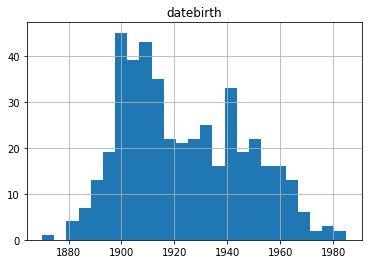

In [95]:
hist = OralHistories.hist(bins=25,column='datebirth')

In [96]:
OralHistories['datebirth'].describe()

count     444.000000
mean     1923.556306
std        22.946183
min      1870.000000
25%      1904.750000
50%      1919.500000
75%      1942.000000
max      1985.000000
Name: datebirth, dtype: float64

Combining this data with knowledge about major changes in the U.S. job market history, I decide on creating three groups: those who were on the job market during the Great Recession, those who went from school into the army during WW II and then into a job, and the Baby Boomers.

In [48]:
cut_labels = [1, 2, 3]
cut_bins = [0, 1910, 1940, 2000]
OralHistories['Generation'] = pandas.cut(OralHistories['datebirth'], bins=cut_bins, labels=cut_labels)

In [147]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

# Step 3: Semantic Networks

In [24]:
import networkx as nx

In [201]:
OralHistories = pandas.read_csv('out3.csv')

For this method, I need tokenized and normalized sentences.

In [ ]:
OralHistories['tokenized_sents'] = OralHistories['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [ ]:
OralHistories['normalized_sents'] = OralHistories['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [202]:
OralHistories

Unnamed: 0  Unnamed: 0.1                country  datebirth dateinterview  \
0             0             0                    NaN     1957.0          2016   
1             1             1                    NaN     1946.0          2016   
2             2             2                    NaN     1948.0          2016   
3             3             3                    NaN     1944.0          2016   
4             4             4                    NaN     1936.0          2016   
5             5             5                    NaN     1932.0          2016   
6             6             6                    NaN     1931.0          2016   
7             7             7                    NaN        NaN          2016   
8             8             8                    NaN     1948.0          2016   
9             9             9                    NaN     1930.0          2016   
10           10            10                    NaN     1941.0          2016   
11           11            11                    NaN     1937.0          2016   
12           12            12                    NaN     1938.0          2016   
13           13            13                    NaN     1936.0          2015   
14           14            14                    NaN     1945.0          2016   
15           15            15                    NaN     1938.0          2015   
16           16            16                    NaN     1942.0          2016   
17           17            17                    NaN     1929.0          2016   
18           18            18                    NaN        NaN          2016   
19           19            19                    NaN     1942.0          2015   
20           20            20                ALBANIA     1899.0          1991   
21           21            21        AUSTRIA-HUNGARY     1898.0          1991   
22           22            22                AUSTRIA     1901.0          1992   
23           23            23                AUSTRIA     1896.0          1991   
24           24            24                AUSTRIA     1905.0          1874   
25           25            25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26            26                  CHINA     1910.0          2001   
27           27            27                CROATIA     1915.0          1999   
28           28            28         CZECHOSLOVAKIA     1928.0          1991   
29           29            29         CZECHOSLOVAKIA     1912.0          1994   
..          ...           ...                    ...        ...           ...   
464         464           464                    NaN     1906.0          1976   
465         465           465                    NaN     1889.0          1975   
466         466           466                    NaN     1896.0          1975   
467         467           467                    NaN     1900.0          1975   
468         468           468                    NaN     1910.0          1976   
469         469           469                    NaN     1908.0          1975   
470         470           470                    NaN        NaN          1975   
471         471           471                    NaN     1916.0          1975   
472         472           472                    NaN     1911.0          1976   
473         473           473                    NaN     1915.0          1976   
474         474           474                    NaN     1923.0          1970   
475         475           475                    NaN     1910.0          1970   
476         476           476                    NaN     1985.0          1975   
477         477           477                    NaN     1907.0          1976   
478         478           478                    NaN     1892.0          1975   
479         479           479                    NaN     1892.0          1976   
480         480           480                    NaN     1900.0          1976   
481         481           481       

First, I look at cooccurences, beginning with the repository Teaneck Township.

In [13]:
TeaneckTownship['tokenized_sents'] = TeaneckTownship['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [14]:
TeaneckTownship

repository                                        interviewee  \
0   TeaneckTownship                                 Miss Louise Jordan   
1   TeaneckTownship                                 Miss Eleanor Encke   
2   TeaneckTownship                                        Ada Mantena   
3   TeaneckTownship          Agnes C. Norton, Teaneck Library Director   
4   TeaneckTownship    Alice Miraglia Hoek and Eleanor Kennedy Madison   
5   TeaneckTownship                                Alma Crotta Brennan   
6   TeaneckTownship                               Andy and Tony Limone   
7   TeaneckTownship                       Beatrice Schwartz Diggelmann   
8   TeaneckTownship                                       Chris Sheffe   
9   TeaneckTownship                                  Clare Christensen   
10  TeaneckTownship                                    Clarles Clausen   
11  TeaneckTownship                            David and Edna Musicant   
12  TeaneckTownship                                    Dorothy Mantena   
13  TeaneckTownship                                  Edna DeGraw Schuh   
14  TeaneckTownship  Elsie Von Scholda Butler, Helen Monahan, Helen...   
15  TeaneckTownship                              Fannie Borden Schultz   
16  TeaneckTownship                                 Frank & Ed Lofberg   
17  TeaneckTownship                                     Frank A. Weber   
18  TeaneckTownship                                        Frank Leers   
19  TeaneckTownship                Frederic Andreas (Mayor of Teaneck)   
20  TeaneckTownship                        George and William Beaumont   
21  TeaneckTownship                                      George Ahrens   
22  TeaneckTownship                                Helen Bradner Devoe   
23  TeaneckTownship                                  Howard Teitelbaum   
24  TeaneckTownship                                       Jack O'Brien   
25  TeaneckTownship                                      Jesson Witham   
26  TeaneckTownship                                   John P. Sullivan   
27  TeaneckTownship                        Joseph and Son Paul Zitelli   
28  TeaneckTownship                                      Joseph Riehle   
29  TeaneckTownship                                 Judge Leland Ferry   
30  TeaneckTownship                                      Larry Kuusela   
31  TeaneckTownship  Lillian Stevenson Pinkham, Milton Pinkham, Agn...   
32  TeaneckTownship                                      Louis DiBella   
33  TeaneckTownship        Lt. George Botyos, Teaneck Detective Bureau   
34  TeaneckTownship                                  Martial Kilmurray   
35  TeaneckTownship                                  Max A. Hasse, Jr.   
36  TeaneckTownship                                 Miss Jane Sullivan   
37  TeaneckTownship                       Mrs. Alma (Roscoe) Williford   
38  TeaneckTownship                 Mrs. Anna E. "Ellie" Leiffert Cole   
39  TeaneckTownship         Mrs. Clarence Lofberg and Mrs. Ralph Olsen   
40  TeaneckTownship                                Mrs. Edythe Whipple   
41  TeaneckTownship  Mrs. Frances Manno, Eva M. Gemp, Lucille M. Mc...   
42  TeaneckTownship  Mrs. Frank Scolpino and Det. Sgt. Anthony Scol...   
43  TeaneckTownship                           Mrs. George Leback (Eva)   
44  TeaneckTownship                                 Mrs. George Lebeck   
45  TeaneckTownship                                   Mrs. Harry Davis   
46  TeaneckTownship                          Mrs. Ida Damrau Montensen   
47  TeaneckTownship                     Mrs. Katherine Keener (age 90)   
48  TeaneckTownship                           Mrs. Lily Thiede Conklin   
49  TeaneckTownship           Mrs. Lois Henderson Stianson (Mrs. John)   
50  TeaneckTownship                      Mrs. Marjorie Polifene Zeliff   
51  TeaneckTownship                        Mrs. Miriam Johnson Freitag   
52  TeaneckTownship                                  Mrs. Sadie Laight   
53  TeaneckTo

In [15]:
TeaneckTownship['normalized_sents'] = TeaneckTownship['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [16]:
#look at cooccurences
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [17]:
g = wordCooccurrence(TeaneckTownship['normalized_sents'].sum())


In [18]:
len(g.nodes)


5201

In [19]:
len(g.edges)


61151

In [21]:
nx.write_graphml(g, 'oh_words.graphml')


In [22]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized


In [ ]:
import sklearn.feature_extraction
# in case of a module not found error


In [25]:
ohVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
ohVects_incidence = ohVectorizer.fit_transform(TeaneckTownship['text'])


In [26]:
ohVects_incidence.shape


(56, 5180)

In [27]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((ohVectorizer.get_feature_names()[i] for i in range(ohVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(ohVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, ohVectorizer.get_feature_names()[w], {'weight' : ohVects_incidence[d, w]}) for d, w in zip(*ohVects_incidence.nonzero())))


In [28]:
print(nx.info(g_2mode))


Name: 
Type: Graph
Number of nodes: 5236
Number of edges: 18371
Average degree:   7.0172


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


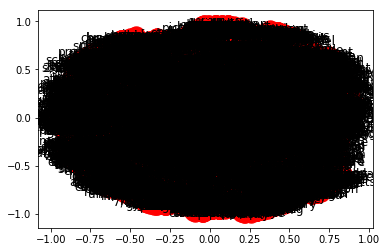

In [29]:
nx.draw_networkx(g_2mode)


As expected, the visualization of the full semantic network is not legible. I'll drill down into it.

In [30]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono


In [31]:
gDoc = contractNetwork(g_2mode, 'doc')


In [32]:
#look at word to word network

gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))


Name: 
Type: Graph
Number of nodes: 5180
Number of edges: 2129912
Average degree: 822.3598


In [33]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean


1.6057438053778748

In [34]:
g = wordCooccurrence(TeaneckTownship['normalized_sents'].sum())
#I deleted [:100]


In [35]:
len(g)


5201

In [36]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 25])


In [37]:
g.remove_nodes_from(list(nx.isolates(g))) 


In [38]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)


In [39]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 22
Number of edges: 32
Average degree:   2.9091


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


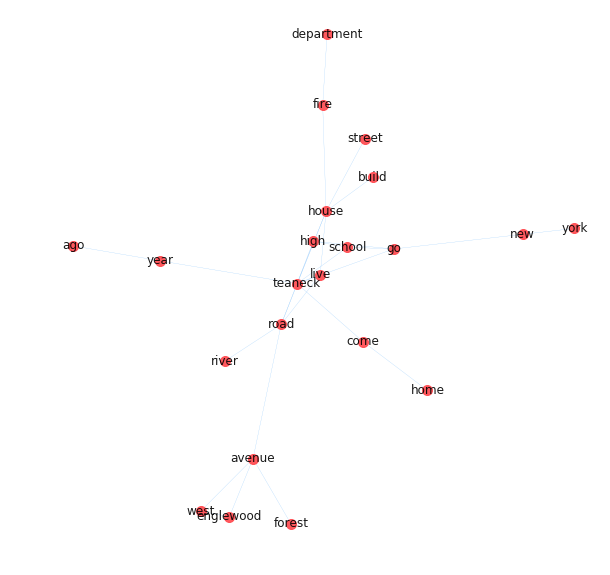

In [40]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


This visualization looks much better! It can be interpreted.

In [41]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))


In [42]:
c

[frozenset({'ago',
            'avenue',
            'build',
            'come',
            'department',
            'englewood',
            'fire',
            'forest',
            'go',
            'high',
            'home',
            'house',
            'live',
            'new',
            'river',
            'road',
            'school',
            'street',
            'teaneck',
            'west',
            'year',
            'york'})]

In [43]:
giant = nx.Graph(giant)


In [44]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 22
Number of edges: 32
Average degree:   2.9091


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


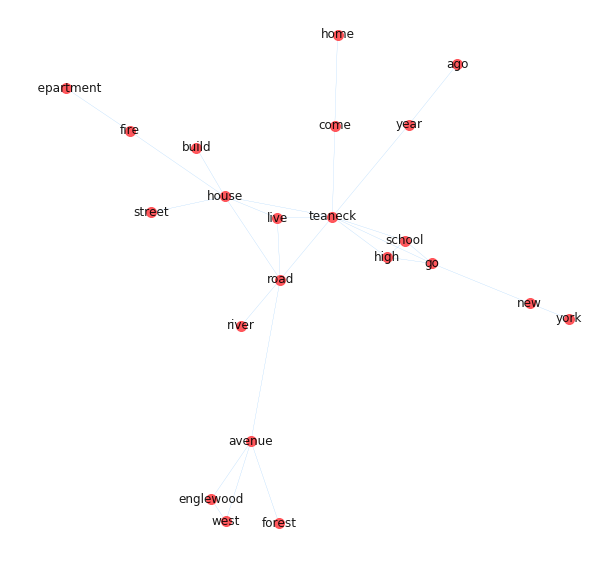

In [45]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


In [46]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))


teaneck, road, house, live


Next, I analyze the semantic network for the Marin County repository.

In [17]:
MarinCountyAll['tokenized_sents'] = MarinCountyAll['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [18]:
MarinCountyAll['normalized_sents'] = MarinCountyAll['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [19]:
MarinCountyAll

repository                                        interviewee  \
0    MarinCounty                   Dr. Grace Dollar Dickson Kleiser   
1    MarinCounty                                       Fritz Barkan   
2    MarinCounty                                Martha Foster Abbot   
3    MarinCounty                                        Sue Beittel   
4    MarinCounty                                       Rose Briones   
5    MarinCounty                                     Elizabeth Boyd   
6    MarinCounty                           Ruth Boerike White Bowie   
7    MarinCounty                                   Virginia Borland   
8    MarinCounty                                       Earl Dolcini   
9    MarinCounty                                 Helen Hind Fortune   
10   MarinCounty                                          Mary King   
11   MarinCounty                                  Alice Codoni Hall   
12   MarinCounty                                   Harrison Dibblee   
13   MarinCounty                                 Mabel Dodge Bullis   
14   MarinCounty                                       Jack Craemer   
15   MarinCounty                     Sue Estey, Don & Elaine Dvorak   
16   MarinCounty                                    Beatrice Howitt   
17   MarinCounty                                       Walter Brown   
18   MarinCounty                                       Marion Ibach   
19   MarinCounty                               Margaret Nelson Hall   
20   MarinCounty                                   Virginia Keating   
21   MarinCounty                                      Helen Caletti   
22   MarinCounty                                    Shirley Fischer   
23   MarinCounty                                       Nell Doherty   
24   MarinCounty                                      Robert Carson   
25   MarinCounty                                     Clifford Conly   
26   MarinCounty                                   Dr. Jack Gazzola   
27   MarinCounty                                      Valerie Ansel   
28   MarinCounty                       Bill Kruse and Tom Santilena   
29   MarinCounty                                Alan James Galloway   
..           ...                                                ...   
74   MarinCounty                              Elsie Andrews Mazzini   
75   MarinCounty                                         Cyr Miller   
76   MarinCounty                                        Betty Times   
77   MarinCounty                                        George Tong   
78   MarinCounty                                    Robert Trumbull   
79   MarinCounty                                      Grace Wellman   
80   MarinCounty                                      Karl Unterman   
81   MarinCounty        Helen Wilkins (HW) and Kenneth Wilkins (KW)   
82   MarinCounty                              Miriam Gerstle Wornum   
83   MarinCounty                                     Aileen Ziegler   
84   MarinCounty                                 Dr. Leo L. Stanley   
85   MarinCounty                                    William Schwarz   
86   MarinCounty                                           Ed Smith   
87   MarinCounty                                      Harry Sherman   
88   MarinCounty                                         Mike Smith   
89   MarinCounty                                       Boyd Stewart   
90   MarinCounty                                  Jean Starkweather   
91   MarinCounty                     Catherine O'Caine Strittmatter   
92   MarinCounty                                    Edward Thompson   
93   MarinCounty                                     Charles Tacchi   
94   MarinCounty                                    Pierce Thompson   
95   MarinCounty                                        Lloyd Roach   
96   MarinCounty                           Geneva Hensill Reinhardt   
97   MarinCounty                                Herbert Rowland Sr.   
98   MarinCounty              

In [20]:
MarinCountyAll.to_csv('MarinCountyAllBig.csv')

In [21]:
MarinCountyAll.to_pickle('MarinCountyAllBig.pkl')

In [22]:
#look at cooccurences
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g


In [25]:
g = wordCooccurrence(MarinCountyAll['normalized_sents'].sum())


In [26]:
len(g.nodes)


18738

In [27]:
len(g.edges)


715816

In [28]:
nx.write_graphml(g, 'marin_words.graphml')


In [29]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized


In [30]:
import sklearn.feature_extraction
# in case of a module not found error


In [31]:
ohVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
ohVects_incidence = ohVectorizer.fit_transform(MarinCountyAll['text'])
#I have deleted [:100]


In [32]:
ohVects_incidence.shape


(104, 18760)

In [33]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((ohVectorizer.get_feature_names()[i] for i in range(ohVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(ohVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, ohVectorizer.get_feature_names()[w], {'weight' : ohVects_incidence[d, w]}) for d, w in zip(*ohVects_incidence.nonzero())))


In [34]:
print(nx.info(g_2mode))


Name: 
Type: Graph
Number of nodes: 18864
Number of edges: 124283
Average degree:  13.1767


In [35]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono


In [36]:
gDoc = contractNetwork(g_2mode, 'doc')


In [37]:
#look at word to word network

gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))


Name: 
Type: Graph
Number of nodes: 18760
Number of edges: 34383529
Average degree: 3665.6214


In [38]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean


2.440088857662051

In [39]:
g = wordCooccurrence(MarinCountyAll['normalized_sents'].sum())
#I deleted [:100]


In [40]:
len(g)


18738

In [84]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 60])


In [85]:
g.remove_nodes_from(list(nx.isolates(g))) 


In [86]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)


In [87]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 254
Number of edges: 1209
Average degree:   9.5197


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


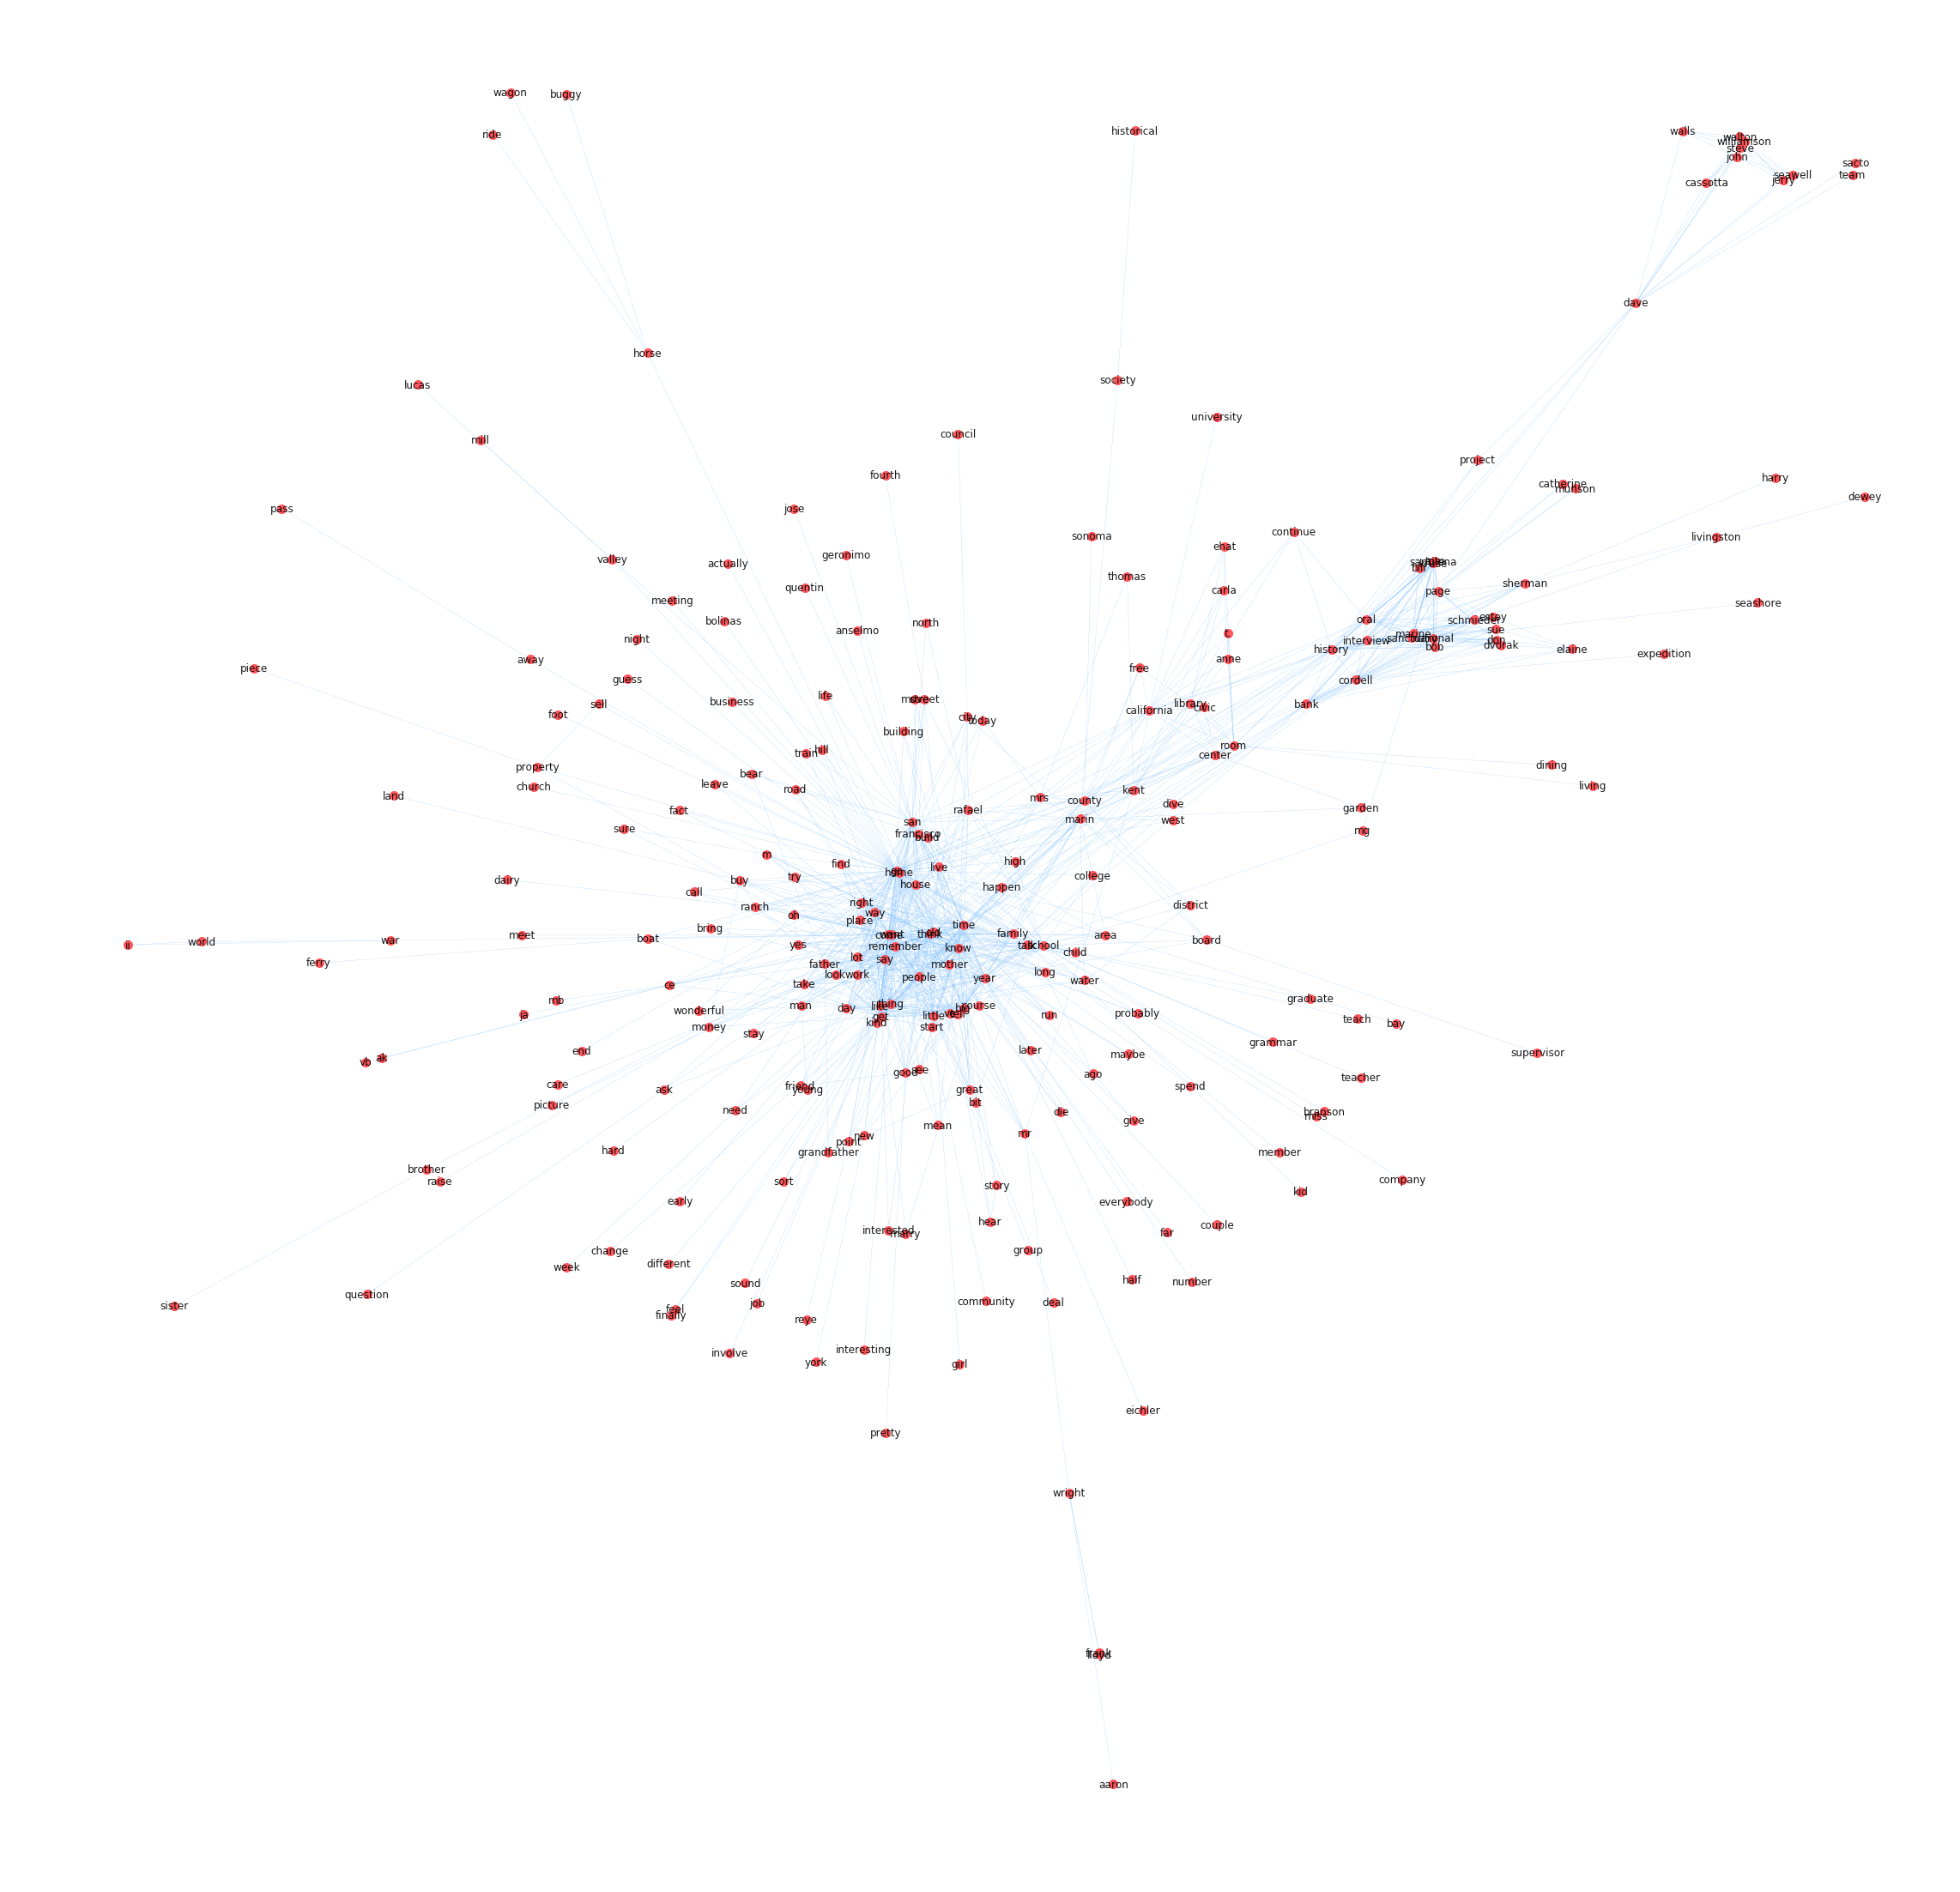

In [88]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (40,40))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


In [89]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))


In [142]:
3+5

8

In [90]:
c

[frozenset({'aaron',
            'actually',
            'ago',
            'ak',
            'anne',
            'anselmo',
            'area',
            'ask',
            'away',
            'bank',
            'bay',
            'bear',
            'big',
            'bill',
            'bit',
            'board',
            'boat',
            'bob',
            'bolinas',
            'branson',
            'bring',
            'brother',
            'buggy',
            'build',
            'building',
            'business',
            'buy',
            'california',
            'call',
            'care',
            'carla',
            'cassotta',
            'catherine',
            'ce',
            'center',
            'change',
            'child',
            'church',
            'city',
            'civic',
            'college',
            'come',
            'community',
            'company',
            'continue',
            'cordell',
            'council

In [91]:
giant = nx.Graph(giant)


In [92]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 254
Number of edges: 1209
Average degree:   9.5197


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


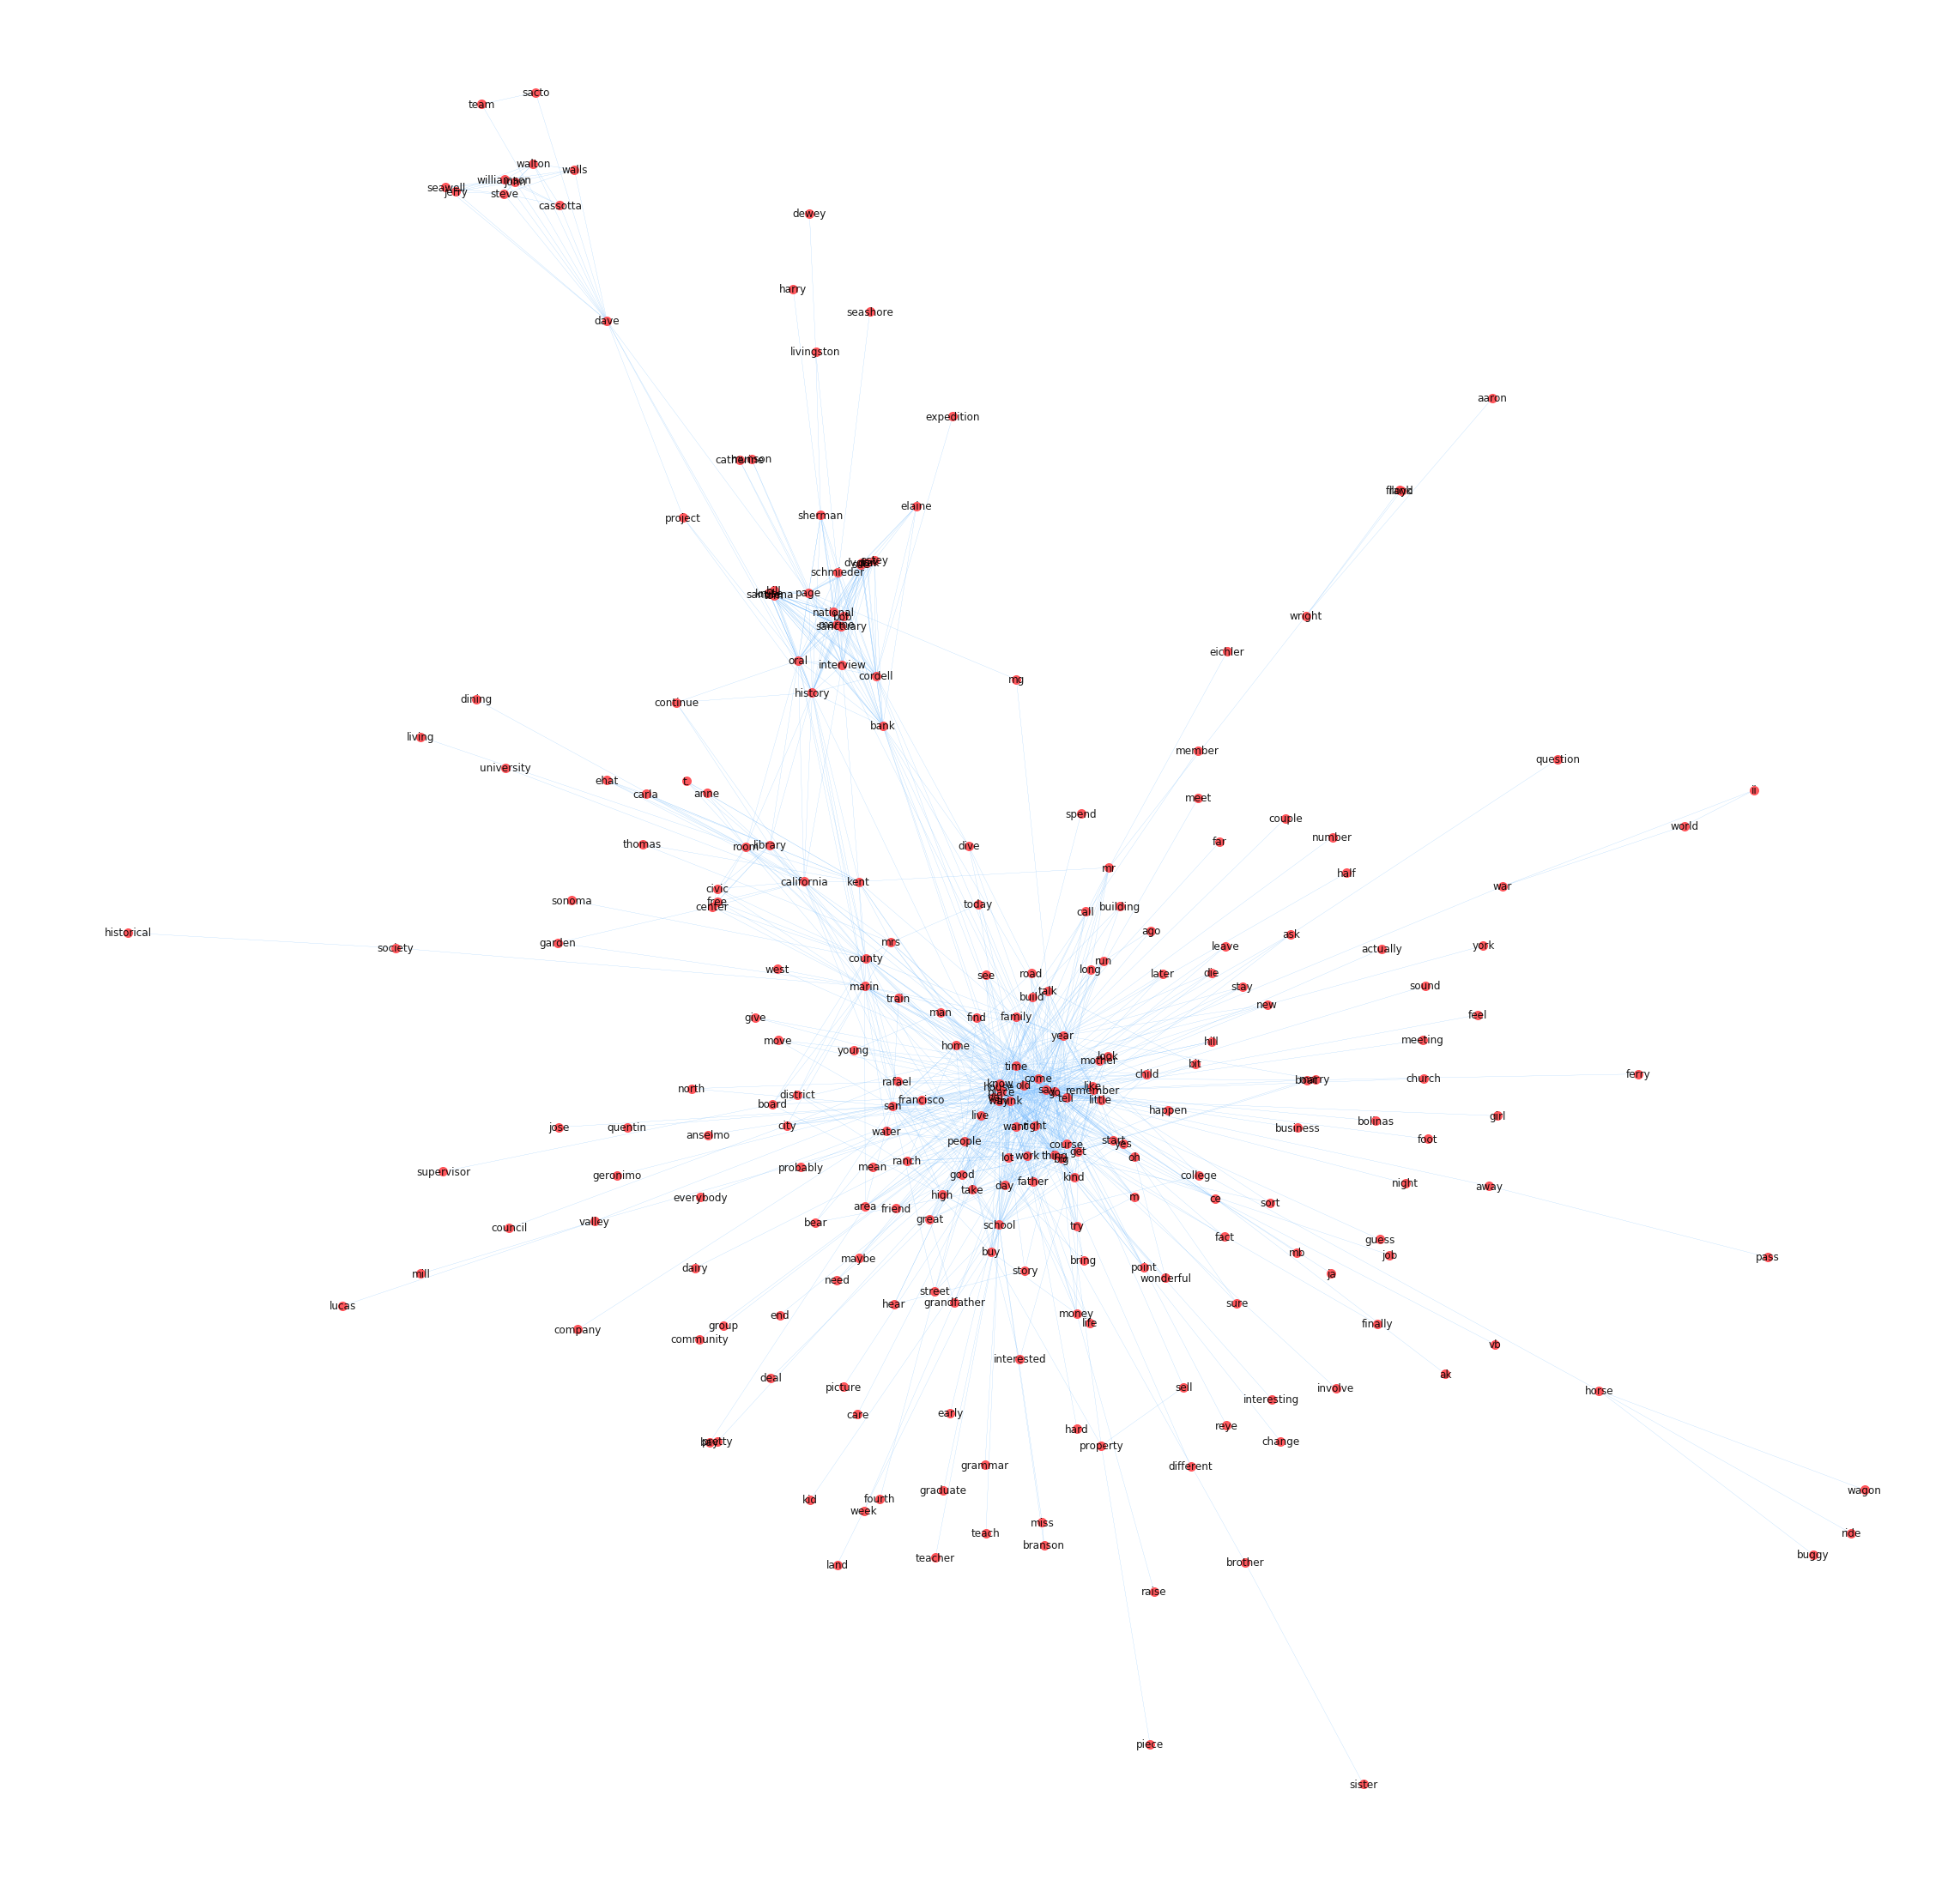

In [94]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (40,40))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


In [95]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))


go, come, know, time, think, get, thing, like, people, say, year, day, san, work


In [69]:
workNeighbors = giant.neighbors('work')
g_work = giant.subgraph(workNeighbors)
print(nx.info(g_work))


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 299
Average degree:  18.6875


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


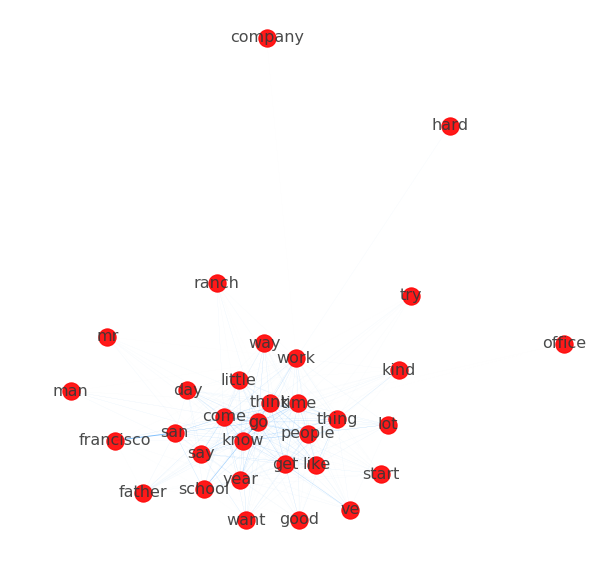

In [70]:
layout_work = nx.spring_layout(g_work, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_work.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_work.edges(data = True)))
nx.draw(g_work, ax = ax, pos = layout_work, labels = {n:n for n in g_work.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_work.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))


In [71]:
workNeighbors = gWord.neighbors('work')
workNeighborsPlus1 = set(workNeighbors)
for n in workNeighbors:
    workNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)


In [76]:
g_american2 = giant.subgraph(workNeighborsPlus1)
print(nx.info(g_american2))


Name: 
Type: Graph
Number of nodes: 300
Number of edges: 1602
Average degree:  10.6800


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


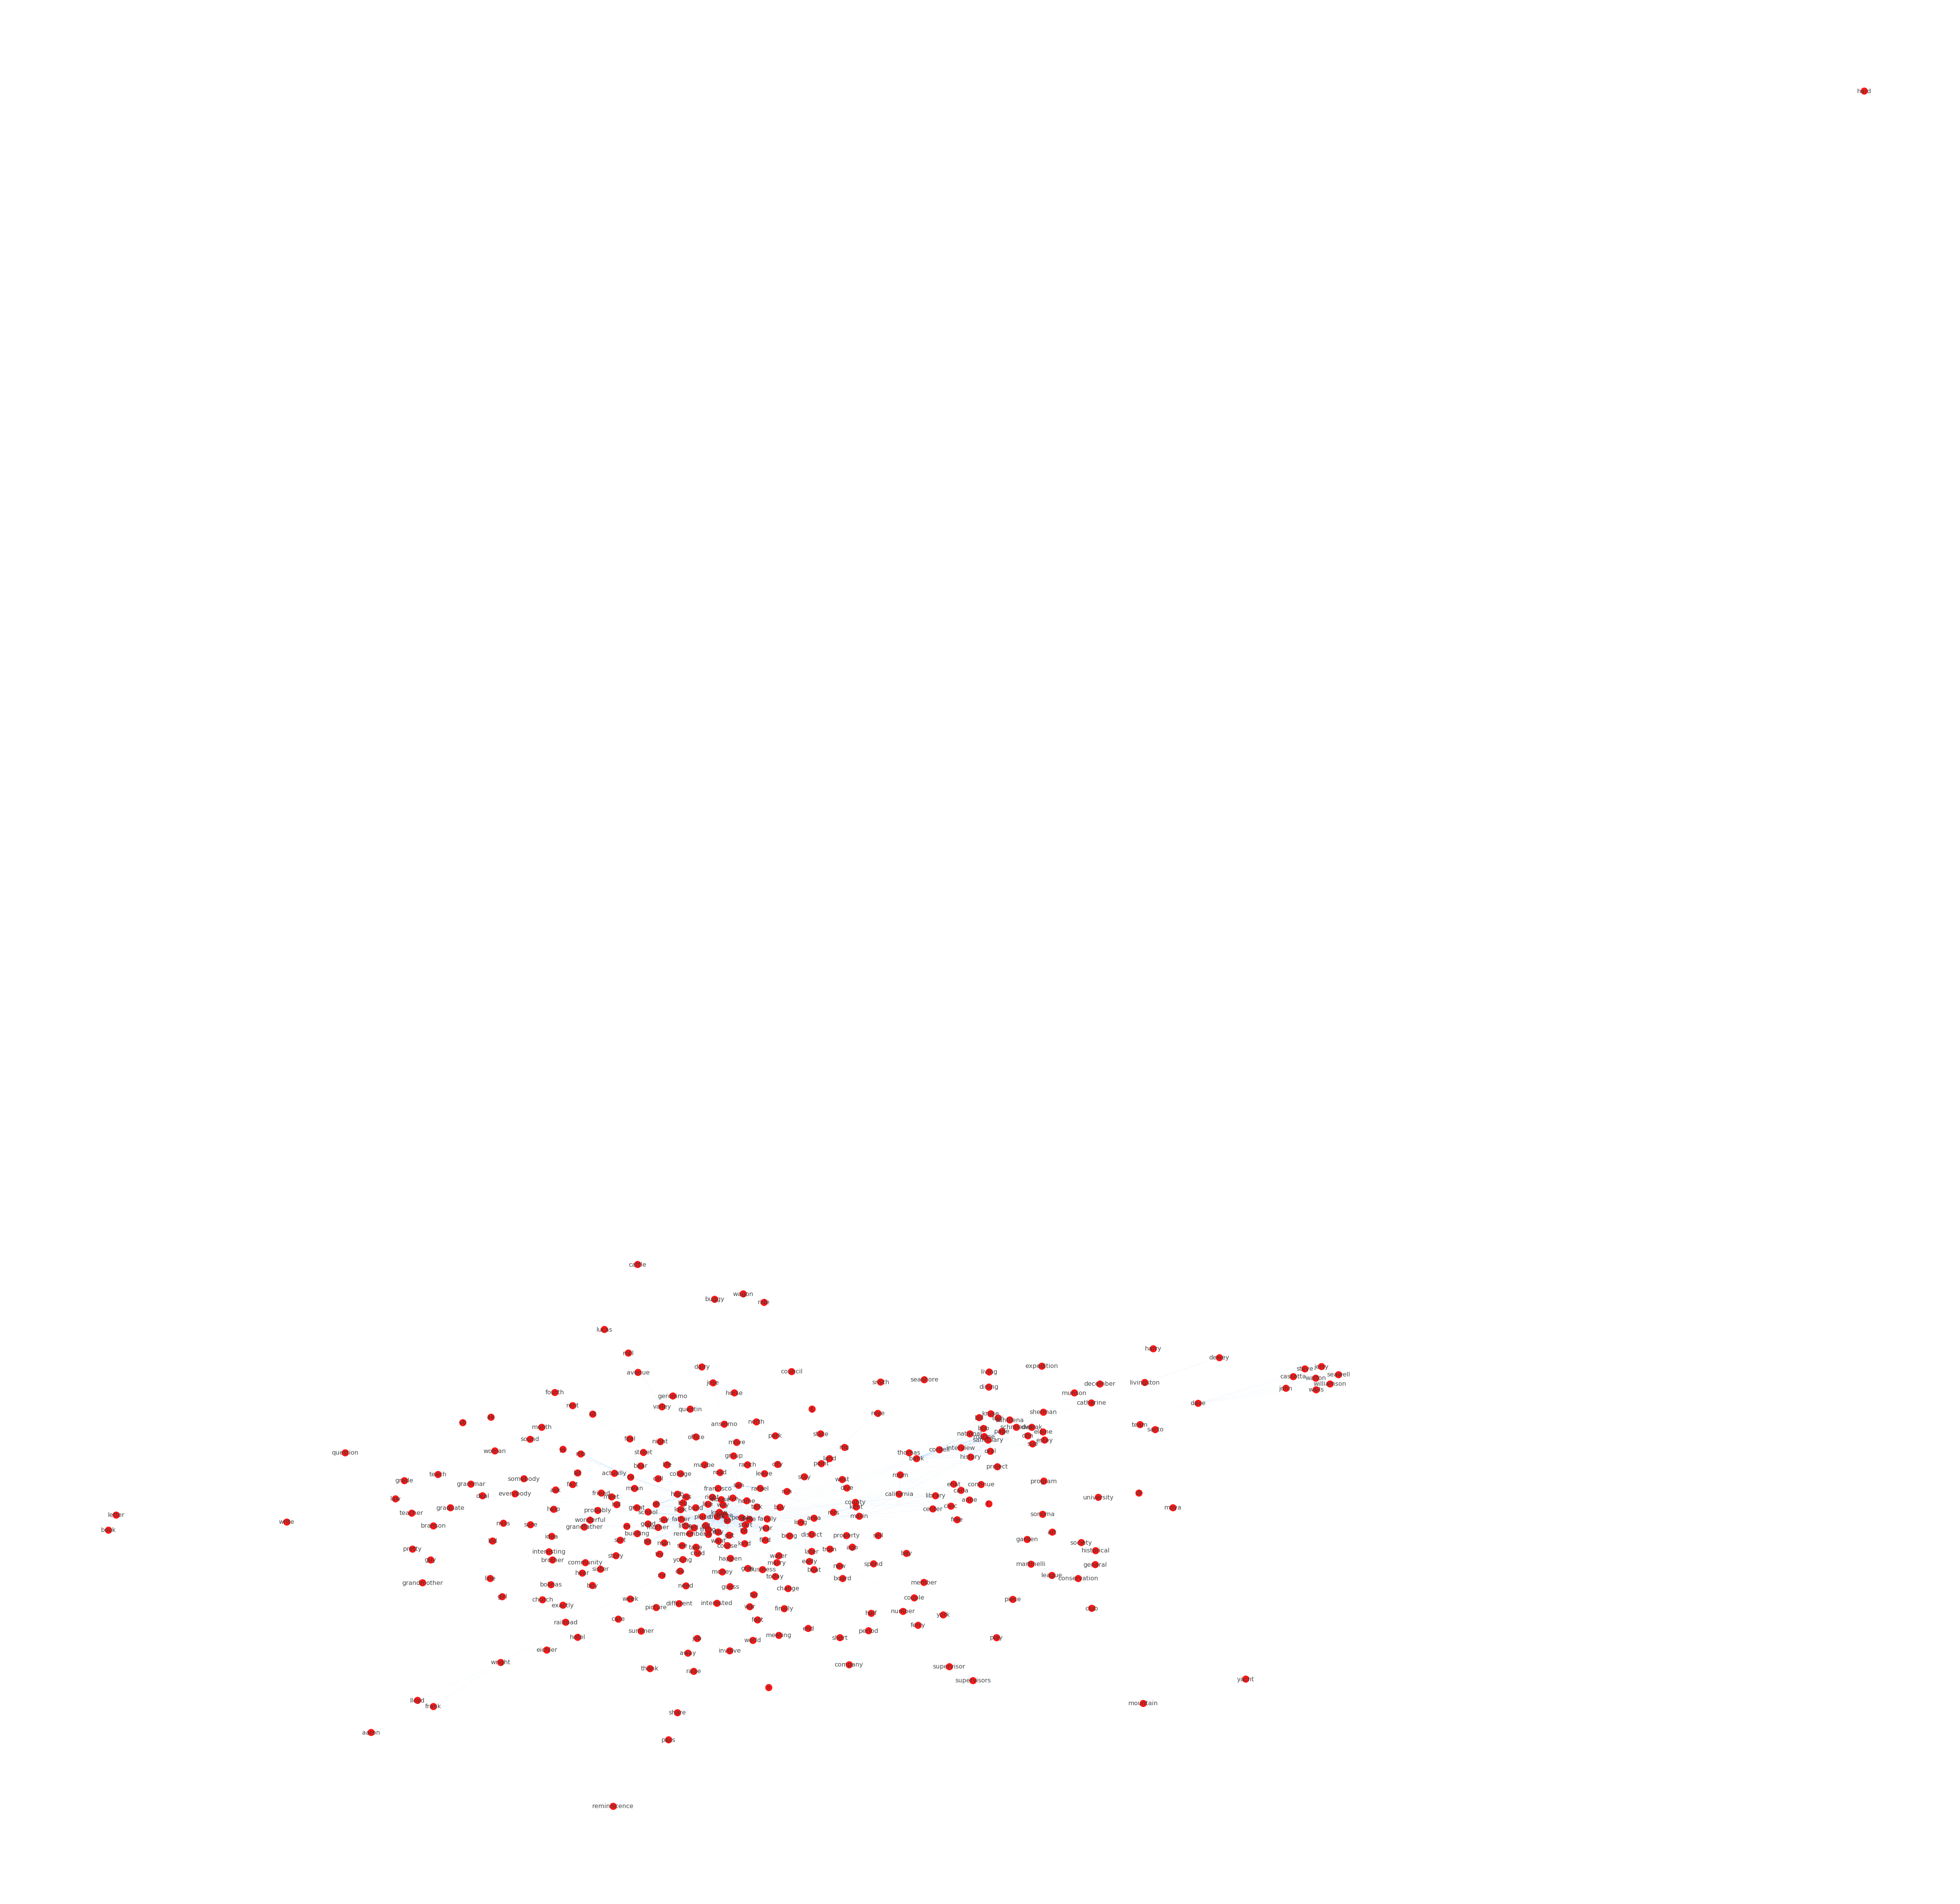

In [79]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (90,90))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))


Next, I conduct the semantic network analysis for the Ironworkers repository.

In [97]:
Ironworkers['tokenized_sents'] = Ironworkers['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [98]:
Ironworkers['normalized_sents'] = Ironworkers['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [99]:
Ironworkers.to_csv('Ironworkers.csv')

In [100]:
Ironworkers.to_pickle('Ironworkers.pkl')

In [101]:
#look at cooccurences
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g


In [102]:
g = wordCooccurrence(Ironworkers['normalized_sents'].sum())


In [103]:
len(g.nodes)


6950

In [104]:
len(g.edges)


96915

In [105]:
nx.write_graphml(g, 'ironworkers_words.graphml')


In [106]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized


In [107]:
import sklearn.feature_extraction
# in case of a module not found error


In [108]:
ohVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
ohVects_incidence = ohVectorizer.fit_transform(Ironworkers['text'])
#I have deleted [:100]


In [109]:
ohVects_incidence.shape


(24, 6916)

In [110]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((ohVectorizer.get_feature_names()[i] for i in range(ohVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(ohVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, ohVectorizer.get_feature_names()[w], {'weight' : ohVects_incidence[d, w]}) for d, w in zip(*ohVects_incidence.nonzero())))


In [111]:
print(nx.info(g_2mode))


Name: 
Type: Graph
Number of nodes: 6940
Number of edges: 21789
Average degree:   6.2793


In [112]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono


In [113]:
gDoc = contractNetwork(g_2mode, 'doc')


In [115]:
#look at word to word network

gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))


Name: 
Type: Graph
Number of nodes: 6916
Number of edges: 6681779
Average degree: 1932.2669


In [116]:
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean


1.6445705552368612

In [117]:
g = wordCooccurrence(Ironworkers['normalized_sents'].sum())
#I deleted [:100]


In [118]:
len(g)


6950

In [119]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 25])


In [120]:
g.remove_nodes_from(list(nx.isolates(g))) 


In [121]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)


In [122]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 74
Number of edges: 256
Average degree:   6.9189


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


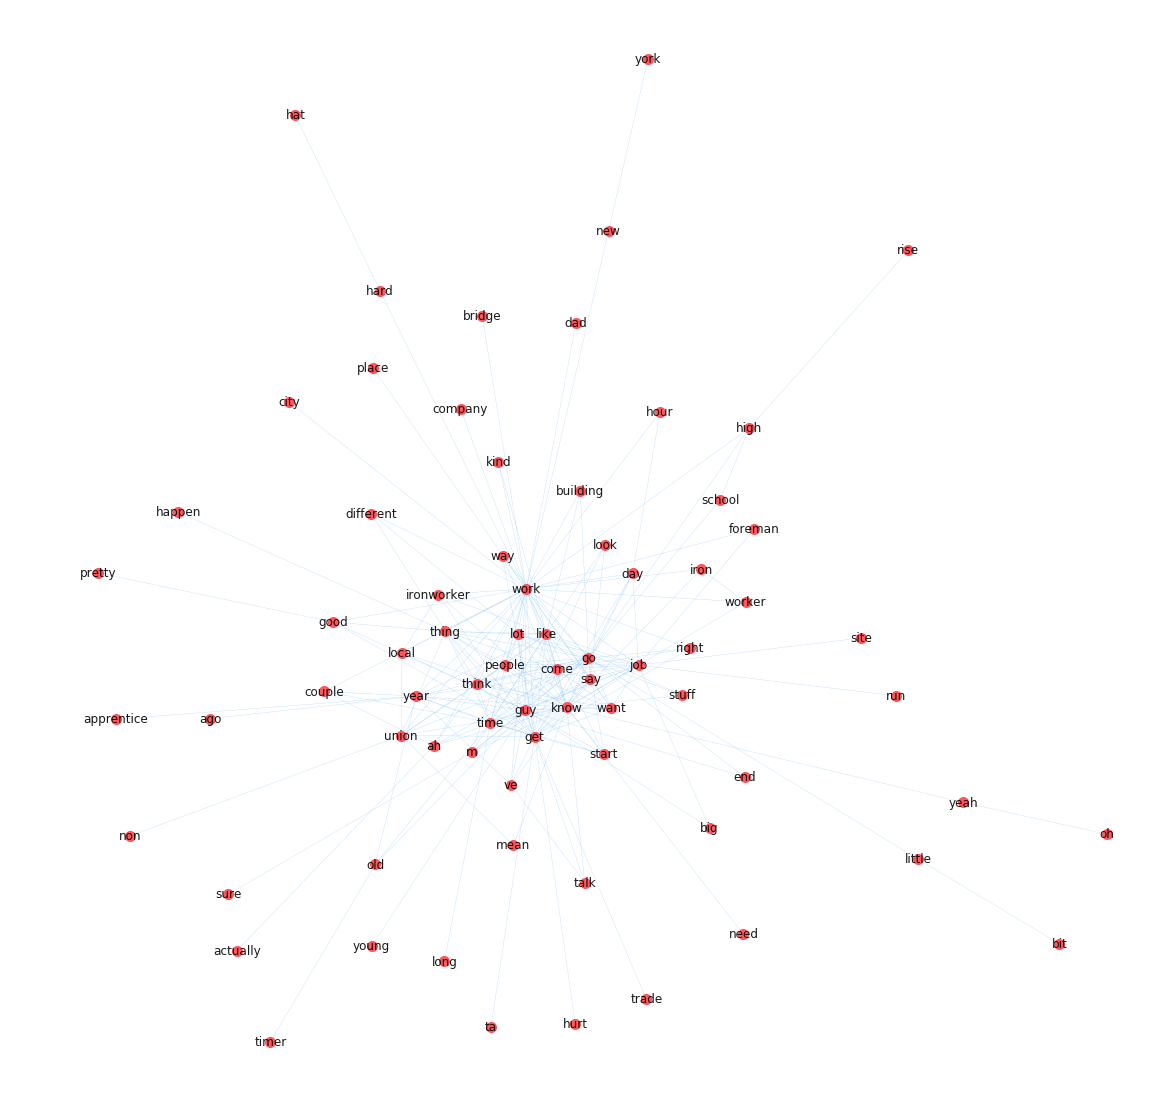

In [135]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (20,20))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


In [124]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(giant))


In [125]:
c

[frozenset({'actually',
            'ago',
            'ah',
            'apprentice',
            'big',
            'bit',
            'bridge',
            'building',
            'city',
            'come',
            'company',
            'couple',
            'dad',
            'day',
            'different',
            'end',
            'foreman',
            'get',
            'go',
            'good',
            'guy',
            'happen',
            'hard',
            'hat',
            'high',
            'hour',
            'hurt',
            'iron',
            'ironworker',
            'job',
            'kind',
            'know',
            'like',
            'little',
            'local',
            'long',
            'look',
            'lot',
            'm',
            'mean',
            'need',
            'new',
            'non',
            'oh',
            'old',
            'people',
            'place',
            'pretty',
            'right

In [126]:
giant = nx.Graph(giant)


In [127]:
giant.remove_nodes_from([n for n in giant.nodes if len(set(giant.neighbors(n))) >= 2000]) 
giant.remove_nodes_from(list(nx.isolates(giant)))
print(nx.info(giant))


Name: 
Type: Graph
Number of nodes: 74
Number of edges: 256
Average degree:   6.9189


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


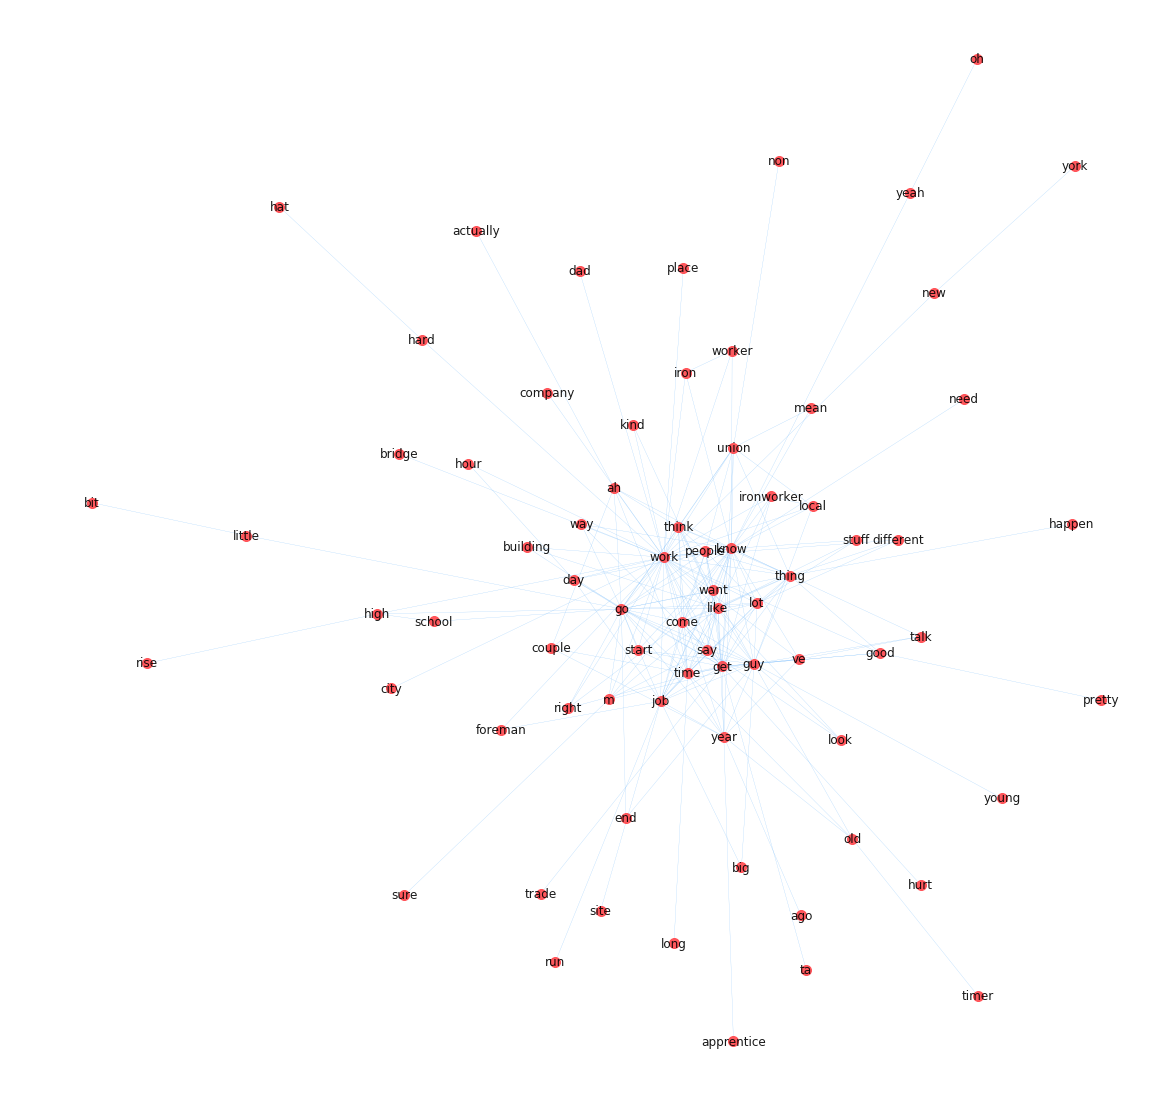

In [136]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (20,20))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying


In [ ]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))


In [129]:
americanNeighbors = giant.neighbors('work')
g_american = giant.subgraph(americanNeighbors)
print(nx.info(g_american))


Name: 
Type: Graph
Number of nodes: 43
Number of edges: 209
Average degree:   9.7209


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


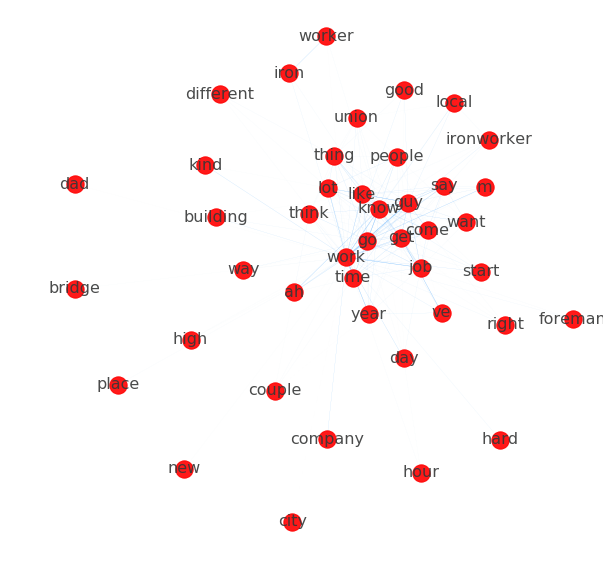

In [130]:
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))


In [132]:
americanNeighbors = gWord.neighbors('work')
americanNeighborsPlus1 = set(americanNeighbors)
for n in americanNeighbors:
    americanNeighborsPlus1 |= set(giant.neighbors(n))
    
#for x in americanNeighborsPlus1:
#    print(x)


In [133]:
g_american2 = giant.subgraph(americanNeighborsPlus1)
print(nx.info(g_american2))


Name: 
Type: Graph
Number of nodes: 73
Number of edges: 213
Average degree:   5.8356


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


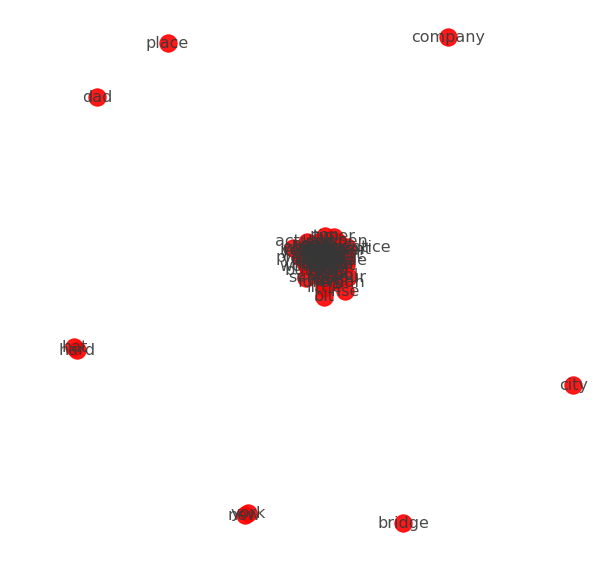

In [140]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))


/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


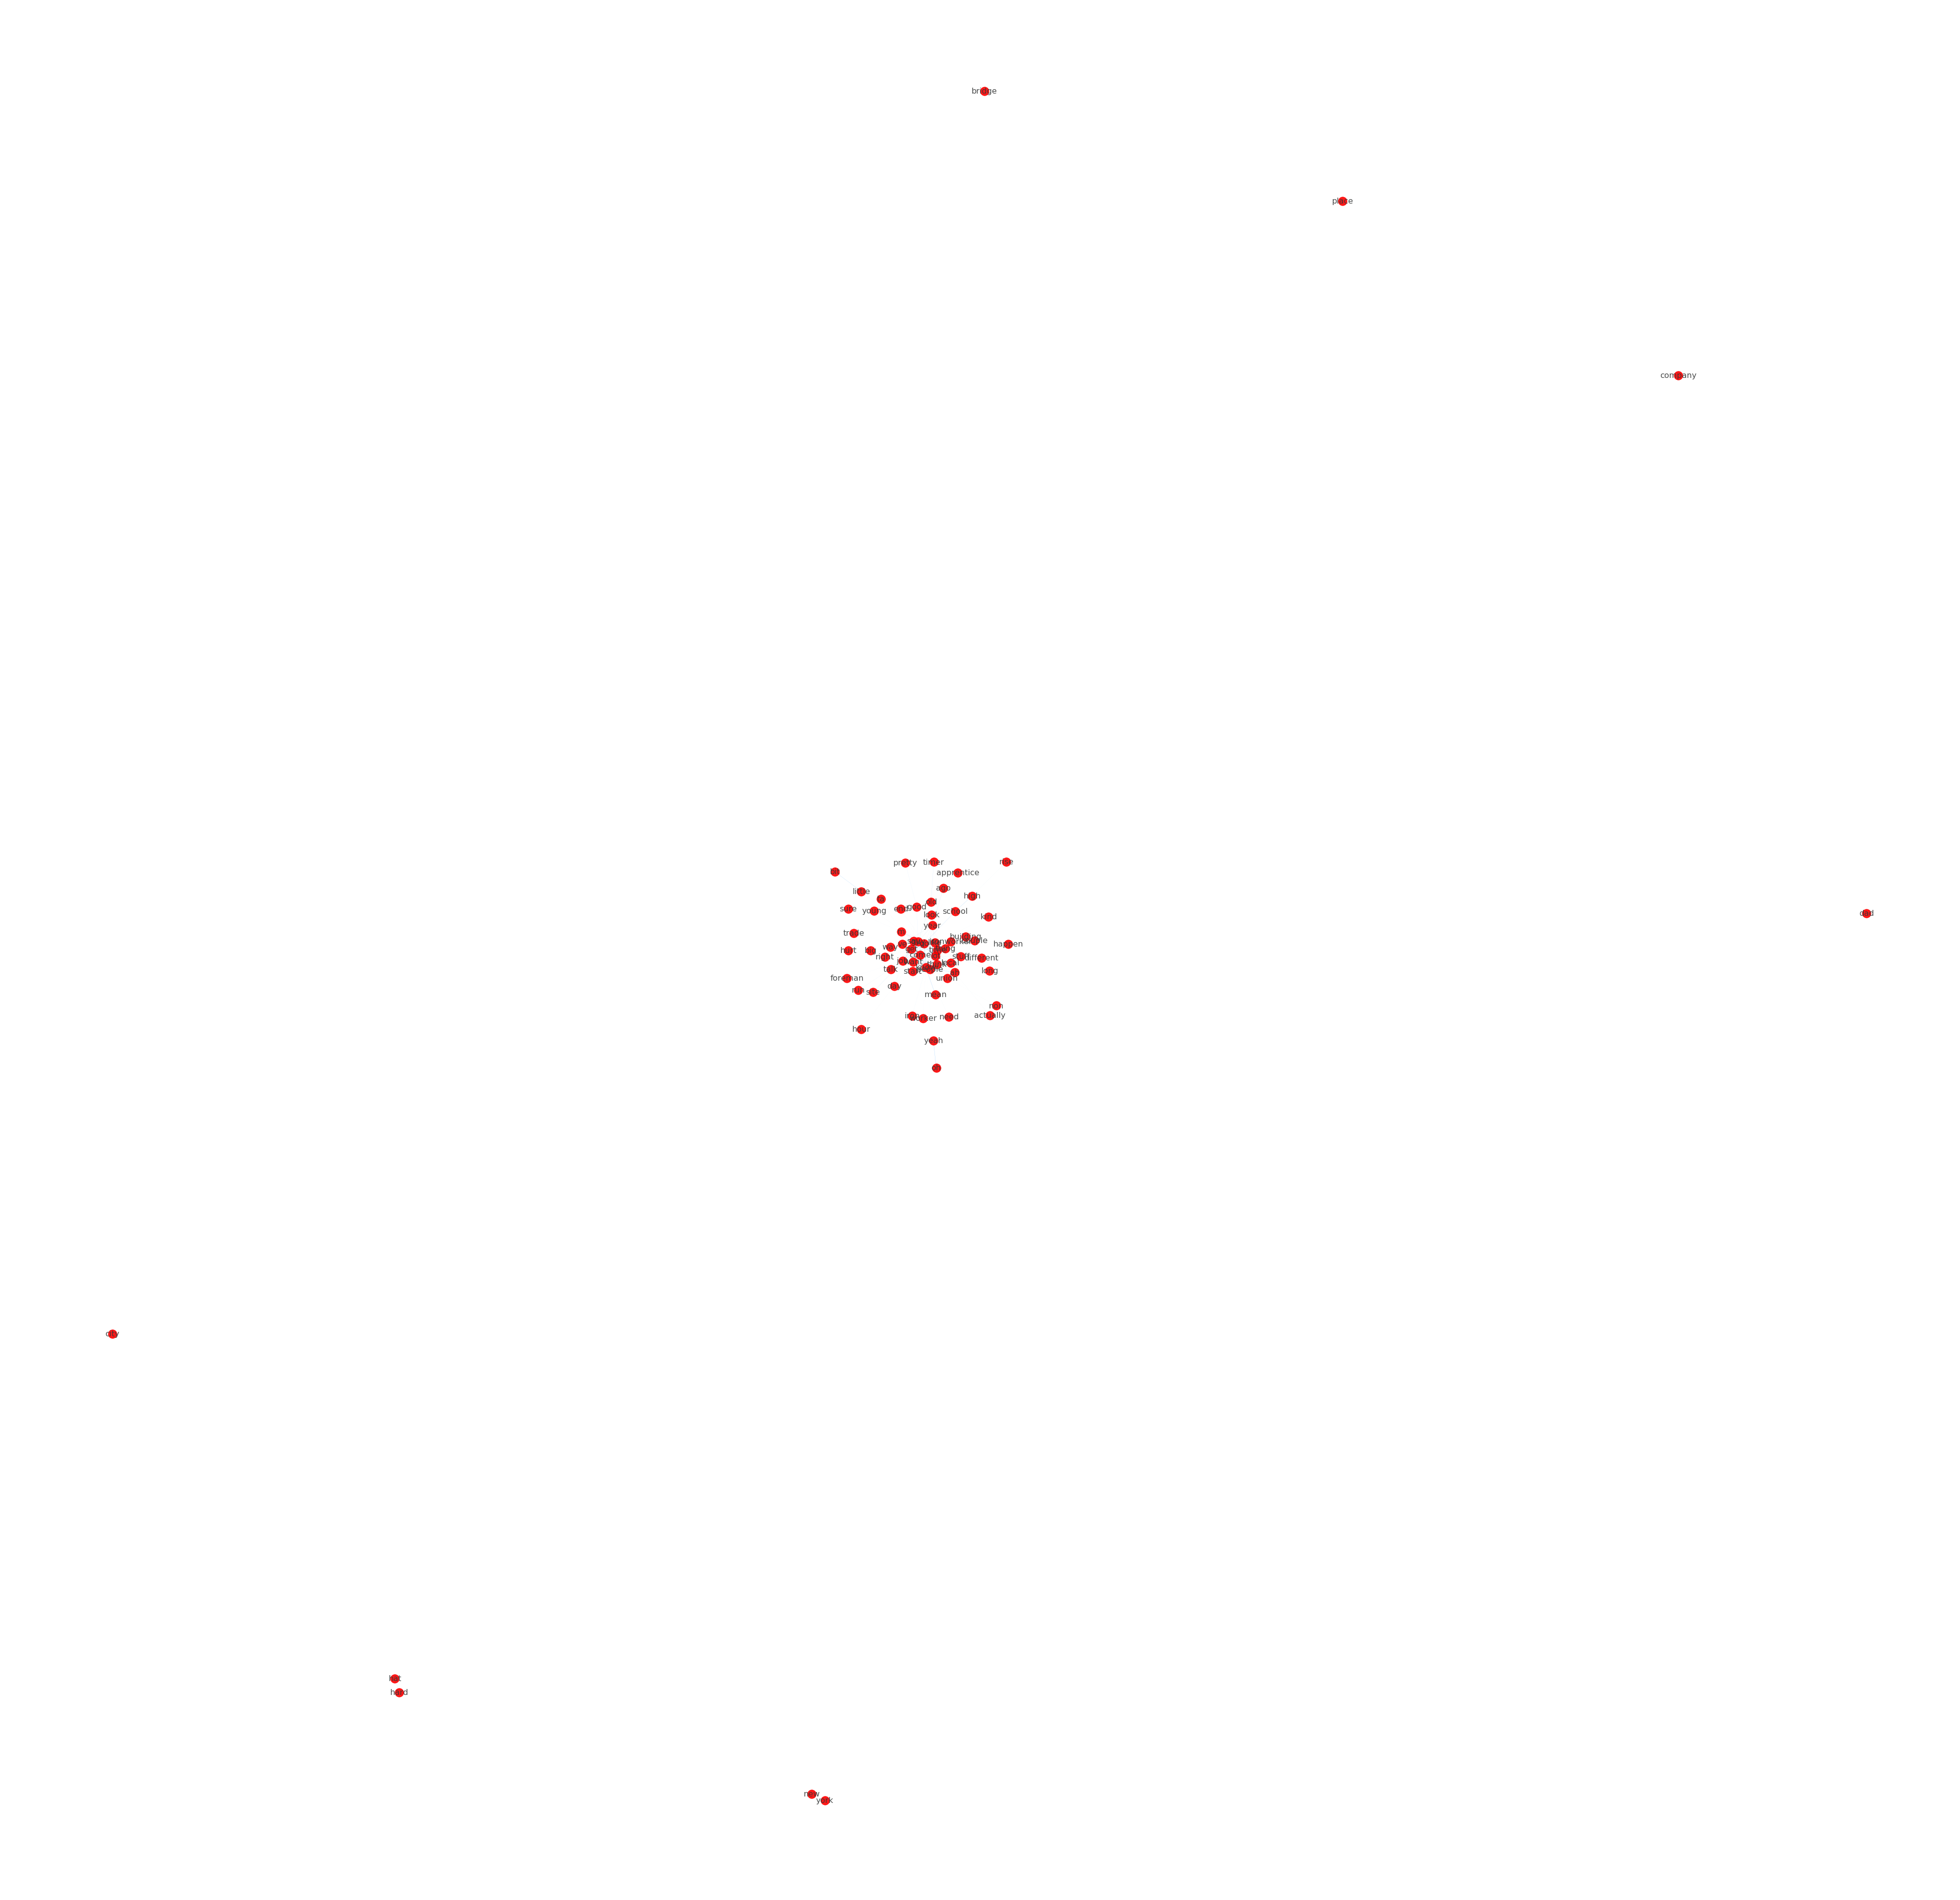

In [141]:
layout_amer = nx.spring_layout(g_american2, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (70,70))
centralities_amer = nx.eigenvector_centrality(g_american2)
maxC = max(centralities_amer.items(), key = lambda x : x[1])[1]
maxWeight = max((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american2.edges(data = True)))
nx.draw(g_american2, ax = ax, pos = layout_amer, labels = {n:n for n in g_american2.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american2.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma'))

When I download this visualization file and zoom into it using Preview, I can read all the words and make sense of it!

# Step 4: Topic Modeling

In [4]:
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

In [81]:
#initialize
ohVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
ohVects = ohVectorizer.fit_transform(OralHistories['text'])

First, I want to take a raw look into that vector space.

In [82]:
try:
    print(ohVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ohVectorizer.vocabulary_.keys())[:70]))

vector is missing
The available words are: ['tom', 'student', 'local', 'gas', 'station', 'uncle', 'dad', 'workers', 'stores', 'closed', 'detroit', 'historical', 'society', '28', 'mi', 'language', 'type', 'written', 'classes', 'problems', 'issues', 'related', 'planning', 'reading', 'developed', 'owned', 'oil', 'car', 'wash', 'asbury', 'putting', 'selling', 'police', 'usually', 'officer', 'watch', 'evening', 'guys', 'grand', 'river', 'guy', 'named', 'ride', 'drove', '25', '00', 'fast', 'bar', 'businesses', 'christmas', 'extra', 'middle', 'drive', 'western', 'michigan', 'university', 'fall', 'speak', 'wall', 'news', 'driving', 'black', 'east', 'downtown', 'seeing', 'grandmother', 'john', 'saturday', 'younger', 'monday'] ...


Ok, looks good!

In [ ]:
OralHistories['tokenized_text'] = OralHistories['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [ ]:
OralHistories['normalized_tokens'] = OralHistories['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [ ]:
OralHistories

My first attempt to create topics was marred by the many repository-specific stopwords, e.g., the names of interviewers or their abbrevations. I would only receive topics loading on these ephemeral features. So I delete those stopwors.

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ah'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ak'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'bh'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ce'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'higgins'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'huh'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'levine'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'marin'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'mg'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'monmouth'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'mrs'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ms'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ocean'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'pp'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'rafael'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'san'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'schmidt'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'sigrist'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'uh'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'um'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'yeah'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'xxxx'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'mc'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ja'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'wikoff'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'jordan'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'rb'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'aumack'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'fl'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'sh'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'lawrence'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'detroit'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'hs'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'pb'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'va'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'gk'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ps'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'il'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ag'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'wm'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'dallett'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'vb'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'gl'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ed'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'eb'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'constantine'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'francisco'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'reese'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'wb'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'kent'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'jm'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'jc'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'cm'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'william'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'rg'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'michele'])

In [ ]:
OralHistories['normalized_tokens'] = OralHistories.normalized_tokens.apply(lambda x: [i for i in x if i != 'ts'])

In [118]:
OralHistories

Unnamed: 0  Unnamed: 0.1                country  datebirth dateinterview  \
0             0             0                    NaN     1957.0          2016   
1             1             1                    NaN     1946.0          2016   
2             2             2                    NaN     1948.0          2016   
3             3             3                    NaN     1944.0          2016   
4             4             4                    NaN     1936.0          2016   
5             5             5                    NaN     1932.0          2016   
6             6             6                    NaN     1931.0          2016   
7             7             7                    NaN        NaN          2016   
8             8             8                    NaN     1948.0          2016   
9             9             9                    NaN     1930.0          2016   
10           10            10                    NaN     1941.0          2016   
11           11            11                    NaN     1937.0          2016   
12           12            12                    NaN     1938.0          2016   
13           13            13                    NaN     1936.0          2015   
14           14            14                    NaN     1945.0          2016   
15           15            15                    NaN     1938.0          2015   
16           16            16                    NaN     1942.0          2016   
17           17            17                    NaN     1929.0          2016   
18           18            18                    NaN        NaN          2016   
19           19            19                    NaN     1942.0          2015   
20           20            20                ALBANIA     1899.0          1991   
21           21            21        AUSTRIA-HUNGARY     1898.0          1991   
22           22            22                AUSTRIA     1901.0          1992   
23           23            23                AUSTRIA     1896.0          1991   
24           24            24                AUSTRIA     1905.0          1874   
25           25            25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26            26                  CHINA     1910.0          2001   
27           27            27                CROATIA     1915.0          1999   
28           28            28         CZECHOSLOVAKIA     1928.0          1991   
29           29            29         CZECHOSLOVAKIA     1912.0          1994   
..          ...           ...                    ...        ...           ...   
464         464           464                    NaN     1906.0          1976   
465         465           465                    NaN     1889.0          1975   
466         466           466                    NaN     1896.0          1975   
467         467           467                    NaN     1900.0          1975   
468         468           468                    NaN     1910.0          1976   
469         469           469                    NaN     1908.0          1975   
470         470           470                    NaN        NaN          1975   
471         471           471                    NaN     1916.0          1975   
472         472           472                    NaN     1911.0          1976   
473         473           473                    NaN     1915.0          1976   
474         474           474                    NaN     1923.0          1970   
475         475           475                    NaN     1910.0          1970   
476         476           476                    NaN     1985.0          1975   
477         477           477                    NaN     1907.0          1976   
478         478           478                    NaN     1892.0          1975   
479         479           479                    NaN     1892.0          1976   
480         480           480                    NaN     1900.0          1976   
481         481           481       

In [ ]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

OralHistories['reduced_tokens'] = OralHistories['normalized_tokens'].apply(lambda x: dropMissing(x, ohVectorizer.vocabulary_.keys()))

In [120]:
OralHistories

Unnamed: 0  Unnamed: 0.1                country  datebirth dateinterview  \
0             0             0                    NaN     1957.0          2016   
1             1             1                    NaN     1946.0          2016   
2             2             2                    NaN     1948.0          2016   
3             3             3                    NaN     1944.0          2016   
4             4             4                    NaN     1936.0          2016   
5             5             5                    NaN     1932.0          2016   
6             6             6                    NaN     1931.0          2016   
7             7             7                    NaN        NaN          2016   
8             8             8                    NaN     1948.0          2016   
9             9             9                    NaN     1930.0          2016   
10           10            10                    NaN     1941.0          2016   
11           11            11                    NaN     1937.0          2016   
12           12            12                    NaN     1938.0          2016   
13           13            13                    NaN     1936.0          2015   
14           14            14                    NaN     1945.0          2016   
15           15            15                    NaN     1938.0          2015   
16           16            16                    NaN     1942.0          2016   
17           17            17                    NaN     1929.0          2016   
18           18            18                    NaN        NaN          2016   
19           19            19                    NaN     1942.0          2015   
20           20            20                ALBANIA     1899.0          1991   
21           21            21        AUSTRIA-HUNGARY     1898.0          1991   
22           22            22                AUSTRIA     1901.0          1992   
23           23            23                AUSTRIA     1896.0          1991   
24           24            24                AUSTRIA     1905.0          1874   
25           25            25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26            26                  CHINA     1910.0          2001   
27           27            27                CROATIA     1915.0          1999   
28           28            28         CZECHOSLOVAKIA     1928.0          1991   
29           29            29         CZECHOSLOVAKIA     1912.0          1994   
..          ...           ...                    ...        ...           ...   
464         464           464                    NaN     1906.0          1976   
465         465           465                    NaN     1889.0          1975   
466         466           466                    NaN     1896.0          1975   
467         467           467                    NaN     1900.0          1975   
468         468           468                    NaN     1910.0          1976   
469         469           469                    NaN     1908.0          1975   
470         470           470                    NaN        NaN          1975   
471         471           471                    NaN     1916.0          1975   
472         472           472                    NaN     1911.0          1976   
473         473           473                    NaN     1915.0          1976   
474         474           474                    NaN     1923.0          1970   
475         475           475                    NaN     1910.0          1970   
476         476           476                    NaN     1985.0          1975   
477         477           477                    NaN     1907.0          1976   
478         478           478                    NaN     1892.0          1975   
479         479           479                    NaN     1892.0          1976   
480         480           480                    NaN     1900.0          1976   
481         481           481       

In [ ]:
dictionary = gensim.corpora.Dictionary(OralHistories['reduced_tokens'])

In [ ]:
corpus = [dictionary.doc2bow(text) for text in OralHistories['reduced_tokens']]

In [ ]:
gensim.corpora.MmCorpus.serialize('oh.mm', corpus)
ohmm = gensim.corpora.MmCorpus('oh.mm')

In [ ]:
ohlda = gensim.models.ldamodel.LdaModel(corpus=ohmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')

In [240]:
ldaDF = pandas.DataFrame({
        'interviewee' : OralHistories['interviewee'],
        'topics' : [ohlda[dictionary.doc2bow(l)] for l in OralHistories['reduced_tokens']]
    })

In [241]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ohlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ohlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

Great, this worked. Now I can take a look at how the oral histories load on the topics.

In [242]:
ldaDF[1::50]

interviewee                                             topics  \
1        Tamara Perrin  [(0, 0.18416375), (1, 0.17777827), (7, 0.61796...   
51           Sam Gross                 [(1, 0.18526863), (8, 0.81253445)]   
101     Jennie Guddemi                                   [(8, 0.9974005)]   
151    John Cunningham  [(0, 0.7196411), (2, 0.16955175), (4, 0.027476...   
201     Elizabeth Boyd  [(0, 0.02201541), (1, 0.036143217), (2, 0.0139...   
251        Aaron Green                                  [(2, 0.99644965)]   
301          Ada Bryan  [(2, 0.70453465), (3, 0.05201262), (4, 0.03930...   
351       Rose Staples  [(0, 0.21785569), (1, 0.04763022), (3, 0.06451...   
401   Benjamin Holland                  [(5, 0.09196277), (6, 0.9038687)]   
451  Edna DeGraw Schuh                 [(8, 0.103113316), (9, 0.8830897)]   

      topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
1    0.184164  0.177778  0.000000  0.000000  0.000000  0.000000  0.000000   
51   0.000000  0.185269  0.000000  0.000000  0.000000  0.000000  0.000000   
101  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
151  0.719641  0.000000  0.169552  0.000000  0.027476  0.036659  0.000000   
201  0.022015  0.036143  0.013911  0.033796  0.151870  0.015093  0.000000   
251  0.000000  0.000000  0.996450  0.000000  0.000000  0.000000  0.000000   
301  0.000000  0.000000  0.704535  0.052013  0.039302  0.000000  0.000000   
351  0.217856  0.047630  0.000000  0.064518  0.000000  0.000000  0.375058   
401  0.000000  0.000000  0.000000  0.000000  0.000000  0.091963  0.903869   
451  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      topic_7   topic_8   topic_9  
1    0.617968  0.000000  0.000000  
51   0.000000  0.812534  0.000000  
101  0.000000  0.997401  0.000000  
151  0.000000  0.000000  0.042933  
201  0.106200  0.000000  0.608352  
251  0.000000  0.000000  0.000000  
301  0.000000  0.000000  0.196081  
351  0.000000  0.000000  0.291419  
401  0.000000  0.000000  0.000000  
451  0.000000  0.103113  0.883090

I want to know what the topics are. I first check for one topic and then create a table for all topics.

In [243]:
ohlda.show_topic(1)

[('child', 0.014122758),
 ('library', 0.010762993),
 ('boat', 0.009878518),
 ('happen', 0.0072369017),
 ('kid', 0.0069459947),
 ('island', 0.0067844894),
 ('laugh', 0.006657549),
 ('ship', 0.0066313827),
 ('girl', 0.0063988776),
 ('build', 0.0059718895)]

In [244]:
topicsDict = {}
for topicNum in range(ohlda.num_topics):
    topicWords = [w for w, p in ohlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0  Topic_1 Topic_2 Topic_3 Topic_4 Topic_5 Topic_6  Topic_7  \
0      child    child     kid  client   child     guy   child    child   
1     happen  library  happen    boat    ship   build    port     bank   
2      laugh     boat     guy   child   build   union    ship     boat   
3  community   happen   laugh    bank   marry    boat     guy    ranch   
4        guy      kid   stuff   learn    bank   child   build  teacher   
5        kid   island    girl  happen  happen   laugh  happen    marry   
6      build    laugh   train  worker    grow     kid     kid    laugh   
7       paul     ship   marry     die    farm  happen    send   happen   
8       grow     girl   ranch     guy     guy    ship    grow      guy   
9      group    build   build   build     kid   woman   laugh    build   

   Topic_8    Topic_9  
0  america      child  
1    laugh        guy  
2      guy      build  
3    build        kid  
4    child       grow  
5      die     happen  
6   happen  community  
7     ship      teach  
8     grow     avenue  
9     boat      union

Next, I want to check the topics for individual repositories. I begin with the Ironworkers repository.

In [165]:
#initialize
ohVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
ohVects = ohVectorizer.fit_transform(Ironworkers['text'])

In [166]:
try:
    print(ohVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ohVectorizer.vocabulary_.keys())[:70]))

vector is missing
The available words are: ['background', 'information', 'grow', 'park', 'married', 'parents', 'german', 'speak', 'english', 'ironworking', 'washburn', 'light', 'snow', 'figured', 'sat', 'railings', 'pipe', 'pour', 'sticking', 'fit', 'dry', 'served', 'indentured', 'lay', 'extra', 'raise', 'stage', '4th', 'scale', 'architectural', 'erection', 'cage', 'aluminum', 'corners', 'ready', 'roof', 'block', 'electric', 'hoist', 'smaller', 'cable', 'chair', 'rope', 'harness', 'common', 'spot', 'keeps', 'happening', 'stood', 'seat', 'held', 'stopped', 'points', 'motor', 'box', 'stairs', 'using', 'floors', 'higher', 'opening', 'jumped', 'slide', 'knocked', 'free', 'falling', 'swung', 'caught', 'burned', 'skin', 'powerhouse'] ...


In [167]:
Ironworkers['tokenized_text'] = Ironworkers['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))

In [168]:
Ironworkers['normalized_tokens'] = Ironworkers['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [169]:
Ironworkers['normalized_tokens'] = Ironworkers.normalized_tokens.apply(lambda x: [i for i in x if i != 'ah'])
Ironworkers['normalized_tokens'] = Ironworkers.normalized_tokens.apply(lambda x: [i for i in x if i != 'ahh'])
Ironworkers['normalized_tokens'] = Ironworkers.normalized_tokens.apply(lambda x: [i for i in x if i != 'al'])
Ironworkers['normalized_tokens'] = Ironworkers.normalized_tokens.apply(lambda x: [i for i in x if i != 'laugh'])


In [170]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

In [171]:
Ironworkers['reduced_tokens'] = Ironworkers['normalized_tokens'].apply(lambda x: dropMissing(x, ohVectorizer.vocabulary_.keys()))


In [172]:
dictionary = gensim.corpora.Dictionary(Ironworkers['reduced_tokens'])


In [173]:
corpus = [dictionary.doc2bow(text) for text in Ironworkers['reduced_tokens']]


In [174]:
gensim.corpora.MmCorpus.serialize('oh.mm', corpus)
ohmm = gensim.corpora.MmCorpus('oh.mm')


In [175]:
ohlda = gensim.models.ldamodel.LdaModel(corpus=ohmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')


In [176]:
ldaDF = pandas.DataFrame({
        'interviewee' : Ironworkers['interviewee'],
        'topics' : [ohlda[dictionary.doc2bow(l)] for l in Ironworkers['reduced_tokens']]
    })


In [177]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ohlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ohlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [178]:
ldaDF[1:10]


interviewee  \
1         Walter “Wally” Ritch   
2                   David Olby   
3  William C. “Bill” Tanneberg   
4    Augustine “Gus” Peplinski   
5     William W. (Bill) Kerwin   
6            Everett J. Erstad   
7            George L. Bunders   
8          Edgar L. “Ed” Smith   
9    Craig Satalic and Al Bass   

                                              topics   topic_0   topic_1  \
1                  [(0, 0.8104548), (2, 0.18118224)]  0.810455  0.000000   
2  [(2, 0.74133897), (3, 0.1855445), (4, 0.071420...  0.000000  0.000000   
3                                  [(1, 0.99233013)]  0.000000  0.992330   
4                                  [(2, 0.99743176)]  0.000000  0.000000   
5                                  [(2, 0.99766815)]  0.000000  0.000000   
6  [(0, 0.89459974), (1, 0.022179564), (2, 0.0823...  0.894600  0.022180   
7                 [(2, 0.84958917), (4, 0.14802015)]  0.000000  0.000000   
8  [(0, 0.36725664), (2, 0.5608339), (3, 0.060543...  0.367257  0.000000   
9  [(0, 0.50109994), (1, 0.0701953), (2, 0.020292...  0.501100  0.070195   

    topic_2   topic_3   topic_4  
1  0.181182  0.000000  0.000000  
2  0.741339  0.185545  0.071421  
3  0.000000  0.000000  0.000000  
4  0.997432  0.000000  0.000000  
5  0.997668  0.000000  0.000000  
6  0.082365  0.000000  0.000000  
7  0.849589  0.000000  0.148020  
8  0.560834  0.060544  0.010521  
9  0.020293  0.000000  0.399357

In [179]:
ohlda.show_topic(1)


[('worker', 0.012476172),
 ('teach', 0.0065155523),
 ('wear', 0.006294885),
 ('cable', 0.005894941),
 ('music', 0.005782191),
 ('column', 0.0053888857),
 ('leave', 0.005355318),
 ('plant', 0.0047886926),
 ('hat', 0.0047884136),
 ('hang', 0.0045670625)]

In [180]:
topicsDict = {}
for topicNum in range(ohlda.num_topics):
    topicWords = [w for w, p in ohlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0 Topic_1    Topic_2 Topic_3        Topic_4
0      teach  worker     worker  worker         worker
1     worker   teach      teach    hang         column
2      cable    wear        rod     buy           wear
3       park   cable       wear   wrong          leave
4        rod   music      cable   teach  international
5       grow  column        buy   leave          teach
6  carpenter   leave      leave   stair           vote
7     window   plant        hat   glass          month
8      month     hat  carpenter    wear           grow
9     member    hang      stick   irish      carpenter

Next, only for DetroitWorker.

In [137]:
#initialize
ohVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
ohVects = ohVectorizer.fit_transform(DetroitWorker['text'])


In [138]:
try:
    print(ohVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ohVectorizer.vocabulary_.keys())[:70]))


vector is missing
The available words are: ['student', 'schoolcraft', 'college', 'local', 'gas', 'station', 'remembers', 'uncle', 'asked', 'bring', '06', 'text', 'written', 'classes', 'taking', 'problems', 'mr', 'dearborn', 'issues', 'reasons', 'assigned', 'developed', 'owned', 'civil', 'disturbance', 'putting', 'curfew', 'selling', 'normally', '11', 'sent', 'usually', 'officer', 'watch', 'tanks', 'delivered', 'delivery', 'able', 'affected', 'guy', 'named', 'ride', 'license', 'older', 'pontiac', 'incidents', 'troops', 'southfield', 'freeway', 'ran', '25', '30', 'liquor', 'fast', 'use', 'pick', 'drink', 'asking', 'needed', 'basement', 'bar', 'businesses', 'christmas', 'extra', 'middle', 'western', 'university', 'fall', 'speak', 'wall'] ...


In [139]:
DetroitWorker['tokenized_text'] = DetroitWorker['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))


In [140]:
DetroitWorker['normalized_tokens'] = DetroitWorker['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))


In [141]:
DetroitWorker['normalized_tokens'] = DetroitWorker.normalized_tokens.apply(lambda x: [i for i in x if i != 'jw'])
DetroitWorker['normalized_tokens'] = DetroitWorker.normalized_tokens.apply(lambda x: [i for i in x if i != 'hs'])
DetroitWorker['normalized_tokens'] = DetroitWorker.normalized_tokens.apply(lambda x: [i for i in x if i != 've'])
DetroitWorker['normalized_tokens'] = DetroitWorker.normalized_tokens.apply(lambda x: [i for i in x if i != 'ww'])
DetroitWorker['normalized_tokens'] = DetroitWorker.normalized_tokens.apply(lambda x: [i for i in x if i != 'tv'])

In [142]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]


In [143]:
DetroitWorker['reduced_tokens'] = DetroitWorker['normalized_tokens'].apply(lambda x: dropMissing(x, ohVectorizer.vocabulary_.keys()))


In [144]:
dictionary = gensim.corpora.Dictionary(DetroitWorker['reduced_tokens'])


In [145]:
corpus = [dictionary.doc2bow(text) for text in DetroitWorker['reduced_tokens']]


In [146]:
gensim.corpora.MmCorpus.serialize('oh.mm', corpus)
ohmm = gensim.corpora.MmCorpus('oh.mm')


In [159]:
ohlda = gensim.models.ldamodel.LdaModel(corpus=ohmm, id2word=dictionary, num_topics=7, alpha='auto', eta='auto')


In [160]:
ldaDF = pandas.DataFrame({
        'interviewee' : DetroitWorker['interviewee'],
        'topics' : [ohlda[dictionary.doc2bow(l)] for l in DetroitWorker['reduced_tokens']]
    })


In [161]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ohlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ohlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [162]:
ldaDF[1::50]


interviewee                                             topics  topic_0  \
1  Tamara Perrin  [(2, 0.13733599), (4, 0.58507043), (5, 0.26931...      0.0   

   topic_1   topic_2  topic_3  topic_4   topic_5  topic_6  
1        0  0.137336      0.0  0.58507  0.269316      0.0

In [163]:
ohlda.show_topic(1)


[('live', 0.010625304),
 ('kid', 0.010440879),
 ('grow', 0.009926025),
 ('plant', 0.00942349),
 ('look', 0.009175341),
 ('happen', 0.008967259),
 ('sit', 0.0075648255),
 ('big', 0.006957609),
 ('walk', 0.006536097),
 ('guy', 0.006117142)]

In [164]:
topicsDict = {}
for topicNum in range(ohlda.num_topics):
    topicWords = [w for w, p in ohlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0 Topic_1 Topic_2 Topic_3    Topic_4   Topic_5 Topic_6
0       live    live    live    live       live      live    live
1      leave     kid    look    grow       look    happen  happen
2        kid    grow     guy     sit  telephone      grow     kid
3     happen   plant     kid  happen       grow      look    grow
4        sit    look    grow    walk        guy       kid    look
5       grow  happen   young     kid        sit      feel    kind
6     market     sit     sit    look     happen     plant   plant
7       look     big  happen     guy       need  actually     guy
8      close    walk    kind    feel    service      need   young
9  telephone     guy  change   leave   highland    friend   train

Next, only for the care takers.

In [97]:
#initialize
ohVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
ohVects = ohVectorizer.fit_transform(TakingCare['text'])


In [98]:
try:
    print(ohVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ohVectorizer.vocabulary_.keys())[:70]))


vector is missing
The available words are: ['michael', 'robert', 'bussel', 'previously', 'member', 'certified', 'nurse', 'year', 'half', 'light', 'cleans', 'house', 'shopping', 'little', 'cooking', 'provides', 'companionship', 'visits', 'currently', 'cares', '44', 'upset', 'looks', 'sister', 'law', 'encouraged', 'enter', 'line', 'classes', 'local', 'college', 'liked', 'nursing', 'retire', 'moving', 'younger', 'cared', 'glad', 'compassion', 'boss', 'advantage', 'learned', 'setting', 'desire', 'somebody', 'workday', 'bed', 'goes', 'store', 'items', 'complicated', 'accompany', 'doctor', 'office', 'bingo', 'drives', '53', 'best', 'friend', 'doesn', 'relationship', 'tries', 'use', 'create', 'lady', 'grandchildren', 'wants', '59', 'emotionally', 'hospital'] ...


In [99]:
TakingCare['tokenized_text'] = TakingCare['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))


In [100]:
TakingCare['normalized_tokens'] = TakingCare['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))


In [101]:
TakingCare['normalized_tokens'] = TakingCare.normalized_tokens.apply(lambda x: [i for i in x if i != 'ah'])


In [102]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]


In [103]:
TakingCare['reduced_tokens'] = TakingCare['normalized_tokens'].apply(lambda x: dropMissing(x, ohVectorizer.vocabulary_.keys()))


In [104]:
dictionary = gensim.corpora.Dictionary(TakingCare['reduced_tokens'])


In [105]:
corpus = [dictionary.doc2bow(text) for text in TakingCare['reduced_tokens']]


In [106]:
gensim.corpora.MmCorpus.serialize('oh.mm', corpus)
ohmm = gensim.corpora.MmCorpus('oh.mm')


In [131]:
ohlda = gensim.models.ldamodel.LdaModel(corpus=ohmm, id2word=dictionary, num_topics=4, alpha='auto', eta='auto')


In [132]:
ldaDF = pandas.DataFrame({
        'interviewee' : TakingCare['interviewee'],
        'topics' : [ohlda[dictionary.doc2bow(l)] for l in TakingCare['reduced_tokens']]
    })


In [133]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ohlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ohlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [134]:
ldaDF[1::50]


interviewee                             topics  topic_0  topic_1  \
1  Terry Luther  [(2, 0.16299301), (3, 0.8302458)]      0.0      0.0   

    topic_2   topic_3  
1  0.162993  0.830246

In [135]:
ohlda.show_topic(1)


[('thing', 0.014162196),
 ('consumer', 0.0141301155),
 ('live', 0.011823614),
 ('year', 0.011767644),
 ('hour', 0.010429546),
 ('tell', 0.009503934),
 ('member', 0.008178748),
 ('start', 0.0073389662),
 ('house', 0.006960859),
 ('training', 0.0066221445)]

In [136]:
topicsDict = {}
for topicNum in range(ohlda.num_topics):
    topicWords = [w for w, p in ohlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0   Topic_1     Topic_2     Topic_3
0    customer     thing         son    consumer
1       thing  consumer       child       child
2      mother      live       thing       thing
3  disability      year  disability        year
4        live      hour        live        live
5        year      tell        year         son
6      member    member       group        hour
7         yes     start  experience      parent
8         ask     house      parent  disability
9       skill  training      member        tell

Now, only for Marin County.

In [6]:
#initialize
ohVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
ohVects = ohVectorizer.fit_transform(MarinCountyAll['text'])

In [7]:
try:
    print(ohVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(ohVectorizer.vocabulary_.keys())[:70]))


vector is missing
The available words are: ['april', 'kentfield', 'grace', 'dollar', 'reminiscences', 'robert', 'captain', 'considered', 'american', 'seminary', 'anselmo', 'immediately', 'mission', 'march', 'tree', 'margaret', 'william', 'elizabeth', 'death', 'sudden', 'geronimo', 'provide', 'cook', 'upstairs', 'downstairs', 'suddenly', 'apparently', 'dead', 'oldest', 'fred', 'january', 'selling', 'bolinas', 'christmas', 'sick', 'realized', 'terribly', 'block', 'dear', 'played', 'nurse', 'hired', 'branson', 'youngest', 'stanley', 'stewart', 'playing', 'winter', 'showed', 'photograph', 'grandparents', 'traveled', 'harry', 'lloyd', 'betty', 'helen', 'katherine', 'class', '14', 'alright', 'fair', 'bed', 'breakfast', 'broke', 'letter', 'china', 'saved', 'picked', 'belvedere', 'including'] ...


In [8]:
MarinCountyAll['tokenized_text'] = MarinCountyAll['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))


In [9]:
MarinCountyAll['normalized_tokens'] = MarinCountyAll['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))


In [33]:
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'ag'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'ah'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'bob'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'cm'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'cordell'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'dave'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'dvorak'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'eb'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'ed'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'es'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'estey'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'et'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'gm'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'gt'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'kruse'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'livingston'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'marine'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'mc'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'md'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'mg'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'nicasio'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'page'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'pt'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'rb'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'schmieder'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'sue'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'vb'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'bolinas'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'ma'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'district'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'linda'])
MarinCountyAll['normalized_tokens'] = MarinCountyAll.normalized_tokens.apply(lambda x: [i for i in x if i != 'tape'])

In [34]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

In [35]:
MarinCountyAll['reduced_tokens'] = MarinCountyAll['normalized_tokens'].apply(lambda x: dropMissing(x, ohVectorizer.vocabulary_.keys()))

In [36]:
dictionary = gensim.corpora.Dictionary(MarinCountyAll['reduced_tokens'])


In [37]:
corpus = [dictionary.doc2bow(text) for text in MarinCountyAll['reduced_tokens']]


In [38]:
gensim.corpora.MmCorpus.serialize('oh.mm', corpus)
ohmm = gensim.corpora.MmCorpus('oh.mm')


In [66]:
ohlda = gensim.models.ldamodel.LdaModel(corpus=ohmm, id2word=dictionary, num_topics=5, alpha='auto', eta='auto')


In [67]:
ldaDF = pandas.DataFrame({
        'interviewee' : MarinCountyAll['interviewee'],
        'topics' : [ohlda[dictionary.doc2bow(l)] for l in MarinCountyAll['reduced_tokens']]
    })


In [68]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ohlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ohlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


In [69]:
ldaDF[1::10]


interviewee  \
1                                         Fritz Barkan   
11                                   Alice Codoni Hall   
21                                       Helen Caletti   
31                                     Arthur Giddings   
41   Manuel T. Freitas, Jr. (MF), Judge Carlos Frei...   
51                                      Gary Giacomini   
61                               Nellie Codoni McIsaac   
71                               William Wesley Peters   
81         Helen Wilkins (HW) and Kenneth Wilkins (KW)   
91                      Catherine O'Caine Strittmatter   
101                                          Jan Novie   

                                                topics   topic_0   topic_1  \
1                                     [(2, 0.9928989)]  0.000000  0.000000   
11                   [(1, 0.5097456), (4, 0.48003754)]  0.000000  0.509746   
21                   [(2, 0.24774107), (4, 0.7500501)]  0.000000  0.000000   
31   [(1, 0.8480949), (2, 0.047916062), (3, 0.10180...  0.000000  0.848095   
41   [(0, 0.11812536), (3, 0.017642263), (4, 0.8543...  0.118125  0.000000   
51                    [(1, 0.601588), (4, 0.39679712)]  0.000000  0.601588   
61                  [(1, 0.95395046), (4, 0.04349233)]  0.000000  0.953950   
71                    [(2, 0.8062058), (3, 0.1922777)]  0.000000  0.000000   
81   [(0, 0.012422402), (1, 0.43955746), (4, 0.5448...  0.012422  0.439557   
91                  [(1, 0.9633459), (4, 0.030201422)]  0.000000  0.963346   
101                [(2, 0.026384741), (3, 0.97237396)]  0.000000  0.000000   

      topic_2   topic_3   topic_4  
1    0.992899  0.000000  0.000000  
11   0.000000  0.000000  0.480038  
21   0.247741  0.000000  0.750050  
31   0.047916  0.101810  0.000000  
41   0.000000  0.017642  0.854379  
51   0.000000  0.000000  0.396797  
61   0.000000  0.000000  0.043492  
71   0.806206  0.192278  0.000000  
81   0.000000  0.000000  0.544861  
91   0.000000  0.000000  0.030201  
101  0.026385  0.972374  0.000000

In [70]:
ohlda.show_topic(2)


[('bank', 0.008296807),
 ('wright', 0.008000438),
 ('dairy', 0.007790091),
 ('dive', 0.0071724677),
 ('guy', 0.0065514008),
 ('grow', 0.006402621),
 ('plan', 0.0060843173),
 ('mention', 0.0054803533),
 ('frank', 0.0053777155),
 ('die', 0.0053462465)]

In [71]:
topicsDict = {}
for topicNum in range(ohlda.num_topics):
    topicWords = [w for w, p in ohlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0   Topic_1  Topic_2     Topic_3 Topic_4
0       bank       die     bank        bank     die
1       dive      bank   wright        dive  cheese
2   national       tom    dairy        foot    milk
3  sanctuary      acre     dive    national   dairy
4        die     raise      guy   sanctuary     kid
5        tom       guy     grow      wright    bank
6       foot       kid     plan       dewey  dollar
7     dollar      dive  mention        team   raise
8       milk      foot    frank         guy     tom
9   mountain  larkspur      die  photograph    grow

# Step 5: Vectorspace Word Embeddings

Last but not least, my favorite method!

In [142]:
import gensim#For word2vec, etc
from gensim.models import Word2Vec #I added this
from gensim.models import Doc2Vec #I added this
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [27]:
OralHistories = pandas.read_pickle("out6.pkl")

In [28]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

In [101]:
ohW2V = gensim.models.word2vec.Word2Vec(OralHistories['normalized_sents'].sum())

I want to check which words are most similar to 'work'.

In [102]:
ohW2V.most_similar('work')

[('job', 0.639579713344574),
 ('foreman', 0.6271835565567017),
 ('contractor', 0.6185650825500488),
 ('factory', 0.6026005744934082),
 ('hire', 0.6007442474365234),
 ('follow', 0.5791114568710327),
 ('garment', 0.5734776258468628),
 ('carpenter', 0.5713549852371216),
 ('commute', 0.5686933994293213),
 ('shift', 0.566623866558075)]

In [274]:
ohW2V.doesnt_match(['factory', 'money', 'steelworkers', 'dollars', 'teacher'])

'teacher'

In [275]:
ohW2V.doesnt_match(['factory', 'school', 'student', 'book', 'teacher'])

'factory'

To see if my vector space is meaningful, I calculate: father plus wife minus husband.

In [44]:
ohW2V.most_similar(positive=['father', 'wife'], negative = ['husband'])

[('mother', 0.7438857555389404),
 ('uncle', 0.7295236587524414),
 ('aunt', 0.7160767316818237),
 ('cousin', 0.7148938775062561),
 ('grandmother', 0.7117995023727417),
 ('mom', 0.7032057046890259),
 ('grandfather', 0.7004914283752441),
 ('sister', 0.685386061668396),
 ('grandma', 0.6799659132957458),
 ('dad', 0.6789506673812866)]

And the vectorspace gives me the perfect answer: mother!

In [107]:
keywords = ['work', 'working', 'worked', 'job']

In [110]:
taggedDocs = []
for index, row in OralHistories.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_tokens']]
    docKeywords.append(row['Generation'])
    docKeywords.append(row['interviewee']) #This lets us extract individual documnets since interviewees are unique
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['normalized_tokens'], tags = docKeywords))
OralHistories['TaggedOHs'] = taggedDocs

In [130]:
ohD2V = gensim.models.doc2vec.Doc2Vec(OralHistories['TaggedOHs'], size = 200) #Limiting to 100 dimensions

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [113]:
OralHistories

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
7             7                    NaN        NaN          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
18           18                    NaN        NaN          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
..          ...                    ...        ...           ...   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
470         470                    NaN        NaN          1975   
471         471                    NaN     1916.0          1975   
472         472                    NaN     1911.0          1976   
473         473                    NaN     1915.0          1976   
474         474                    NaN     1923.0          1970   
475         475                    NaN     1910.0          1970   
476         476                    NaN     1985.0          1975   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
483         483                    NaN     1912.0          1975   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
487         487                    NaN     1920.0          1970   
488         488                    NaN     1919.0          1970   
489         489                    NaN        NaN          1975   
490         490                    NaN        NaN          1973   
491         491                    NaN     1908.0   

In [114]:
OralHistories.to_csv('out7.csv')

In [ ]:
OralHistories.to_pickle('out8.pkl')

In [116]:
ohD2V.save('ohD2V')

In [139]:
ohD2V = Doc2Vec.load('ohD2V')

In [117]:
ohW2V.save('ohW2V')

In [140]:
ohW2V = Word2Vec.load('ohW2V')

In [37]:
ohD2V.docvecs['work']

array([-5.7871890e-01, -1.4607453e-01, -2.7278510e-01,  5.1587355e-01,
       -2.2309910e-01, -2.8958723e-01, -3.1039688e-01, -7.6539330e-02,
       -2.2484522e-01,  1.8130361e-01,  3.0309495e-01, -9.9172510e-02,
        8.5506183e-01, -5.2962955e-02, -6.4659935e-01,  2.1141490e-01,
        2.3099475e-02,  3.8576022e-01,  3.6415298e-02, -3.9795381e-01,
        5.0771183e-01,  4.2895854e-01,  4.8534977e-01,  5.3440487e-01,
       -2.2264427e-01,  4.4394624e-01, -3.8259137e-02, -1.5040465e-01,
        2.3385546e-01, -6.3999653e-01, -1.6560606e-04, -2.8181154e-01,
        2.2051109e-01, -6.3330871e-01, -2.1380289e-01,  5.3205568e-01,
       -4.8339856e-01, -5.1551808e-02, -2.4786949e-01,  2.4337210e-01,
        3.4216070e-01, -5.6306630e-01,  7.3299587e-02, -2.0223166e-01,
        1.8356384e-01, -4.4100246e-01,  9.4552189e-01, -5.7584310e-01,
       -4.1688676e-03, -1.4847063e-01, -2.4970029e-01,  1.2434383e-01,
        1.0440096e-01, -2.6586610e-01, -1.5120757e-01,  6.9002256e-02,
      

In [134]:
ohD2V['job']

array([-6.33827178e-03,  9.60666165e-02, -1.01311274e-01,  9.03526545e-02,
        2.43492424e-01, -2.56024361e-01, -6.31908551e-02, -1.41437203e-02,
        1.32452384e-01,  8.29619169e-02,  2.18145192e-01, -9.31912810e-02,
        1.28087223e-01,  2.11286634e-01,  1.41891658e-01,  1.58515722e-01,
        3.27371359e-01, -9.44156274e-02,  2.13436544e-01,  3.54194418e-02,
       -6.18703850e-02,  1.03397183e-02,  7.50747174e-02, -9.49593633e-02,
        7.84331486e-02,  1.42713264e-01, -6.85430318e-02,  1.39000937e-01,
        9.90032777e-02, -7.52950236e-02, -2.22341400e-02, -4.77156103e-01,
        2.97670867e-02, -2.99370382e-03, -7.67248198e-02,  6.56651258e-02,
       -4.68214601e-02, -1.18890509e-01,  1.36993438e-01,  4.74289358e-01,
       -1.25168800e-01, -2.05954120e-01, -1.73863638e-02, -2.56076813e-01,
       -1.06482357e-01,  3.62283826e-01, -7.60990083e-02, -2.80653611e-02,
       -2.59600431e-02,  9.24749598e-02,  2.24638715e-01,  2.38617003e-01,
        1.11603074e-01, -

In [294]:
OralHistories[::50]

Unnamed: 0  country  datebirth dateinterview  \
0             0      NaN     1957.0          2016   
50           50  HUNGARY     1896.0          1993   
100         100   SICILY     1910.0          1991   
150         150      NaN     1965.0          2019   
200         200      NaN     1883.0          1977   
250         250      NaN     1899.0          1987   
300         300      NaN        NaN          2000   
350         350      NaN     1914.0          2000   
400         400      NaN     1934.0          xxxx   
450         450      NaN        NaN          1976   

                                           interviewee       repository  \
0                                          Tom Shipley    DetroitWorker   
50                                    Rose Szanto Sims       Immigrants   
100                                      Frances Testa       Immigrants   
150                                 Robert Coppersmith    MadisonCounty   
200                                       Rose Briones      MarinCounty   
250  Miriam Bradley Grbac (MG) and Sister Bertha Ki...      MarinCounty   
300                                      Albert Gibson   MonmouthCounty   
350                                          Sam Venti   MonmouthCounty   
400                                       Bobby Kersey      PortHouston   
450                                    Dorothy Mantena  TeaneckTownship   

                                                  text  \
0    Tom Shipley, 1957, 2016 Title Tom Shipley Desc...   
50   HUNGARY, Rose Szanto Sims, 1896, 1993  Intervi...   
100  SICILY, Frances Testa, 1910, 1991,   Interview...   
150  Robert Coppersmith 1965 - 2019   Madison Histo...   
200  CE: Today is Friday, July 29th, 1977. And cont...   
250  CE: Today is Friday, March 10, 1978. Once agai...   
300  Albert Gibson, xxxx, 2000        Remembering T...   
350  Sam Venti, 1914, 2000        Remembering The 2...   
400  Bobby Kersey, 1934, xxxx  BOBBY KERSEY Summary...   
450  Dorothy Mantena, xxxx, 1976 (Interview taped 7...   

                                        tokenized_text  \
0    ['Tom', 'Shipley', '1957', '2016', 'Title', 'T...   
50   ['HUNGARY', 'Rose', 'Szanto', 'Sims', '1896', ...   
100  ['SICILY', 'Frances', 'Testa', '1910', '1991',...   
150  ['Robert', 'Coppersmith', '1965', '2019', 'Mad...   
200  ['CE', 'Today', 'is', 'Friday', 'July', '29th'...   
250  ['CE', 'Today', 'is', 'Friday', 'March', '10',...   
300  ['Albert', 'Gibson', 'xxxx', '2000', 'Remember...   
350  ['Sam', 'Venti', '1914', '2000', 'Remembering'...   
400  ['Bobby', 'Kersey', '1934', 'xxxx', 'BOBBY', '...   
450  ['Dorothy', 'Mantena', 'xxxx', '1976', 'Interv...   

                                     normalized_tokens  \
0    ['tom', 'shipley', 'title', 'tom', 'shipley', ...   
50   ['hungary', 'rise', 'szanto', 'sim', 'intervie...   
100  ['sicily', 'france', 'testa', 'interview', 'fr...   
150  ['robert', 'coppersmith', 'madison', 'historic...   
200  ['ce', 'today', 'friday', 'july', '29th', 'con...   
250  ['ce', 'today', 'friday', 'march', 'record', '...   
300  ['albert', 'gibson', 'xxxx', 'remember', '20th...   
350  ['sam', 'venti', 'remember', '20th', 'century'...   
400  ['bobby', 'kersey', 'xxxx', 'bobby', 'kersey',...   
450  ['dorothy', 'mantena', 'xxxx', 'interview', 't...   

                                       tokenized_sents  \
0    [[Tom, Shipley, 1957, 2016, Title, Tom, Shiple...   
50   [[HUNGARY, Rose, Szanto, Sims, 1896, 1993, Int...   
100  [[SICILY, Frances, Testa, 1910, 1991, Intervie...   
150  [[Robert, Coppersmith, 1965, 2019, Madison, Hi...   
200  [[CE], [Today, is, Friday, July, 29th, 1977], ...   
250  [[CE], [Today, is, Friday, March, 10, 1978], [...   
300  [[Albert, Gibson, xxxx, 2000], [Remembering, T...   
350  [[Sam, Venti, 1914, 2000, Remembering], [The, ...   
400  [[Bobby, Kersey, 1934, xxxx, BOBBY, KERSEY, Su...   
450  [[Dorothy, Mantena, xxxx, 1976], [Interview, t...   

                                      n

Which other oral history is most similar to Tom Shipley's?

In [295]:
ohD2V.docvecs.most_similar([ ohD2V['Tom Shipley'] ], topn=5 )

[('Tom Shipley', 1.0),
 ('Tamara Perrin', 0.8054988384246826),
 ('Andy and Tony Limone', 0.6359246969223022),
 ('John P. Sullivan', 0.5334943532943726),
 ('Eric Olsen', 0.5314309597015381)]

I use projection next.

In [215]:
ohW2V['daily'][:10]

array([ 0.07575334,  0.02454299, -0.00311271, -0.09527635, -0.35308054,
        0.23259683,  0.10971308,  0.35143736, -0.07309312,  0.17444617],
      dtype=float32)

In [208]:
ohW2V.wv.index2word[0:50]

['know',
 'go',
 'come',
 'ce',
 'like',
 'get',
 'think',
 'time',
 'work',
 'year',
 'people',
 'say',
 'yes',
 'thing',
 'school',
 'ms',
 'remember',
 'levine',
 'yeah',
 'mr',
 'want',
 'oh',
 'lot',
 'right',
 'little',
 'day',
 'good',
 'live',
 'tell',
 'uh',
 'father',
 'mother',
 'house',
 'sigrist',
 'old',
 'take',
 'home',
 'm',
 'big',
 'way',
 'start',
 'family',
 'job',
 've',
 'new',
 'kind',
 'place',
 'look',
 'talk',
 'mean']

In [218]:
ohTargetWords = ['ongoing', 'steady', 'daily', 'primary', 'usual', 'permanent', 'steady', 'seasonal', 'different', 'summertime', 'alternative', 'side', 'agricultural', 'little', 'small']
#words we will be mapping
ohTargetWords += ["convenient","fantastic","magnificent","rewarding","gratifying", "wonderful","fine","outstanding","fantastic","hard", "physical","tired","dirty", "mechanic", "dangerous", "safe", "exhaust", "tough", "tricky", "flexible", "few"]

wordsSubMatrix = []
for word in ohTargetWords:
    wordsSubMatrix.append(ohW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [225]:
ohTargetWords = ['ongoing', 'steady', 'daily', 'primary', 'usual', 'permanent', 'steady', 'seasonal', 'different', 'summertime', 'alternative', 'side', 'agricultural', 'little', 'small', "convenient","fantastic","magnificent","rewarding","gratifying", "wonderful","fine","outstanding","fantastic","hard", "physical","tired","dirty", "mechanic", "dangerous", "safe", "exhaust", "tough", "tricky", "flexible", "few"]
#words we will be mapping
ohTargetWords += ["steelworker", "farmer", "teacher", ]

wordsSubMatrix = []
for word in ohTargetWords:
    wordsSubMatrix.append(ohW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [226]:
wordsSubMatrix

array([[ 5.18055893e-02, -1.08713983e-02, -4.39543463e-02, ...,
         1.38417701e-03, -4.82971221e-02, -1.70010433e-01],
       [ 9.77607146e-02,  1.43369392e-01, -3.03477347e-01, ...,
        -1.23068914e-01, -1.46975741e-01, -1.63151756e-01],
       [ 7.57533386e-02,  2.45429892e-02, -3.11271241e-03, ...,
        -1.54752389e-01, -3.63864228e-02, -3.07768673e-01],
       ...,
       [ 6.35536714e-03,  3.07131466e-02, -8.22768062e-02, ...,
         8.72574281e-04, -2.57719196e-02, -5.19005433e-02],
       [-1.12963662e-01,  8.85671914e-01, -8.36108565e-01, ...,
        -8.93649876e-01,  1.61858186e-01,  4.28595357e-02],
       [ 2.53680855e-01, -1.26360500e+00, -4.91063714e-01, ...,
        -1.16725042e-01, -1.24244714e+00, -5.39484210e-02]], dtype=float32)

In [227]:
pcaWordsOH = sklearn.decomposition.PCA(n_components = 36).fit(wordsSubMatrix)
reducedPCA_dataOH = pcaWordsOH.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsOH = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataOH)

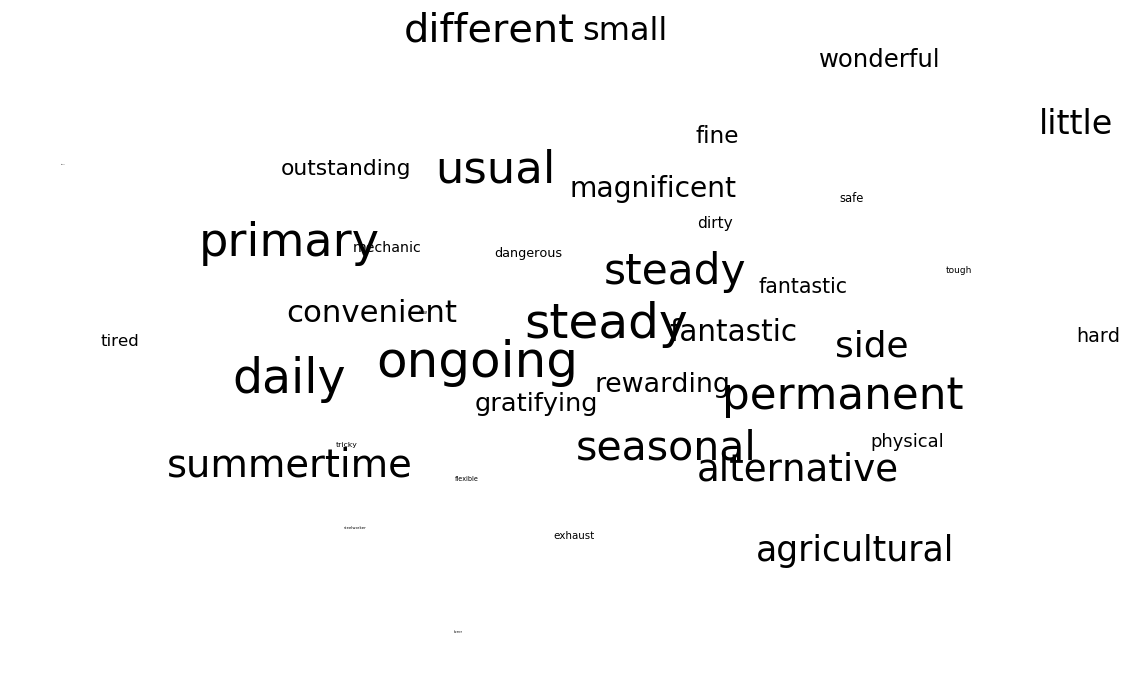

In [228]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsOH[:, 0], tsneWordsOH[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(ohTargetWords):
    ax.annotate(word, (tsneWordsOH[:, 0][i],tsneWordsOH[:, 1][i]), size =  50 * (len(ohTargetWords) - i) / len(ohTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Next, I project onto predefined dimensions. I start with Stability and Quality.

In [230]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [231]:
Stability = dimension(ohW2V, ['ongoing','steady', 'primary', 'usual', 'permanent', 'steady'], ['seasonal', 'different', 'summertime', 'alternative', 'side', 'little', 'small'])
Quality = dimension(ohW2V, ['rewarding','gratifying','wonderful', 'fine', 'fantastic', 'convenient'], ['bad', 'exploit', 'dangerous'])

In [245]:
Occupations = ["steelworker", "doctor","lawyer","plumber","scientist","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

In [246]:
def makeDF(model, word_list):
    g = []
    r = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(ohW2V[word].reshape(1,-1), Stability.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(ohW2V[word].reshape(1,-1), Quality.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'Stability': g, 'Quality': r}, index = word_list)
    return df

In [247]:
OCCdf = makeDF(ohW2V, Occupations) 

In [248]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

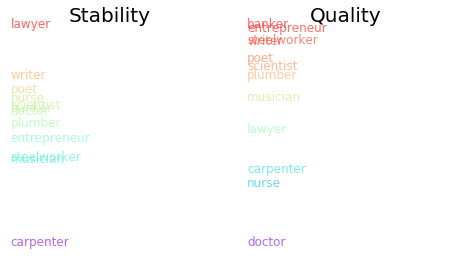

In [249]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'Stability')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'Quality')
plt.show()

What would also be interesting given my research interest is to measure the dimensions Family-PaidWork and Leisure-PaidWork. I start doing this for the Marin County repository.

In [211]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
#Stability = dimension(ohW2V, ['ongoing','steady', 'primary', 'usual', 'permanent', 'steady'], ['seasonal', 'different', 'summertime', 'alternative', 'side', 'little', 'small'])
#Quality = dimension(ohW2V, ['rewarding','gratifying','wonderful', 'fine', 'fantastic', 'convenient'], ['bad', 'exploit', 'dangerous'])

In [313]:
FamilyPaidWork = dimension(ohW2VMarin, ['brother','sister','uncle', 'aunt', 'father', 'mother', 'married', 'wife', 'husband', 'child'], ['money', 'dollar', 'salary', 'pay', 'hour', 'contract', 'job', 'work', 'salary', 'employ', 'boss', 'factory', 'mill', 'office'])
LeisurePaidWork = dimension(ohW2VMarin, ['free', 'beach', 'leisure', 'sun', 'weekend', 'sunday', 'holiday'], ['money', 'dollar', 'salary', 'pay', 'hour', 'contract', 'job', 'salary', 'work', 'salary', 'employ', 'boss', 'factory', 'mill', 'office'])
SchoolPaidWork = dimension(ohW2VMarin, ['teacher', 'learn', 'homework', 'study', 'book', 'teach', 'training', 'blackboard'], ['money', 'dollar', 'salary', 'pay', 'hour', 'contract', 'job', 'work', 'salary', 'employ', 'boss', 'factory', 'mill', 'office'])
AgriculturePaidWork = dimension(ohW2VMarin, ['field', 'pig', 'horse', 'chicken', 'potato', 'farm', 'tractor', 'wheat'], ['money', 'dollar', 'salary', 'pay', 'hour', 'contract', 'job', 'work', 'salary', 'employ', 'boss', 'factory', 'mill', 'office'])
Activity = ["work", "job", "volunteer", "married", "farm", "enjoy", "school", "learn", "sing", "church"]

In [314]:
def makeDF(model, word_list):
    f = []
    l = []
    s = []
    a = []
    for word in word_list:
        f.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VMarin[word].reshape(1,-1), FamilyPaidWork.reshape(1,-1))[0][0])
        l.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VMarin[word].reshape(1,-1), LeisurePaidWork.reshape(1,-1))[0][0])
        s.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VMarin[word].reshape(1,-1), SchoolPaidWork.reshape(1,-1))[0][0])
        a.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VMarin[word].reshape(1,-1), AgriculturePaidWork.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'FamilyPaidWork': f, 'LeisurePaidWork': l, 'SchoolPaidWork':s, 'AgriculturePaidWork':a}, index = word_list)
    return df


In [315]:
OCCdf = makeDF(ohW2VMarin, Activity) 


In [316]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.copper(z))
    return c


In [317]:
def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())


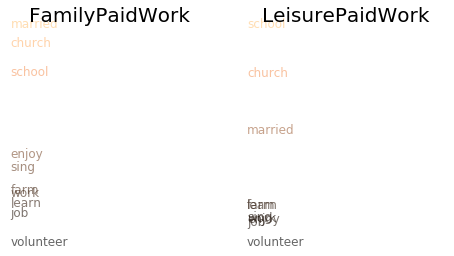

In [318]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'FamilyPaidWork')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'LeisurePaidWork')
#ax3 = fig.add_subplot(133)
#PlotDimension(ax3, OCCdf, 'SchoolPaidWork')
#ax3 = fig.add_subplot(133)
#PlotDimension(ax3, OCCdf, 'AgriculturePaidWork')
plt.show()

Now I will conduct the same analysis for the Ironworkers repository.

In [319]:
FamilyPaidWork = dimension(ohW2VIronworkers, ['brother','sister','uncle', 'father', 'mother', 'married', 'wife', 'husband', 'child'], ['money', 'dollar', 'pay', 'hour', 'contract', 'job', 'work', 'boss', 'mill', 'office'])
LeisurePaidWork = dimension(ohW2VIronworkers, ['free', 'beach', 'sun', 'weekend', 'sunday'], ['money', 'dollar', 'pay', 'hour', 'contract', 'job', 'work', 'boss', 'mill', 'office'])
SchoolPaidWork = dimension(ohW2VIronworkers, ['teacher', 'learn', 'study', 'book', 'teach', 'training'], ['money', 'dollar', 'pay', 'hour', 'contract', 'job', 'work', 'boss', 'mill', 'office'])
AgriculturePaidWork = dimension(ohW2VIronworkers, ['field', 'horse', 'farm'], ['money', 'dollar', 'pay', 'hour', 'contract', 'job', 'work', 'boss', 'mill', 'office'])
Activity = ["work", "job", "volunteer", "farm", "enjoy", "school", "learn", "sing", "church"]

In [320]:
def makeDF(model, word_list):
    f = []
    l = []
    s = []
    a = []
    for word in word_list:
        f.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VIronworkers[word].reshape(1,-1), FamilyPaidWork.reshape(1,-1))[0][0])
        l.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VIronworkers[word].reshape(1,-1), LeisurePaidWork.reshape(1,-1))[0][0])
        s.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VIronworkers[word].reshape(1,-1), SchoolPaidWork.reshape(1,-1))[0][0])
        a.append(sklearn.metrics.pairwise.cosine_similarity(ohW2VIronworkers[word].reshape(1,-1), AgriculturePaidWork.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'FamilyPaidWork': f, 'LeisurePaidWork': l, 'SchoolPaidWork':s, 'AgriculturePaidWork':a}, index = word_list)
    return df


In [321]:
OCCdf = makeDF(ohW2VIronworkers, Activity) 


In [322]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.copper(z))
    return c


In [323]:
def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())


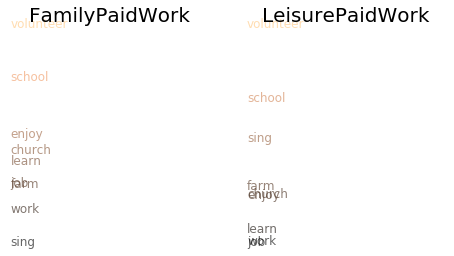

In [324]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'FamilyPaidWork')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'LeisurePaidWork')
#ax3 = fig.add_subplot(133)
#PlotDimension(ax3, OCCdf, 'SchoolPaidWork')
#ax4 = fig.add_subplot(134)
#PlotDimension(ax4, OCCdf, 'AgriculturePaidWork')
plt.show()


I measure linguistic change next.

In [141]:
import copy

In [142]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
        # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [143]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [144]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

This model gets thrown into disarray by NaN values for date of birth, so I get rid of the interviews for which date of birth is missing.

In [172]:
OralHistoriesNoNaN = OralHistories[OralHistories['datebirth'].notna()]

In [174]:
OralHistoriesNoNaNNoT = OralHistoriesNoNaN[OralHistoriesNoNaN.repository != 'TeaneckTownship']

In [175]:
OralHistoriesNoNaNNoT

Unnamed: 0                country  datebirth dateinterview  \
0             0                    NaN     1957.0          2016   
1             1                    NaN     1946.0          2016   
2             2                    NaN     1948.0          2016   
3             3                    NaN     1944.0          2016   
4             4                    NaN     1936.0          2016   
5             5                    NaN     1932.0          2016   
6             6                    NaN     1931.0          2016   
8             8                    NaN     1948.0          2016   
9             9                    NaN     1930.0          2016   
10           10                    NaN     1941.0          2016   
11           11                    NaN     1937.0          2016   
12           12                    NaN     1938.0          2016   
13           13                    NaN     1936.0          2015   
14           14                    NaN     1945.0          2016   
15           15                    NaN     1938.0          2015   
16           16                    NaN     1942.0          2016   
17           17                    NaN     1929.0          2016   
19           19                    NaN     1942.0          2015   
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
27           27                CROATIA     1915.0          1999   
28           28         CZECHOSLOVAKIA     1928.0          1991   
29           29         CZECHOSLOVAKIA     1912.0          1994   
30           30                ENGLAND     1893.0          1986   
31           31                ENGLAND     1901.0          1992   
..          ...                    ...        ...           ...   
388         388                    NaN     1952.0          2012   
389         389                    NaN     1961.0          2012   
390         390                    NaN     1968.0          2012   
391         391                    NaN     1958.0          2012   
393         393                    NaN     1943.0          xxxx   
394         394                    NaN     1948.0          2011   
395         395                    NaN     1938.0          2012   
396         396                    NaN     1930.0          2011   
397         397                    NaN     1923.0          2011   
400         400                    NaN     1934.0          xxxx   
401         401                    NaN     1942.0          2011   
402         402                    NaN     1927.0          2011   
403         403                    NaN     1960.0          xxxx   
405         405                    NaN     1955.0          2015   
406         406                    NaN     1943.0          2014   
410         410                    NaN     1959.0          2014   
411         411                    NaN     1949.0          2015   
412         412                    NaN     1952.0          2014   
414         414                    NaN     1957.0          2015   
415         415                    NaN     1946.0          2015   
418         418                    NaN     1961.0          2015   
420         420                    NaN     1977.0          2015   
422         422                    NaN     1966.0          2014   
423         423                    NaN     1961.0          2015   
426         426                    NaN     1968.0          2015   
428         428                    NaN     1954.0          2014   
429         429                    NaN     1949.0          2015   
431         431                    NaN     1963.0   

In [176]:
rawEmbeddings, comparedEmbeddings = compareModels(OralHistoriesNoNaNNoT, 'Generation')

In [177]:
rawEmbeddings.keys()

dict_keys([1, 2, 3])

In [153]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

work


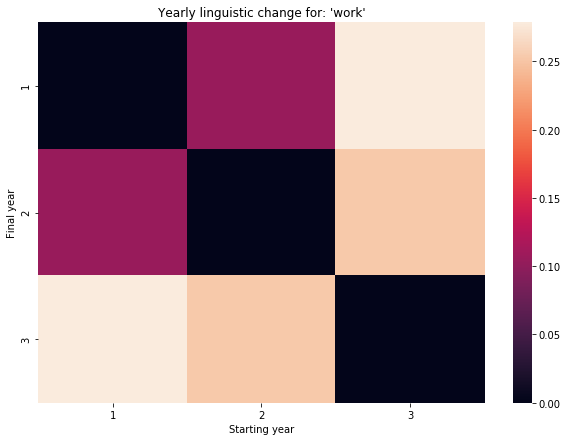

In [178]:
targetWord = 'work'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

job


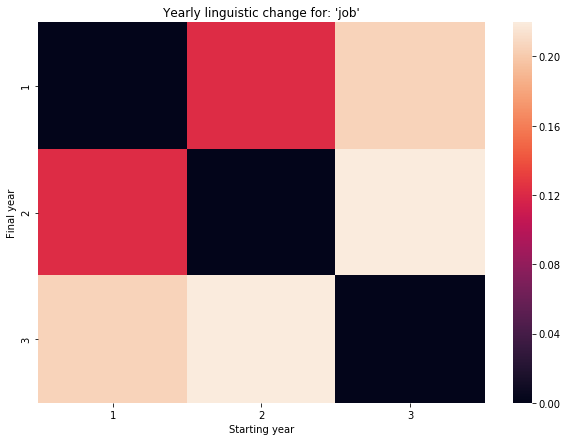

In [179]:
targetWord = 'job'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

smell


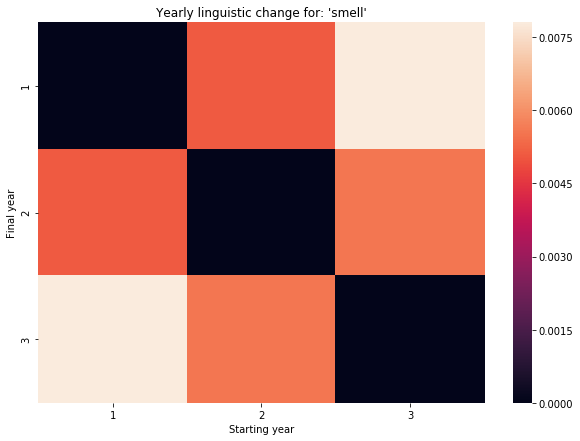

In [186]:
targetWord = 'smell'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

What are the most and least divergent words across generations?

In [161]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))
    
    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0][word], axis = 0), np.expand_dims(embed[word], axis = 0))[0,0])
    return sum(dists)

def findMostDivergent(embeddingsDict):
    words = []
    for embeds in embeddingsDict.values():
        for embed in embeds:
            words += list(embed.wv.vocab.keys())
    words = set(words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [181]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 3150 words to compare


In [182]:
wordDivergences[:20]

[('jm', 1.9864876344799995),
 ('s.', 0.9865956529974937),
 ('mr', 0.9476467370986938),
 ('island', 0.9145955443382263),
 ('san', 0.860323041677475),
 ('point', 0.7766353487968445),
 ('hawaii', 0.7729043364524841),
 ('kent', 0.7678415477275848),
 ('room', 0.7665513753890991),
 ('bank', 0.7648845314979553),
 ('little', 0.7632408142089844),
 ('francisco', 0.7624470889568329),
 ('ms', 0.7585158348083496),
 ('math', 0.7481387853622437),
 ('ellis', 0.7392456531524658),
 ('diego', 0.7219798266887665),
 ('today', 0.7096719145774841),
 ('united', 0.708372175693512),
 ('intersection', 0.6971403360366821),
 ('mrs', 0.6967313289642334)]

In [183]:
wordDivergences[-20:]

[('enormous', 0.014811515808105469),
 ('source', 0.014808058738708496),
 ('display', 0.014784455299377441),
 ('stack', 0.01445537805557251),
 ('observe', 0.014408111572265625),
 ('ring', 0.01414865255355835),
 ('driver', 0.014088153839111328),
 ('tend', 0.013598442077636719),
 ('thread', 0.013437867164611816),
 ('request', 0.013304650783538818),
 ('highly', 0.013303816318511963),
 ('basis', 0.013161540031433105),
 ('protection', 0.012985408306121826),
 ('smell', 0.012903273105621338),
 ('easily', 0.01289510726928711),
 ('eliminate', 0.01264655590057373),
 ('whatsoever', 0.012045562267303467),
 ('split', 0.009762883186340332),
 ('physically', 0.00900113582611084),
 ('category', 0.008250057697296143)]

What did 'work' mean for those different age groups?

In [55]:
is_1 =  OralHistories['Generation']==1

In [56]:
print(is_1.head())

0    False
1    False
2    False
3    False
4    False
Name: Generation, dtype: bool


In [57]:
OralHistoriesGen1 = OralHistories[is_1]

In [58]:
OralHistoriesGen1

Unnamed: 0                country  datebirth dateinterview  \
20           20                ALBANIA     1899.0          1991   
21           21        AUSTRIA-HUNGARY     1898.0          1991   
22           22                AUSTRIA     1901.0          1992   
23           23                AUSTRIA     1896.0          1991   
24           24                AUSTRIA     1905.0          1874   
25           25  BRAZIL (BORN UKRAINE)     1907.0          1975   
26           26                  CHINA     1910.0          2001   
30           30                ENGLAND     1893.0          1986   
31           31                ENGLAND     1901.0          1992   
34           34                ENGLAND     1899.0          1992   
35           35                FINLAND     1900.0          1986   
37           37                GERMANY     1900.0          1992   
38           38                GERMANY     1905.0          1995   
40           40                GERMANY     1904.0          1993   
42           42                GERMANY     1904.0          1994   
43           43                 GREECE     1899.0          1991   
44           44                 GREECE     1900.0          1993   
45           45                 GREECE     1904.0          1989   
46           46                 GREECE     1902.0          1992   
48           48                Hungary     1905.0          1985   
49           49                HUNGARY     1904.0          1993   
50           50                HUNGARY     1896.0          1993   
51           51                HUNGARY     1895.0          1993   
52           52                IRELAND     1902.0          1993   
53           53                  ITALY     1905.0          1991   
55           55                  ITALY     1904.0          1992   
56           56                  ITALY     1901.0          1992   
60           60                  ITALY     1900.0          1992   
61           61                  ITALY     1908.0          1995   
62           62                  ITALY     1901.0          1994   
..          ...                    ...        ...           ...   
446         446                    NaN     1894.0          1979   
447         447                    NaN     1908.0          1975   
448         448                    NaN     1905.0          1976   
452         452                    NaN     1910.0          1975   
453         453                    NaN     1885.0          1975   
455         455                    NaN     1905.0          1976   
456         456                    NaN     1899.0          1976   
457         457                    NaN     1870.0          1949   
458         458                    NaN     1899.0          1970   
459         459                    NaN     1900.0          1975   
463         463                    NaN     1891.0          1970   
464         464                    NaN     1906.0          1976   
465         465                    NaN     1889.0          1975   
466         466                    NaN     1896.0          1975   
467         467                    NaN     1900.0          1975   
468         468                    NaN     1910.0          1976   
469         469                    NaN     1908.0          1975   
475         475                    NaN     1910.0          1970   
477         477                    NaN     1907.0          1976   
478         478                    NaN     1892.0          1975   
479         479                    NaN     1892.0          1976   
480         480                    NaN     1900.0          1976   
481         481                    NaN     1882.0          1975   
482         482                    NaN     1903.0          1970   
484         484                    NaN     1896.0          1970   
485         485                    NaN     1885.0          1975   
486         486                    NaN     1896.0          1970   
491         491                    NaN     1908.0   

In [59]:
ohW2VGen1 = gensim.models.word2vec.Word2Vec(OralHistoriesGen1['normalized_sents'].sum())

In [60]:
ohW2VGen1.most_similar('work')

[('factory', 0.8612371683120728),
 ('business', 0.8361729383468628),
 ('job', 0.8117284774780273),
 ('hard', 0.8109636306762695),
 ('able', 0.7909634113311768),
 ('find', 0.7669215202331543),
 ('field', 0.7608186602592468),
 ('forth', 0.7602605819702148),
 ('farmer', 0.7588436007499695),
 ('course', 0.756804347038269)]

In [61]:
ohW2VGen1.doesnt_match(['factory', 'money', 'steelworkers', 'dollars', 'teacher'])

'teacher'

In [62]:
ohW2VGen1.most_similar(positive=['father', 'wife'], negative = ['husband'])

[('mother', 0.941646933555603),
 ('aunt', 0.8964489698410034),
 ('parent', 0.8873593807220459),
 ('grandfather', 0.8705244064331055),
 ('grandmother', 0.8674716949462891),
 ('law', 0.856977105140686),
 ('uncle', 0.8567420244216919),
 ('pregnant', 0.8511326313018799),
 ('child', 0.8439659476280212),
 ('baby', 0.8435752391815186)]

In [63]:
ohW2VGen1.save('ohW2VGen1')

Now for generation 2.

In [65]:
is_2 =  OralHistories['Generation']==2

In [66]:
OralHistoriesGen2 = OralHistories[is_2]

In [67]:
OralHistoriesGen2

Unnamed: 0         country  datebirth dateinterview  \
4             4             NaN     1936.0          2016   
5             5             NaN     1932.0          2016   
6             6             NaN     1931.0          2016   
9             9             NaN     1930.0          2016   
11           11             NaN     1937.0          2016   
12           12             NaN     1938.0          2016   
13           13             NaN     1936.0          2015   
15           15             NaN     1938.0          2015   
17           17             NaN     1929.0          2016   
27           27         CROATIA     1915.0          1999   
28           28  CZECHOSLOVAKIA     1928.0          1991   
29           29  CZECHOSLOVAKIA     1912.0          1994   
32           32         ENGLAND     1915.0          1993   
33           33         ENGLAND     1914.0          1994   
36           36         GERMANY     1919.0          1994   
39           39         GERMANY     1928.0          1991   
41           41         GERMANY     1921.0          1991   
47           47         HUNGARY     1912.0          1994   
54           54           ITALY     1927.0          1997   
57           57           ITALY     1917.0          1995   
59           59           ITALY     1912.0          1999   
63           63           ITALY     1915.0          1994   
64           64           ITALY     1914.0          1992   
65           65           ITALY     1911.0          1992   
68           68           ITALY     1921.0          1997   
69           69           ITALY     1913.0          1995   
71           71           ITALY     1920.0          1992   
76           76     NETHERLANDS     1912.0          1993   
83           83          POLAND     1914.0          1992   
85           85          POLAND     1911.0          1994   
..          ...             ...        ...           ...   
350         350             NaN     1914.0          2000   
354         354             NaN     1935.0          2000   
355         355             NaN     1926.0          2000   
357         357             NaN     1939.0          2000   
360         360             NaN     1934.0          2011   
361         361             NaN     1913.0          2012   
373         373             NaN     1929.0          xxxx   
374         374             NaN     1933.0          xxxx   
378         378             NaN     1936.0          2011   
384         384             NaN     1938.0          2010   
385         385             NaN     1936.0          xxxx   
395         395             NaN     1938.0          2012   
396         396             NaN     1930.0          2011   
397         397             NaN     1923.0          2011   
400         400             NaN     1934.0          xxxx   
402         402             NaN     1927.0          2011   
438         438             NaN     1916.0          1975   
443         443             NaN     1912.0          1976   
444         444             NaN     1927.0          1975   
449         449             NaN     1915.0          1976   
460         460             NaN     1912.0          1975   
461         461             NaN     1920.0          1976   
462         462             NaN     1914.0          1975   
471         471             NaN     1916.0          1975   
472         472             NaN     1911.0          1976   
473         473             NaN     1915.0          1976   
474         474             NaN     1923.0          1970   
483         483             NaN     1912.0          1975   
487         487             NaN     1920.0          1970   
488         488             NaN     1919.0          1970   

                                         interviewee       repository  \
4                                    Ronald Navickas    DetroitWorker   
5                                       Marvin Myers    DetroitWorker   
6                                       Kenneth Volk    DetroitWo

In [68]:
ohW2VGen2 = gensim.models.word2vec.Word2Vec(OralHistoriesGen2['normalized_sents'].sum())

In [69]:
ohW2VGen2.most_similar('work')

[('towboat', 0.8597923517227173),
 ('job', 0.8577694892883301),
 ('pay', 0.8557205200195312),
 ('early', 0.8470936417579651),
 ('take', 0.8445231914520264),
 ('get', 0.8423122763633728),
 ('hour', 0.8406010866165161),
 ('spend', 0.8405560255050659),
 ('finally', 0.8386813998222351),
 ('$', 0.8342918157577515)]

In [70]:
ohW2VGen2.doesnt_match(['factory', 'money', 'steelworkers', 'dollars', 'teacher'])

'teacher'

In [71]:
ohW2VGen2.most_similar(positive=['father', 'wife'], negative = ['husband'])

[('mother', 0.9439848065376282),
 ('grandmother', 0.9195340871810913),
 ('grandfather', 0.890015721321106),
 ('uncle', 0.8789827823638916),
 ('aunt', 0.8753730654716492),
 ('brother', 0.871770977973938),
 ('dad', 0.8658154010772705),
 ('parent', 0.8615565299987793),
 ('cousin', 0.8597328662872314),
 ('raise', 0.8561749458312988)]

In [72]:
ohW2VGen2.save('ohW2VGen2')

Finally, for generation 3.

In [73]:
is_3 =  OralHistories['Generation']==3

In [74]:
OralHistoriesGen3 = OralHistories[is_3]

In [75]:
ohW2VGen3 = gensim.models.word2vec.Word2Vec(OralHistoriesGen3['normalized_sents'].sum())

In [76]:
ohW2VGen3.most_similar('work')

[('time', 0.9879254102706909),
 ('long', 0.98443603515625),
 ('spend', 0.9824271202087402),
 ('probably', 0.9796950817108154),
 ('stay', 0.9770579934120178),
 ('job', 0.9756909608840942),
 ('half', 0.9752691388130188),
 ('couple', 0.9742646813392639),
 ('leave', 0.9738028049468994),
 ('week', 0.971339225769043)]

In [77]:
ohW2VGen3.doesnt_match(['factory', 'money', 'steelworkers', 'dollars', 'teacher'])

'money'

In [78]:
ohW2VGen3.most_similar(positive=['father', 'wife'], negative = ['husband'])

[('mother', 0.9962800741195679),
 ('marry', 0.9936798214912415),
 ('away', 0.9934288263320923),
 ('saturday', 0.9925991296768188),
 ('leave', 0.9917090535163879),
 ('month', 0.9913347959518433),
 ('child', 0.9912158846855164),
 ('later', 0.9908332824707031),
 ('nursing', 0.9907805919647217),
 ('married', 0.9906178712844849)]

In [79]:
ohW2VGen3.save('ohW2VGen3')

I conduct a similar analysis not for the entire corpus but for specific repositories.

In [93]:
Ironworkers = pandas.read_pickle("Ironworkers.pkl")

In [82]:
Ironworkers

repository                                        interviewee  datebirth  \
0   Ironworkers                               Henry "Hank" Lichte        1935   
1   Ironworkers                               Walter “Wally” Ritch       1944   
2   Ironworkers                                         David Olby       1949   
3   Ironworkers                        William C. “Bill” Tanneberg       1939   
4   Ironworkers                          Augustine “Gus” Peplinski       1938   
5   Ironworkers                           William W. (Bill) Kerwin       1941   
6   Ironworkers                                  Everett J. Erstad       1941   
7   Ironworkers                                  George L. Bunders       1939   
8   Ironworkers                                Edgar L. “Ed” Smith       1940   
9   Ironworkers                          Craig Satalic and Al Bass       1951   
10  Ironworkers                                Richard “Rich” Rowe       1952   
11  Ironworkers                          Sharon and Richard Sisson       1950   
12  Ironworkers                                    Ledwith, Robert       1941   
13  Ironworkers                                   Michael Richards       1978   
14  Ironworkers                                        Bill Satler       1950   
15  Ironworkers                             William “Bill” McGleam       1944   
16  Ironworkers                                          John Ryan       1941   
17  Ironworkers                                      Diskin, Brian       1953   
18  Ironworkers                                      James Stanley       1958   
19  Ironworkers                                       Roy Williams       1939   
20  Ironworkers  Bud Martens (Real Name: Henry Arnold Martens, ...       1940   
21  Ironworkers                         James Robert “Jimmy” Keane       1958   
22  Ironworkers                                   Michael M. Taqee       1960   
23  Ironworkers                               Gerald “Jerry” Truty       1942   

    dateinterview                                               text  \
0            2011  00:01 Introduction, Background information, En...   
1            2011  00:01     [Tell me your name and where you wer...   
2            2011  0:01 Testing equipment. Announcement, initial ...   
3            2011  0:05 Announcement, initial question–when and w...   
4            2011  0:05 [As the recorder comes on Gus starts show...   
5            2011  0:02 trade? 0:31 Graduated from there. I went ...   
6            2011  Topic  Announcement, initial question–when and...   
7            2011  0:04 trade? 0:32 and I’ve been here ever since...   
8            2011  0:03 Announcement, initial question–when and w...   
9            2011  CounterNo./Time Topic00:01-[This is Bucky Halk...   
10           2011  Counter No./Time Topic Audio Interview Content...   
11           2011  [Sharon, why don’t you give me your full name....   
12           2011  Audio Interview Contents Counter No./Time Topi...   
13           2011   Counter No./Time Topic 00:01 [Well, first of ...   
14           2011  Counter No./Time Topic 00:01     [This is Buck...   
15           2011  Counter No./Time Topic 00:01 Bucky introductio...   
16           2011   [I’m sitting here with John Ryan. John, where...   
17           2011  My name is Brian Diskin. I was born in 1953. 6...   
18           2011  [I’m interviewing James Stanley. James, tell m...   
19           2011  Audio Interview Contents Counter No./Time Topi...   
20           2011  Counter No./Time Topic    00:00-00:11 Bucky: i...   
21           2011  Counter No./Time 00:01 BH: Just ah, tell me yo...   
22           2011  Counter No./Time Topic 00:01 BH: Tell me your ...   
23           2011  Counter No./Time Topic 00:01 Audio Interview C...   

                                      tokenized_sents  \
0   [[00:01, Introduction, Background, information...   
1   [[00:01], [Tell, me, your, name, and, where, y...   
2   [[0

In [83]:
ohW2VIronworkers = gensim.models.word2vec.Word2Vec(Ironworkers['normalized_sents'].sum())

In [86]:
ohW2VIronworkers.most_similar('work')

[('probably', 0.9998626708984375),
 ('ve', 0.99984210729599),
 ('build', 0.9998397827148438),
 ('fire', 0.9998326301574707),
 ('remember', 0.9998321533203125),
 ('call', 0.9998321533203125),
 ('need', 0.9998317956924438),
 ('safety', 0.9998315572738647),
 ('far', 0.9998307228088379),
 ('come', 0.9998271465301514)]

In [138]:
ohW2VIronworkers.most_similar('volunteer')

[('main', 0.9985169172286987),
 ('look', 0.9985135793685913),
 ('say', 0.9984992146492004),
 ('case', 0.9984908103942871),
 ('pension', 0.9984504580497742),
 ('right', 0.998443603515625),
 ('way', 0.9984413385391235),
 ('take', 0.9984278678894043),
 ('happen', 0.9984250664710999),
 ('sure', 0.9984249472618103)]

In [87]:
ohW2VIronworkers.most_similar('job')

[('foreman', 0.999867856502533),
 ('run', 0.9998565316200256),
 ('know', 0.9998467564582825),
 ('need', 0.999842643737793),
 ('call', 0.9998413920402527),
 ('take', 0.9998411536216736),
 ('time', 0.9998363256454468),
 ('plant', 0.9998358488082886),
 ('point', 0.9998353123664856),
 ('stay', 0.9998351335525513)]

In [90]:
ohW2VIronworkers.most_similar('mother')

[('call', 0.9997637867927551),
 ('probably', 0.9997516870498657),
 ('try', 0.999717116355896),
 ('meet', 0.9997135400772095),
 ('money', 0.9997127652168274),
 ('come', 0.9997114539146423),
 ('run', 0.9997096061706543),
 ('move', 0.9997087121009827),
 ('everybody', 0.9997082948684692),
 ('think', 0.9997072815895081)]

Now for Marin County 

In [95]:
MarinCounty = pandas.read_pickle("MarinCountyAllBig.pkl")

In [96]:
ohW2VMarin = gensim.models.word2vec.Word2Vec(MarinCounty['normalized_sents'].sum())


In [136]:
ohW2VMarin.most_similar('work')

[('volunteer', 0.8484370708465576),
 ('start', 0.8398050665855408),
 ('group', 0.8261057138442993),
 ('business', 0.8190761208534241),
 ('have', 0.8154751062393188),
 ('job', 0.81473308801651),
 ('involve', 0.8054165840148926),
 ('begin', 0.7940930128097534),
 ('change', 0.7894522547721863),
 ('study', 0.7873830795288086)]

In [137]:
ohW2VMarin.most_similar('job')

[('change', 0.9088711738586426),
 ('fun', 0.9017412066459656),
 ('bad', 0.8998746275901794),
 ('well', 0.8978162407875061),
 ('difficult', 0.897793173789978),
 ('have', 0.8965839743614197),
 ('pretty', 0.8957593441009521),
 ('care', 0.8943681716918945),
 ('trouble', 0.8939085006713867),
 ('realize', 0.893887996673584)]

Now for DetroitWorker.

In [100]:
DetroitWorker['tokenized_sents'] = DetroitWorker['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])


In [101]:
DetroitWorker['normalized_sents'] = DetroitWorker['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [102]:
DetroitWorker.to_pickle('DetroitWorkerBig.pkl')

In [103]:
ohW2VDetroitWorker = gensim.models.word2vec.Word2Vec(DetroitWorker['normalized_sents'].sum())


In [104]:
ohW2VDetroitWorker.most_similar('work')


[('house', 0.9999070167541504),
 ('open', 0.9998829364776611),
 ('downtown', 0.9998788833618164),
 ('come', 0.9998788237571716),
 ('get', 0.9998773336410522),
 ('people', 0.9998758435249329),
 ('thing', 0.9998738765716553),
 ('go', 0.999873697757721),
 ('building', 0.9998711347579956),
 ('move', 0.9998703002929688)]

In [105]:
ohW2VDetroitWorker.most_similar('job')


[('take', 0.9998040199279785),
 ('go', 0.9997978806495667),
 ('building', 0.999796986579895),
 ('work', 0.9997913241386414),
 ('get', 0.9997893571853638),
 ('lot', 0.9997888207435608),
 ('see', 0.9997884035110474),
 ('move', 0.9997876286506653),
 ('start', 0.9997860789299011),
 ('people', 0.999782383441925)]

Now for Immigrants.

In [106]:
Immigrants['tokenized_sents'] = Immigrants['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])


In [107]:
Immigrants['normalized_sents'] = Immigrants['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [108]:
Immigrants.to_pickle('Immigrants.pkl')


In [109]:
ohW2VImmigrants = gensim.models.word2vec.Word2Vec(Immigrants['normalized_sents'].sum())


In [110]:
ohW2VImmigrants.most_similar('work')


[('factory', 0.9434820413589478),
 ('shop', 0.894629955291748),
 ('job', 0.89113450050354),
 ('hard', 0.8783563375473022),
 ('find', 0.8767417073249817),
 ('farm', 0.8532277345657349),
 ('business', 0.8493723273277283),
 ('rent', 0.8458442091941833),
 ('quarrys', 0.843497633934021),
 ('course', 0.8396015167236328)]

Now for MadisonCounty.

In [111]:
MadisonCounty['tokenized_sents'] = MadisonCounty['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])


In [112]:
MadisonCounty['normalized_sents'] = MadisonCounty['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])


In [113]:
MadisonCounty.to_pickle('MadisonCounty.pkl')

In [114]:
ohW2VMadisonCounty = gensim.models.word2vec.Word2Vec(MadisonCounty['normalized_sents'].sum())


In [115]:
ohW2VMadisonCounty.most_similar('work')


[('time', 0.9961803555488586),
 ('place', 0.99481600522995),
 ('leave', 0.9934357404708862),
 ('away', 0.9931003451347351),
 ('month', 0.993079423904419),
 ('business', 0.9926333427429199),
 ('band', 0.9919345378875732),
 ('stay', 0.9918726086616516),
 ('music', 0.9909846186637878),
 ('right', 0.9908996820449829)]

Now for MonmouthCounty

In [116]:
MonmouthCounty['tokenized_sents'] = MonmouthCounty['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [117]:
MonmouthCounty['normalized_sents'] = MonmouthCounty['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [118]:
MonmouthCounty.to_pickle('MonmouthCounty.pkl')


In [119]:
ohW2VMonmouthCounty = gensim.models.word2vec.Word2Vec(MonmouthCounty['normalized_sents'].sum())


In [120]:
ohW2VMonmouthCounty.most_similar('work')


[('job', 0.9601489305496216),
 ('later', 0.9491680860519409),
 ('decide', 0.9376590251922607),
 ('retire', 0.9367766380310059),
 ('spend', 0.9348521828651428),
 ('month', 0.9321246147155762),
 ('course', 0.9294089078903198),
 ('newly', 0.9187785387039185),
 ('husband', 0.9180551767349243),
 ('hour', 0.9174008369445801)]

Now for PortHouston

In [121]:
PortHouston['tokenized_sents'] = PortHouston['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [122]:
PortHouston['normalized_sents'] = PortHouston['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [123]:
PortHouston.to_pickle('PortHouston.pkl')

In [124]:
ohW2VPortHouston = gensim.models.word2vec.Word2Vec(PortHouston['normalized_sents'].sum())

In [125]:
ohW2VPortHouston.most_similar('work')

[('ship', 0.9999198913574219),
 ('year', 0.9999023079872131),
 ('system', 0.999900221824646),
 ('new', 0.9998983144760132),
 ('industry', 0.9998963475227356),
 ('pilot', 0.9998960494995117),
 ('job', 0.9998944401741028),
 ('build', 0.9998935461044312),
 ('come', 0.9998935461044312),
 ('run', 0.9998928308486938)]

Now for TakingCare

In [126]:
TakingCare['tokenized_sents'] = TakingCare['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [127]:
TakingCare['normalized_sents'] = TakingCare['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [128]:
TakingCare.to_pickle('TakingCare.pkl')

In [129]:
ohW2VTakingCare = gensim.models.word2vec.Word2Vec(TakingCare['normalized_sents'].sum())

In [130]:
ohW2VTakingCare.most_similar('work')

[('client', 0.9997931718826294),
 ('help', 0.9996951818466187),
 ('care', 0.9996942281723022),
 ('worker', 0.9996741414070129),
 ('need', 0.9996737241744995),
 ('service', 0.9996700286865234),
 ('people', 0.9996673464775085),
 ('home', 0.9996657967567444),
 ('job', 0.999665379524231),
 ('house', 0.9996552467346191)]

Now for TeaneckTownship

In [131]:
TeaneckTownship['tokenized_sents'] = TeaneckTownship['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])

In [132]:
TeaneckTownship['normalized_sents'] = TeaneckTownship['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s) for s in x])

In [133]:
TeaneckTownship.to_pickle('TeaneckTownship.pkl')

In [134]:
ohW2VTeaneckTownship = gensim.models.word2vec.Word2Vec(TeaneckTownship['normalized_sents'].sum())

In [135]:
ohW2VTeaneckTownship.most_similar('work')

[('house', 0.9998466372489929),
 ('teaneck', 0.9998190999031067),
 ('mrs', 0.9998171925544739),
 ('remember', 0.9998158812522888),
 ('boy', 0.9998146295547485),
 ('school', 0.9998059272766113),
 ('get', 0.999803900718689),
 ('build', 0.9998000860214233),
 ('come', 0.9997997879981995),
 ('year', 0.9997951984405518)]